Pour avoir le sommaire: executer les deux premieres lignes

In [53]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Sommaire</h1>
<div id="toc"></div>

In [3]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [4]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.options.display.max_seq_items = 2000

# Traitement de application_train.csv

In [5]:
# Training data
app_train = pd.read_csv('D:/openclassrooms/PROJET 7/DATA/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

## Etude de la cible

La variable cible est "TARGET" valeur zero pour crédit remboursé et 1 pour crédit non remboursé  

1 - client ayant des difficultés de paiement: il / elle a eu un retard de paiement de plus de X jours sur au moins une des Y premières tranches du prêt de notre échantillon  
0 - tous les autres cas  

**la valeur 1 correspond à 8.78 % des clients**

In [116]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:title={'center':'Distribution TARGET'}, xlabel='TARGET'>

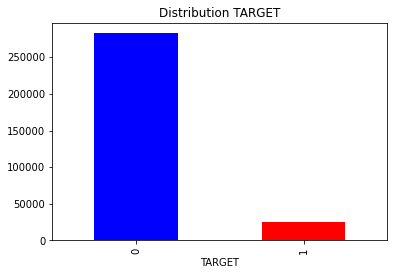

In [141]:
app_train.groupby('TARGET').size().plot(kind='bar',color = ['b','r'],stacked=True,title="Distribution TARGET")

0: will repay on time
1: will have difficulty repaying loan


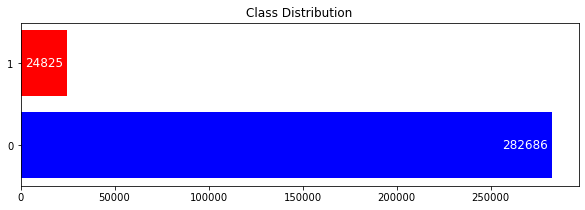

In [8]:
print("0: will repay on time")
print("1: will have difficulty repaying loan")

class_dist = app_train['TARGET'].value_counts()

plt.figure(figsize=(10,3))
plt.title('Class Distribution')
plt.barh(class_dist.index, class_dist.values,color = ['b','r'])
plt.yticks([0, 1])

for i, value in enumerate(class_dist.values):
    plt.text(value-2000, i, str(value), fontsize=12, color='white',
             horizontalalignment='right', verticalalignment='center')

plt.show()

## Etude de valeurs manquantes

In [22]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                       214865               69.9
COMMONAREA_AVG                        214865               69.9
COMMONAREA_MODE                       214865               69.9
NONLIVINGAPARTMENTS_MEDI              213514               69.4
NONLIVINGAPARTMENTS_MODE              213514               69.4
NONLIVINGAPARTMENTS_AVG               213514               69.4
FONDKAPREMONT_MODE                    210295               68.4
LIVINGAPARTMENTS_MODE                 210199               68.4
LIVINGAPARTMENTS_MEDI                 210199               68.4
LIVINGAPARTMENTS_AVG                  210199               68.4
FLOORSMIN_MODE                        208642               67.8
FLOORSMIN_MEDI                        208642               67.8
FLOORSMIN_AVG                         208642               67.8
YEARS_BUILD_MODE                      204488               66.5
YEARS_BUILD_MEDI                      204488               66.5
YEARS_BUILD_AVG                       204488               66.5
OWN_CAR_AGE                           202929               66.0
LANDAREA_AVG                          182590               59.4
LANDAREA_MEDI                         182590               59.4
LANDAREA_MODE                         182590               59.4
BASEMENTAREA_MEDI                     179943               58.5
BASEMENTAREA_AVG                      179943               58.5
BASEMENTAREA_MODE                     179943               58.5
EXT_SOURCE_1                          173378               56.4
NONLIVINGAREA_MEDI                    169682               55.2
NONLIVINGAREA_MODE                    169682               55.2
NONLIVINGAREA_AVG                     169682               55.2
ELEVATORS_MEDI                        163891               53.3
ELEVATORS_MODE                        163891               53.3
ELEVATORS_AVG                         163891               53.3
WALLSMATERIAL_MODE                    156341               50.8
APARTMENTS_MODE                       156061               50.7
APARTMENTS_MEDI                       156061               50.7
APARTMENTS_AVG                        156061               50.7
ENTRANCES_MODE                        154828               50.3
ENTRANCES_AVG                         154828               50.3
ENTRANCES_MEDI                        154828               50.3
LIVINGAREA_MEDI                       154350               50.2
LIVINGAREA_MODE                       154350               50.2
LIVINGAREA_AVG                        154350               50.2
HOUSETYPE_MODE                        154297               50.2
FLOORSMAX_MEDI                        153020               49.8
FLOORSMAX_AVG                         153020               49.8
FLOORSMAX_MODE                        153020               49.8
YEARS_BEGINEXPLUATATION_AVG           150007               48.8
YEARS_BEGINEXPLUATATION_MEDI          150007               48.8
YEARS_BEGINEXPLUATATION_MODE          150007               48.8
TOTALAREA_MODE                        148431               48.3
EMERGENCYSTATE_MODE                   145755               47.4
OCCUPATION_TYPE                        96391               31.3
EXT_SOURCE_3                           60965               19.8
AMT_REQ_CREDIT_BUREAU_WEEK             41519               13.5
AMT_REQ_CREDIT_BUREAU_DAY              41519               13.5
AMT_REQ_CREDIT_BUREAU_MON              41519               13.5
AMT_REQ_CREDIT_BUREAU_QRT              41519               13.5
AMT_REQ_CREDIT_BUREAU_HOUR             41519               13.5
AMT_REQ_CREDIT_BUREAU_YEAR             41519               13.5
NAME_TYPE_SUITE                         1292                0.4
DEF_30_CNT_SOCIAL_CIRCLE                1021                0.3
OBS_60_CNT_SOCIAL_CIRCLE                1021                0.3
DEF_60_CNT_SOCIAL_CIRCLE                1021                0.3
OBS_30_CNT_SOCIAL_CIRCLE                1021                0.

Etudes des valeurs nulles sur la population en défaut

In [34]:
df = app_train[app_train.TARGET == 1]

In [37]:
df.shape

(24825, 122)

In [36]:
missing_values = missing_values_table(df)
missing_values

Your selected dataframe has 122 columns.
There are 64 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_AVG                         18423               74.2
COMMONAREA_MODE                        18423               74.2
COMMONAREA_MEDI                        18423               74.2
NONLIVINGAPARTMENTS_MODE               18327               73.8
NONLIVINGAPARTMENTS_AVG                18327               73.8
NONLIVINGAPARTMENTS_MEDI               18327               73.8
FONDKAPREMONT_MODE                     18125               73.0
LIVINGAPARTMENTS_MODE                  18122               73.0
LIVINGAPARTMENTS_MEDI                  18122               73.0
LIVINGAPARTMENTS_AVG                   18122               73.0
FLOORSMIN_MEDI                         18008               72.5
FLOORSMIN_AVG                          18008               72.5
FLOORSMIN_MODE                         18008               72.5
YEARS_BUILD_AVG                        17751               71.5
YEARS_BUILD_MEDI                       17751               71.5
YEARS_BUILD_MODE                       17751               71.5
OWN_CAR_AGE                            17249               69.5
LANDAREA_MEDI                          16104               64.9
LANDAREA_MODE                          16104               64.9
LANDAREA_AVG                           16104               64.9
BASEMENTAREA_MEDI                      16038               64.6
BASEMENTAREA_MODE                      16038               64.6
BASEMENTAREA_AVG                       16038               64.6
NONLIVINGAREA_MEDI                     15330               61.8
NONLIVINGAREA_AVG                      15330               61.8
NONLIVINGAREA_MODE                     15330               61.8
ELEVATORS_MEDI                         14915               60.1
ELEVATORS_MODE                         14915               60.1
ELEVATORS_AVG                          14915               60.1
EXT_SOURCE_1                           14771               59.5
APARTMENTS_MEDI                        14285               57.5
APARTMENTS_AVG                         14285               57.5
APARTMENTS_MODE                        14285               57.5
WALLSMATERIAL_MODE                     14271               57.5
ENTRANCES_MEDI                         14211               57.2
ENTRANCES_MODE                         14211               57.2
ENTRANCES_AVG                          14211               57.2
HOUSETYPE_MODE                         14120               56.9
LIVINGAREA_MEDI                        14111               56.8
LIVINGAREA_AVG                         14111               56.8
LIVINGAREA_MODE                        14111               56.8
FLOORSMAX_MEDI                         14064               56.7
FLOORSMAX_MODE                         14064               56.7
FLOORSMAX_AVG                          14064               56.7
YEARS_BEGINEXPLUATATION_MEDI           13808               55.6
YEARS_BEGINEXPLUATATION_MODE           13808               55.6
YEARS_BEGINEXPLUATATION_AVG            13808               55.6
TOTALAREA_MODE                         13706               55.2
EMERGENCYSTATE_MODE                    13498               54.4
OCCUPATION_TYPE                         6278               25.3
EXT_SOURCE_3                            5677               22.9
AMT_REQ_CREDIT_BUREAU_MON               4292               17.3
AMT_REQ_CREDIT_BUREAU_HOUR              4292               17.3
AMT_REQ_CREDIT_BUREAU_QRT               4292               17.3
AMT_REQ_CREDIT_BUREAU_WEEK              4292               17.3
AMT_REQ_CREDIT_BUREAU_DAY               4292               17.3
AMT_REQ_CREDIT_BUREAU_YEAR              4292               17.3
NAME_TYPE_SUITE                           70                0.3
EXT_SOURCE_2                              52                0.2
DEF_60_CNT_SOCIAL_CIRCLE                  36                0.1
OBS_60_CNT_SOCIAL_CIRCLE                  36                0.1
DEF_30_CNT_SOCIAL_CIRCLE                  36                0.

In [33]:
#print("Variables: ", app_train.columns)
print("Nombre de variables: ", app_train.shape[1])
print("Population : ", app_train.shape[0])
print("Doublons :", app_train.duplicated().sum())
print("Valeurs vides: ", app_train.isna().sum().sum() /
      app_train.shape[0]/app_train.shape[1], 'NaN')

Nombre de variables:  122
Population :  307511
Doublons : 0
Valeurs vides:  0.24395941907129431 NaN


In [30]:
print("Variables: ", app_train.columns)

Variables:  Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
 

## Etude des variables qualitatives

## Etude globale des variables qualitatives

In [39]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [40]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

## NAME_CONTRACT_TYPE

In [45]:
app_train.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

<AxesSubplot:ylabel='TARGET'>

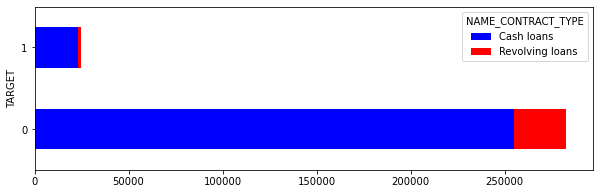

In [17]:
pd.crosstab(app_train['TARGET'], app_train['NAME_CONTRACT_TYPE'],).plot(
    kind="barh", stacked=True, figsize=(10, 3), color=['b', 'r'])

## CODE_GENDER

In [43]:
app_train.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

<AxesSubplot:ylabel='TARGET'>

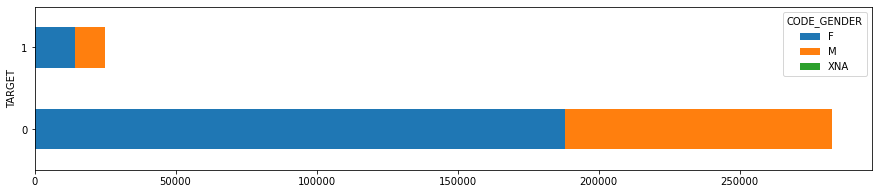

In [28]:
pd.crosstab(app_train['TARGET'], app_train['CODE_GENDER']).plot(
    kind="barh", stacked=True, figsize=(15, 3))

In [23]:
app_train.CODE_GENDER[app_train.TARGET == 1].value_counts()

F    14170
M    10655
Name: CODE_GENDER, dtype: int64

# FLAG_OWN_CAR (Possède une voiture)

In [44]:
app_train.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

<AxesSubplot:xlabel='TARGET'>

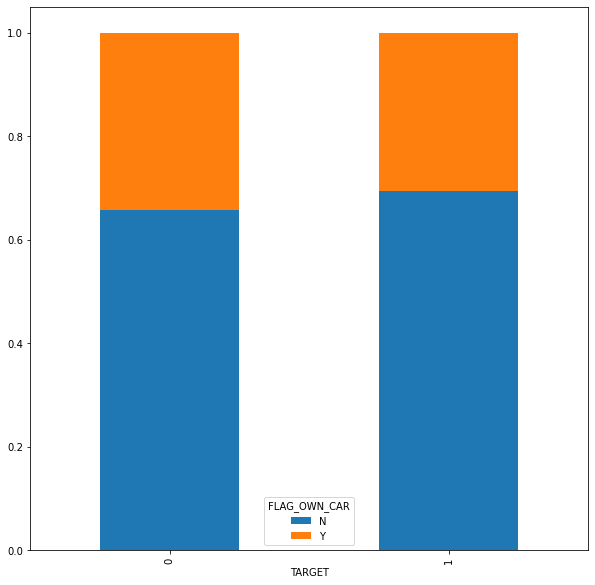

In [66]:
pd.crosstab(app_train['TARGET'],app_train['FLAG_OWN_CAR'],normalize='index').plot(kind="bar",stacked=True,figsize=(10,10))

## FLAG_OWN_REALTY (Possède une maison)

In [45]:
app_train.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

<AxesSubplot:xlabel='TARGET'>

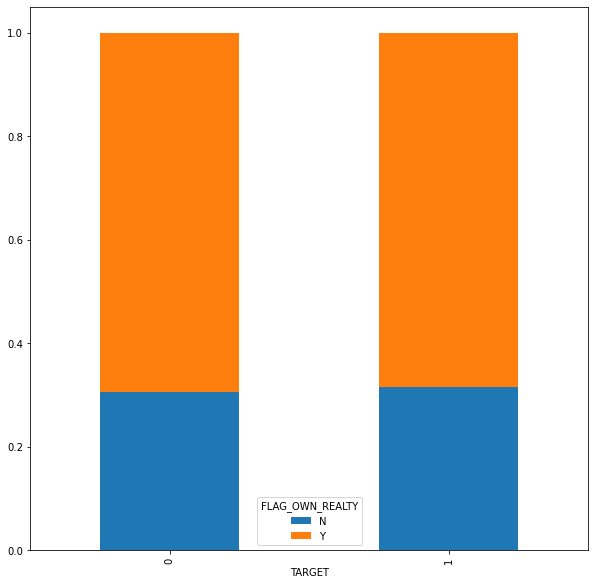

In [65]:
pd.crosstab(app_train['TARGET'],app_train['FLAG_OWN_REALTY'],normalize='index').plot(kind="bar",stacked=True,figsize=(10,10))

# NAME_TYPE_SUITE Accompagnant

In [46]:
app_train.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

<AxesSubplot:xlabel='TARGET'>

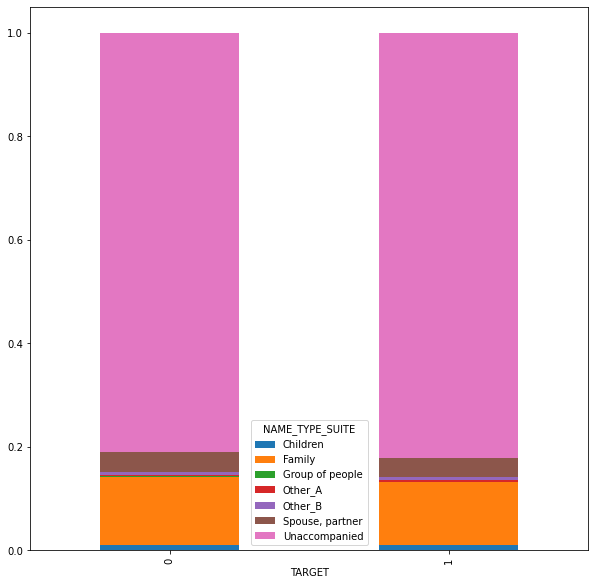

In [64]:
pd.crosstab(app_train['TARGET'],app_train['NAME_TYPE_SUITE'],normalize='index').plot(kind="bar",stacked=True,figsize=(10,10))

## NAME_INCOME_TYPE Origine des revenus

In [47]:
app_train.NAME_INCOME_TYPE.value_counts()


Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

<AxesSubplot:ylabel='TARGET'>

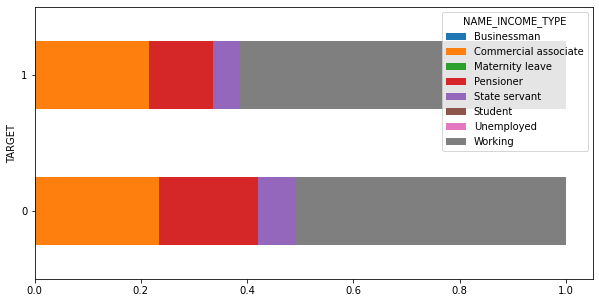

In [26]:
pd.crosstab(app_train['TARGET'],app_train['NAME_INCOME_TYPE'],normalize='index').plot(kind="barh",stacked=True,figsize=(10,5))

State Servant: Fonctionnaire

## NAME_EDUCATION_TYPE

In [48]:
app_train.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

<AxesSubplot:ylabel='TARGET'>

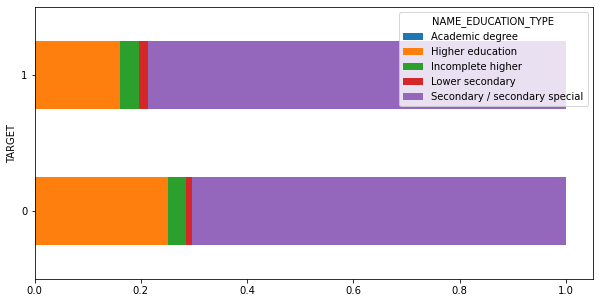

In [27]:
pd.crosstab(app_train['TARGET'],app_train['NAME_EDUCATION_TYPE'],normalize='index').plot(kind="barh",stacked=True,figsize=(10,5))

**Secondary/secondary special est important dans les populations ayant des defauts de paiements**

## NAME_FAMILY_STATUS

In [25]:
app_train.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

<AxesSubplot:xlabel='TARGET'>

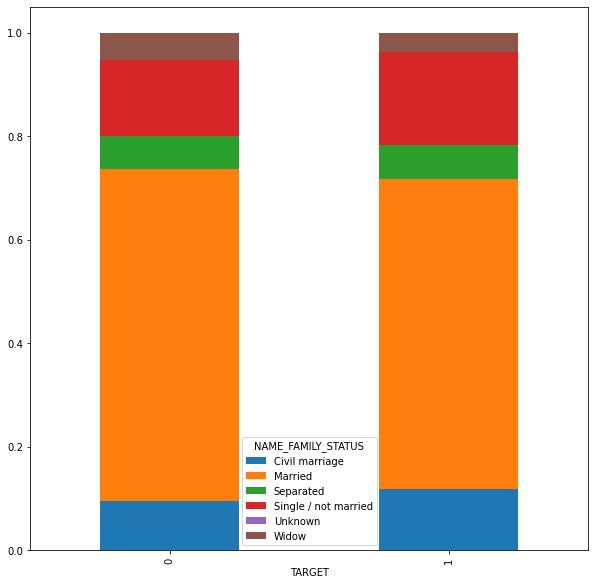

In [61]:
pd.crosstab(app_train['TARGET'],app_train['NAME_FAMILY_STATUS'],normalize='index').plot(kind="bar",stacked=True,figsize=(10,10))

## NAME_HOUSING_TYPE

In [50]:
app_train.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

<AxesSubplot:xlabel='TARGET'>

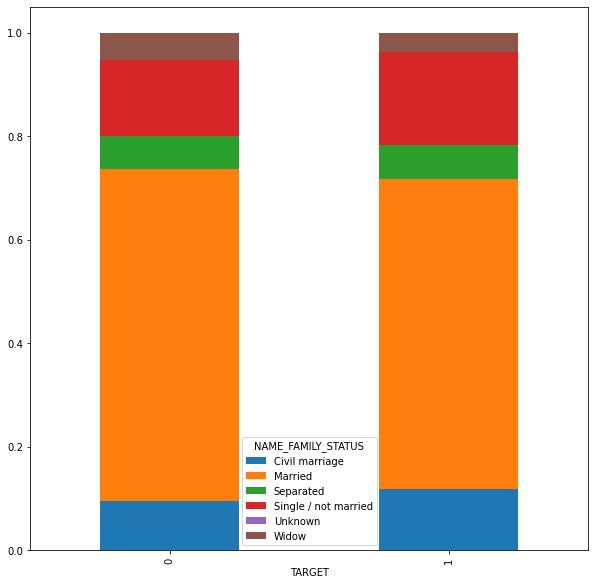

In [60]:
pd.crosstab(app_train['TARGET'],app_train['NAME_FAMILY_STATUS'],normalize='index').plot(kind="bar",stacked=True,figsize=(10,10))

## OCCUPATION_TYPE

In [51]:
app_train.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

<AxesSubplot:xlabel='TARGET'>

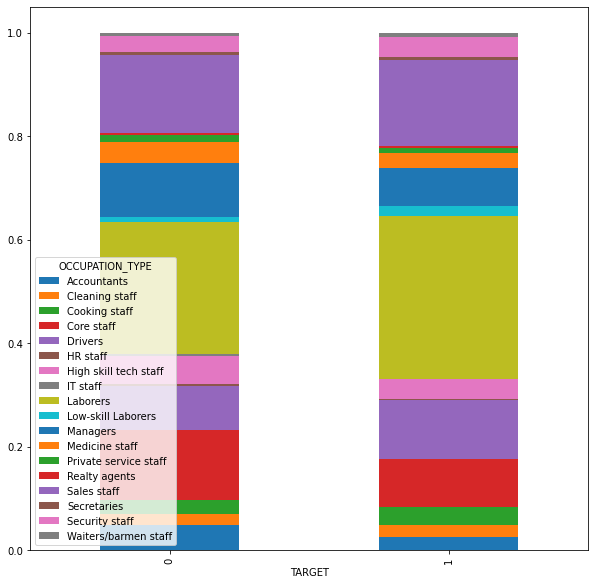

In [59]:
pd.crosstab(app_train['TARGET'],app_train['OCCUPATION_TYPE'],normalize='index').plot(kind="bar",stacked=True,figsize=(10,10))

<AxesSubplot:xlabel='OCCUPATION_TYPE'>

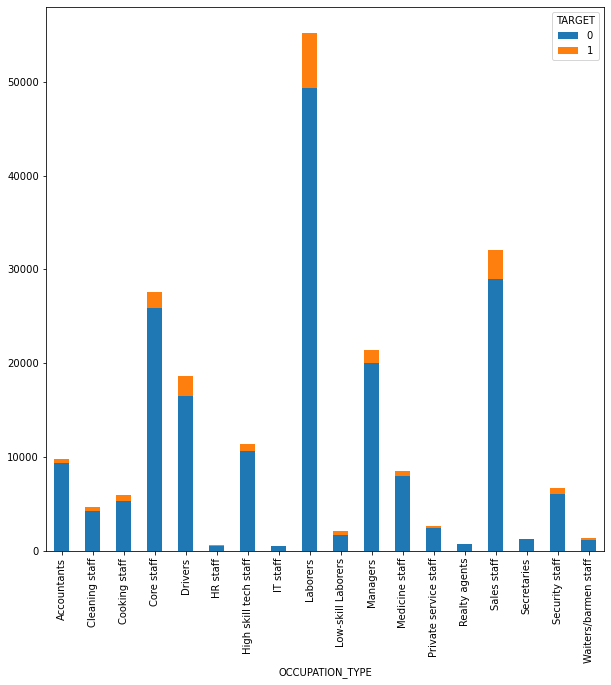

In [31]:
pd.crosstab(app_train['OCCUPATION_TYPE'],app_train['TARGET']).plot(kind="bar",stacked=True,figsize=(10,10))

## ORGANIZATION_TYPE

In [52]:
app_train.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

<AxesSubplot:xlabel='ORGANIZATION_TYPE'>

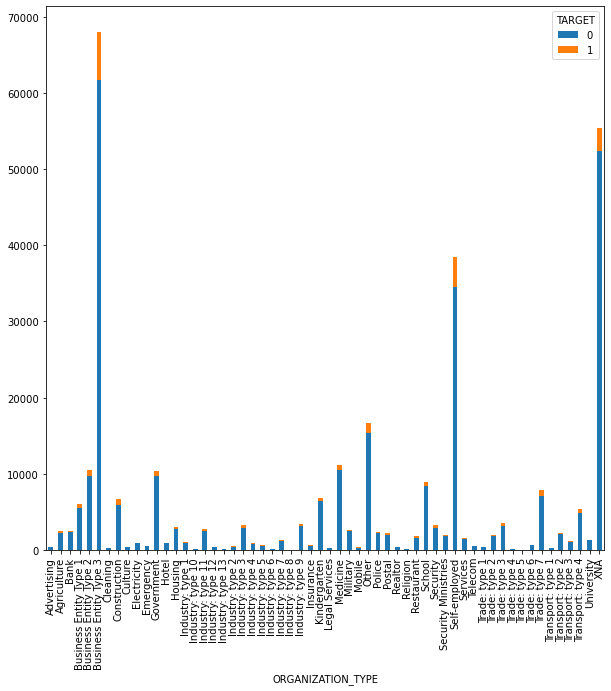

In [58]:
pd.crosstab(app_train['ORGANIZATION_TYPE'],app_train['TARGET']).plot(kind="bar",stacked=True,figsize=(10,10))

## FONDKAPREMONT_MODE

In [53]:
app_train.FONDKAPREMONT_MODE.value_counts()

reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: FONDKAPREMONT_MODE, dtype: int64

<AxesSubplot:xlabel='TARGET'>

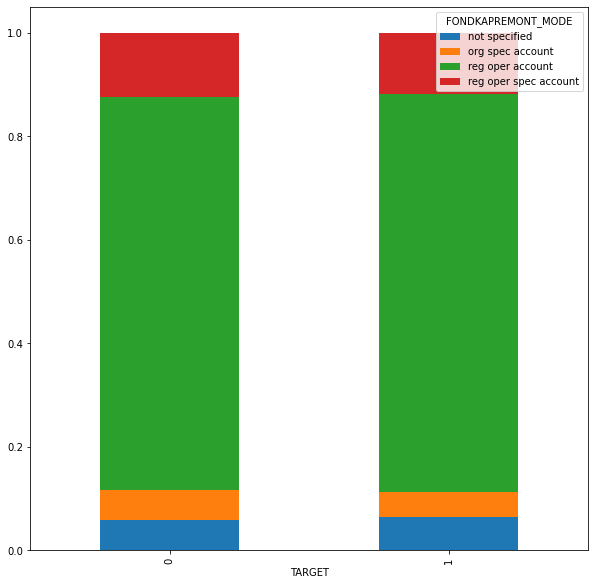

In [56]:
pd.crosstab(app_train['TARGET'],app_train['FONDKAPREMONT_MODE'],normalize='index').plot(kind="bar",stacked=True,figsize=(10,10))

## HOUSETYPE_MODE

In [54]:
app_train.HOUSETYPE_MODE.value_counts()

block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

<AxesSubplot:xlabel='TARGET'>

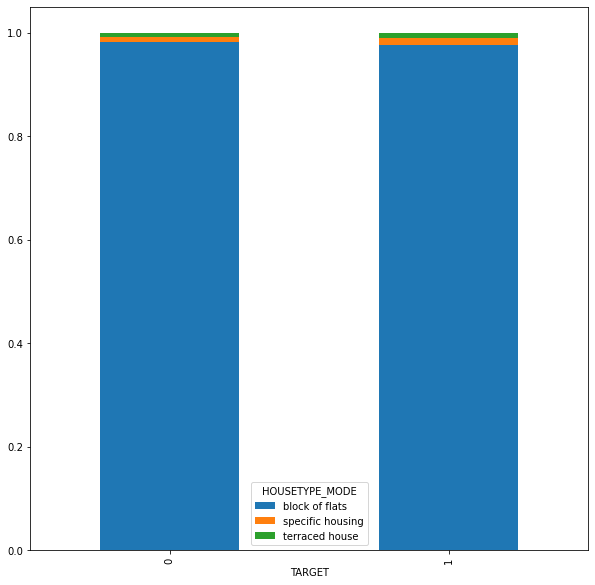

In [55]:
pd.crosstab(app_train['TARGET'],app_train['HOUSETYPE_MODE'],normalize='index').plot(kind="bar",stacked=True,figsize=(10,10))

## WALLSMATERIAL_MODE

In [56]:

app_train.WALLSMATERIAL_MODE.value_counts()

Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64

<AxesSubplot:xlabel='TARGET'>

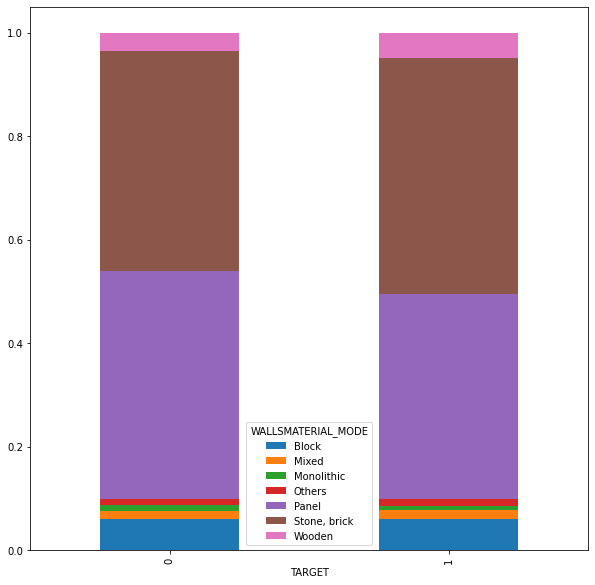

In [54]:
pd.crosstab(app_train['TARGET'],app_train['WALLSMATERIAL_MODE'],normalize='index').plot(kind="bar",stacked=True,figsize=(10,10))

## EMERGENCYSTATE_MODE

In [57]:
app_train.EMERGENCYSTATE_MODE.value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

<AxesSubplot:xlabel='TARGET'>

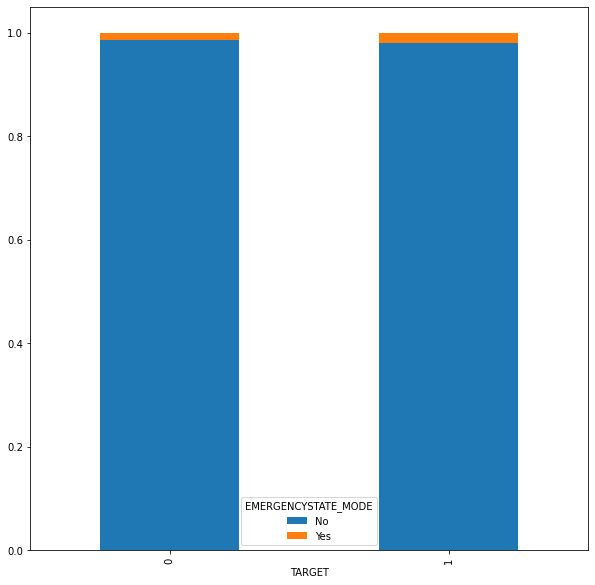

In [53]:
pd.crosstab(app_train['TARGET'],app_train['EMERGENCYSTATE_MODE'],normalize='index').plot(kind="bar",stacked=True,figsize=(10,10))

# Etude des variables EXT

## EXT_SOURCE_1

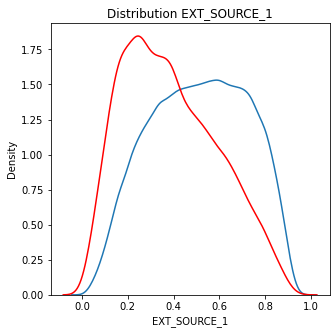

In [30]:
plt.figure(figsize = (5, 5))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'EXT_SOURCE_1'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'EXT_SOURCE_1'], label = 'target == 1',color = 'r')

# Labeling of plot
plt.xlabel('EXT_SOURCE_1'); plt.ylabel('Density'); plt.title('Distribution EXT_SOURCE_1');

<AxesSubplot:>

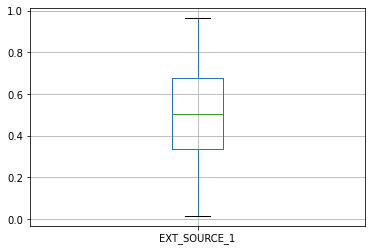

In [112]:
test.loc[test['TARGET'] == 0, 'EXT_SOURCE_1'].isnull().sum()

158607

In [113]:
test.loc[test['TARGET'] == 1, 'EXT_SOURCE_1'].isnull().sum()

14771

In [114]:
test.loc[test['TARGET'] == 1].shape

(24825, 125)

In [115]:
test.loc[test['TARGET'] == 0].shape

(282686, 125)

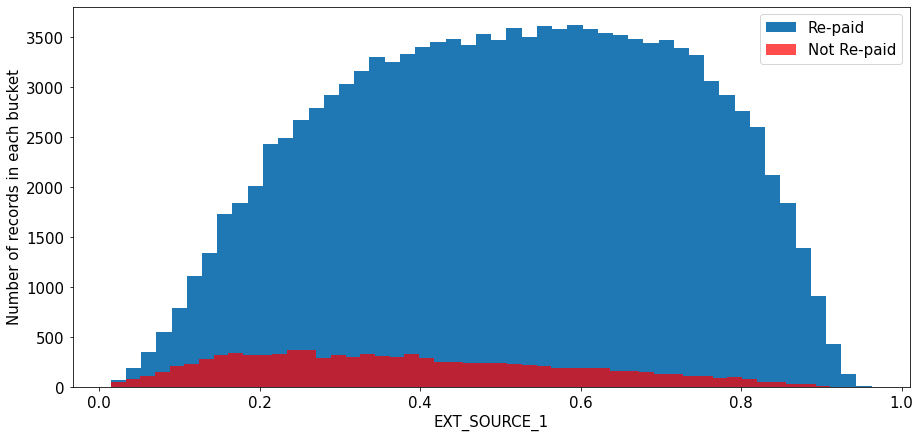

In [8]:
plt.figure(figsize=(15,7))
plt.hist(app_train.loc[app_train['TARGET'] == 0, 'EXT_SOURCE_1'], bins=50, label='Re-paid')
plt.hist(app_train.loc[app_train['TARGET'] == 1, 'EXT_SOURCE_1'], bins=50, label='Not Re-paid', alpha=0.7, color='r')
plt.xlabel('EXT_SOURCE_1', fontsize=15)
plt.ylabel('Number of records in each bucket', fontsize=15)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=15, pad=5)
plt.show() 

## EXT_SOURCE_2

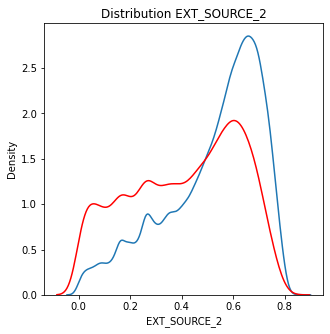

In [31]:
plt.figure(figsize = (5, 5))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'EXT_SOURCE_2'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'EXT_SOURCE_2'], label = 'target == 1',color='r')

# Labeling of plot
plt.xlabel('EXT_SOURCE_2'); plt.ylabel('Density'); plt.title('Distribution EXT_SOURCE_2');

<AxesSubplot:>

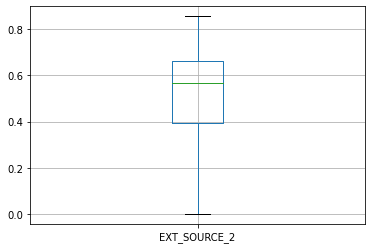

In [102]:
app_train.boxplot(column=['EXT_SOURCE_2'])

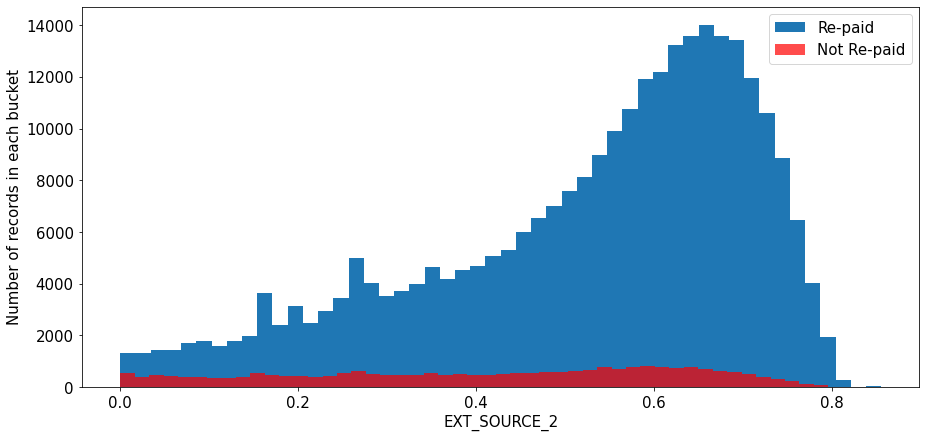

In [9]:
plt.figure(figsize=(15,7))
plt.hist(app_train.loc[app_train['TARGET'] == 0, 'EXT_SOURCE_2'], bins=50, label='Re-paid')
plt.hist(app_train.loc[app_train['TARGET'] == 1, 'EXT_SOURCE_2'], bins=50, label='Not Re-paid', alpha=0.7, color='r')
plt.xlabel('EXT_SOURCE_2', fontsize=15)
plt.ylabel('Number of records in each bucket', fontsize=15)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=15, pad=5)
plt.show() 

## EXT_SOURCE_3

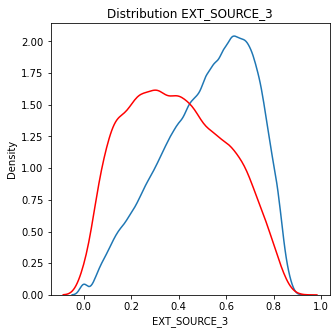

In [32]:
plt.figure(figsize = (5, 5))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'EXT_SOURCE_3'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'EXT_SOURCE_3'], label = 'target == 1',color = 'r')

# Labeling of plot
plt.xlabel('EXT_SOURCE_3'); plt.ylabel('Density'); plt.title('Distribution EXT_SOURCE_3');

<AxesSubplot:>

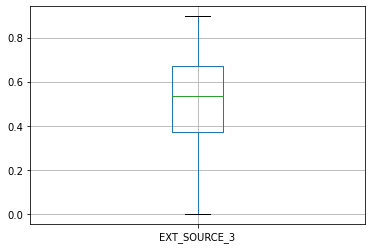

In [103]:
app_train.boxplot(column=['EXT_SOURCE_3'])

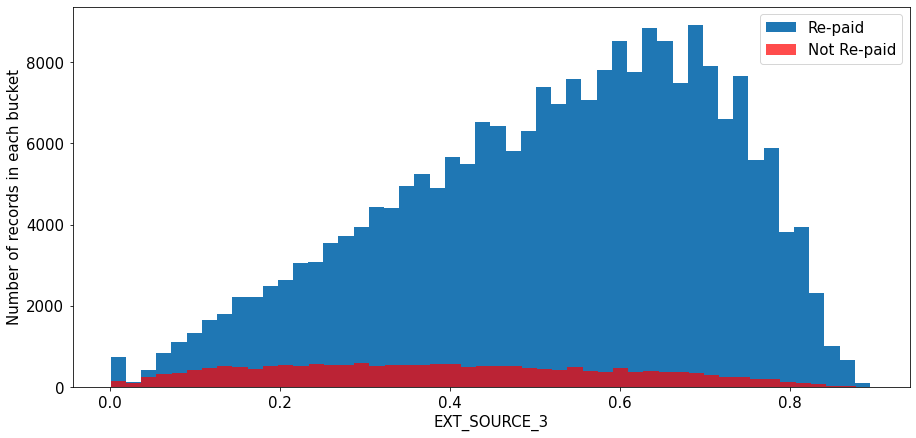

In [10]:
plt.figure(figsize=(15,7))
plt.hist(app_train.loc[app_train['TARGET'] == 0, 'EXT_SOURCE_3'], bins=50, label='Re-paid')
plt.hist(app_train.loc[app_train['TARGET'] == 1, 'EXT_SOURCE_3'], bins=50, label='Not Re-paid', alpha=0.7, color='r')
plt.xlabel('EXT_SOURCE_3', fontsize=15)
plt.ylabel('Number of records in each bucket', fontsize=15)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=15, pad=5)
plt.show() 

## Creation de EXT_SOURCE_SUM

In [13]:
app_train['EXT_SOURCE_SUM'] = app_train['EXT_SOURCE_1'] + app_train['EXT_SOURCE_2'] + app_train['EXT_SOURCE_3']

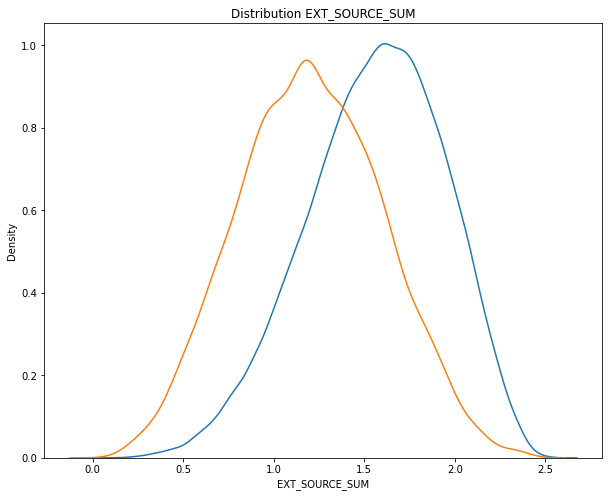

In [16]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'EXT_SOURCE_SUM'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'EXT_SOURCE_SUM'], label = 'target == 1')

# Labeling of plot
plt.xlabel('EXT_SOURCE_SUM'); plt.ylabel('Density'); plt.title('Distribution EXT_SOURCE_SUM');

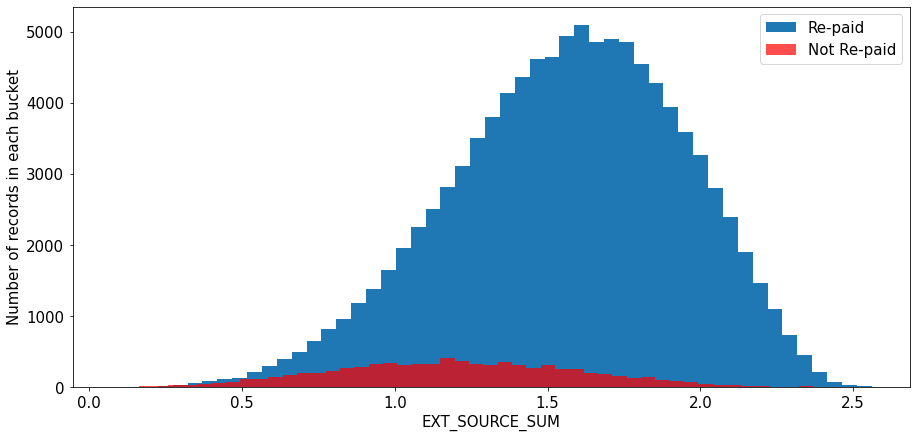

In [14]:
plt.figure(figsize=(15,7))
plt.hist(app_train.loc[app_train['TARGET'] == 0, 'EXT_SOURCE_SUM'], bins=50, label='Re-paid')
plt.hist(app_train.loc[app_train['TARGET'] == 1, 'EXT_SOURCE_SUM'], bins=50, label='Not Re-paid', alpha=0.7, color='r')
plt.xlabel('EXT_SOURCE_SUM', fontsize=15)
plt.ylabel('Number of records in each bucket', fontsize=15)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=15, pad=5)
plt.show() 

In [16]:
app_train['EXT_SOURCE_SUM2'] = app_train['EXT_SOURCE_2'] + app_train['EXT_SOURCE_3']

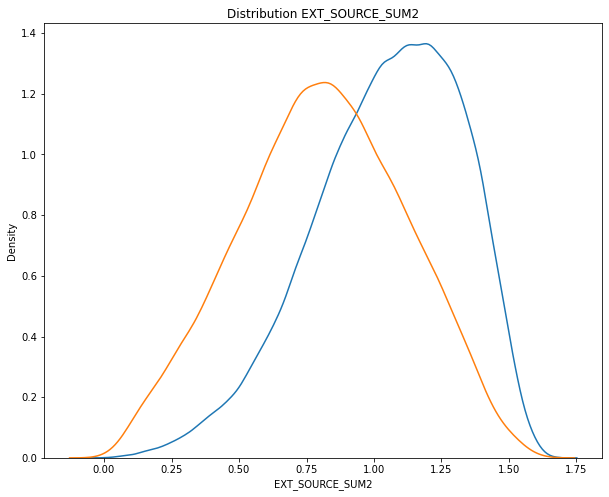

In [49]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'EXT_SOURCE_SUM2'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'EXT_SOURCE_SUM2'], label = 'target == 1')

# Labeling of plot
plt.xlabel('EXT_SOURCE_SUM2'); plt.ylabel('Density'); plt.title('Distribution EXT_SOURCE_SUM2');

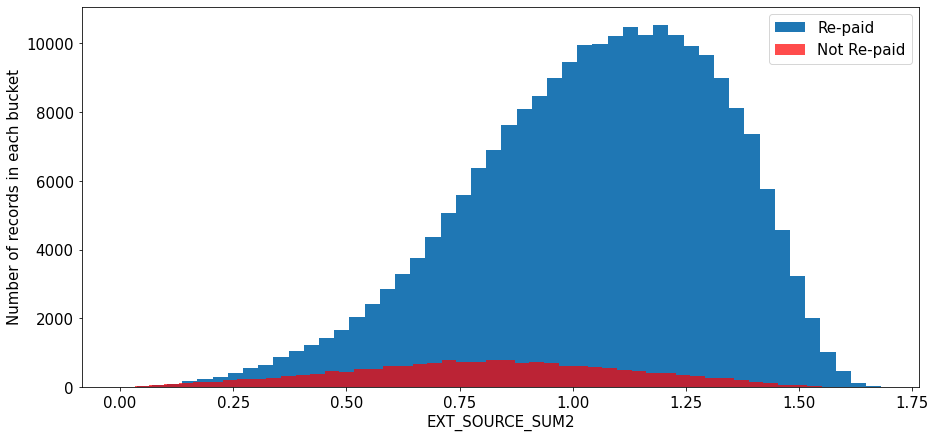

In [17]:
plt.figure(figsize=(15,7))
plt.hist(app_train.loc[app_train['TARGET'] == 0, 'EXT_SOURCE_SUM2'], bins=50, label='Re-paid')
plt.hist(app_train.loc[app_train['TARGET'] == 1, 'EXT_SOURCE_SUM2'], bins=50, label='Not Re-paid', alpha=0.7, color='r')
plt.xlabel('EXT_SOURCE_SUM2', fontsize=15)
plt.ylabel('Number of records in each bucket', fontsize=15)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=15, pad=5)
plt.show() 

## Etude "CNT_CHILDREN"

In [59]:
app_train.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

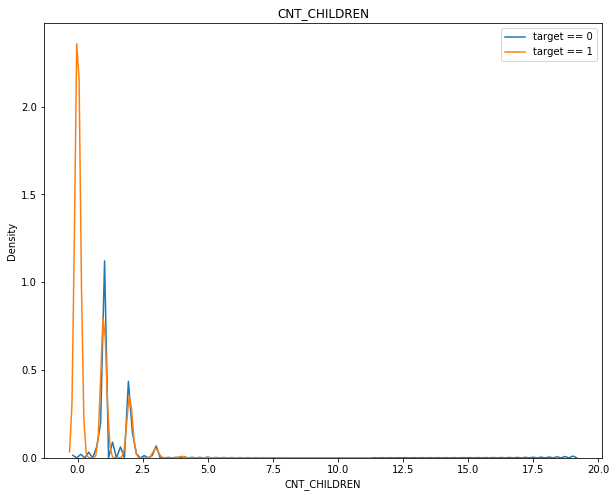

In [7]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'CNT_CHILDREN'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'CNT_CHILDREN'], label = 'target == 1')

# Labeling of plot
plt.xlabel('CNT_CHILDREN'); plt.ylabel('Density'); plt.title('CNT_CHILDREN');

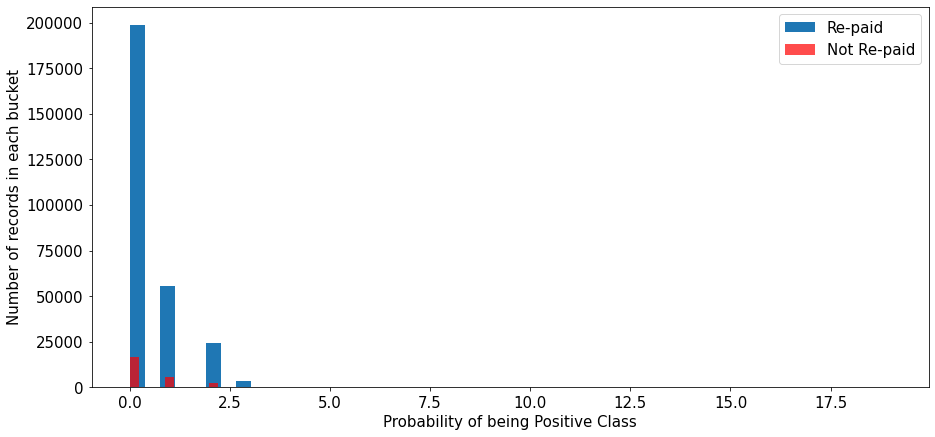

In [51]:
plt.figure(figsize=(15,7))
plt.hist(app_train.loc[app_train['TARGET'] == 0, 'CNT_CHILDREN'], bins=50, label='Re-paid')
plt.hist(app_train.loc[app_train['TARGET'] == 1, 'CNT_CHILDREN'], bins=50, label='Not Re-paid', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class', fontsize=15)
plt.ylabel('Number of records in each bucket', fontsize=15)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=15, pad=5)
plt.show() 

## Etude "CNT_FAM_MEMBERS"

In [61]:
app_train.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

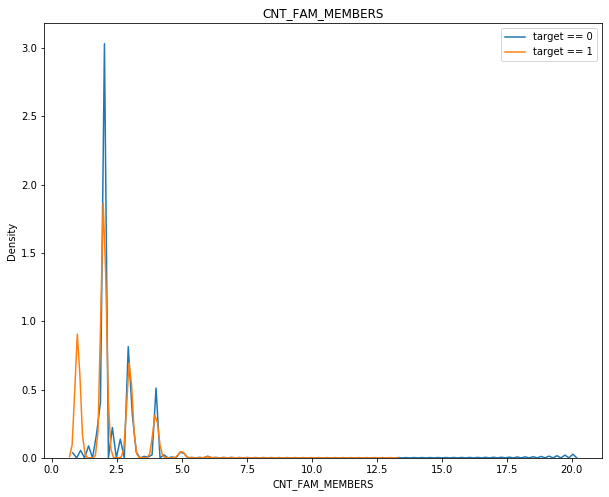

In [8]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'CNT_FAM_MEMBERS'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'CNT_FAM_MEMBERS'], label = 'target == 1')

# Labeling of plot
plt.xlabel('CNT_FAM_MEMBERS'); plt.ylabel('Density'); plt.title('CNT_FAM_MEMBERS');

## Etude "REGION_RATING_CLIENT" et "REGION_RATING_CLIENT_W_CITY"

In [63]:
app_train.REGION_RATING_CLIENT.value_counts()

2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64

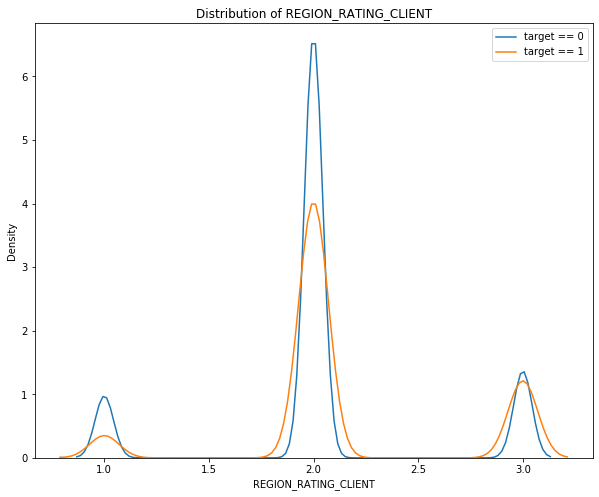

In [72]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'REGION_RATING_CLIENT'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'REGION_RATING_CLIENT'], label = 'target == 1')

# Labeling of plot
plt.xlabel('REGION_RATING_CLIENT'); plt.ylabel('Density'); plt.title('Distribution of REGION_RATING_CLIENT');

In [70]:
app_train.REGION_RATING_CLIENT_W_CITY.value_counts()

2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

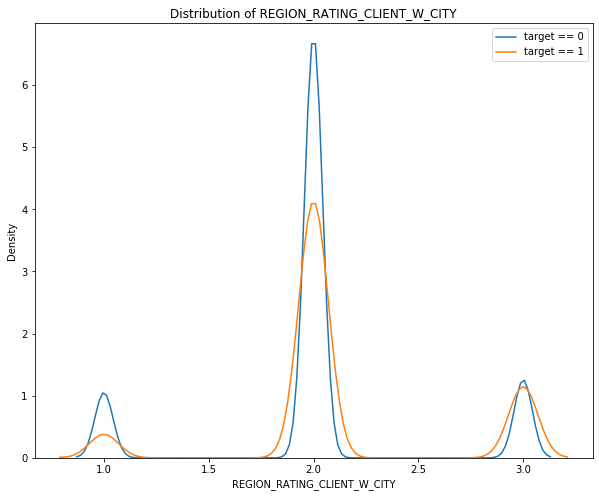

In [73]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'REGION_RATING_CLIENT_W_CITY'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'REGION_RATING_CLIENT_W_CITY'], label = 'target == 1')

# Labeling of plot
plt.xlabel('REGION_RATING_CLIENT_W_CITY'); plt.ylabel('Density'); plt.title('Distribution of REGION_RATING_CLIENT_W_CITY');

In [68]:
app_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

## Variables CNT_SOCIAL_CIRCLE

<AxesSubplot:>

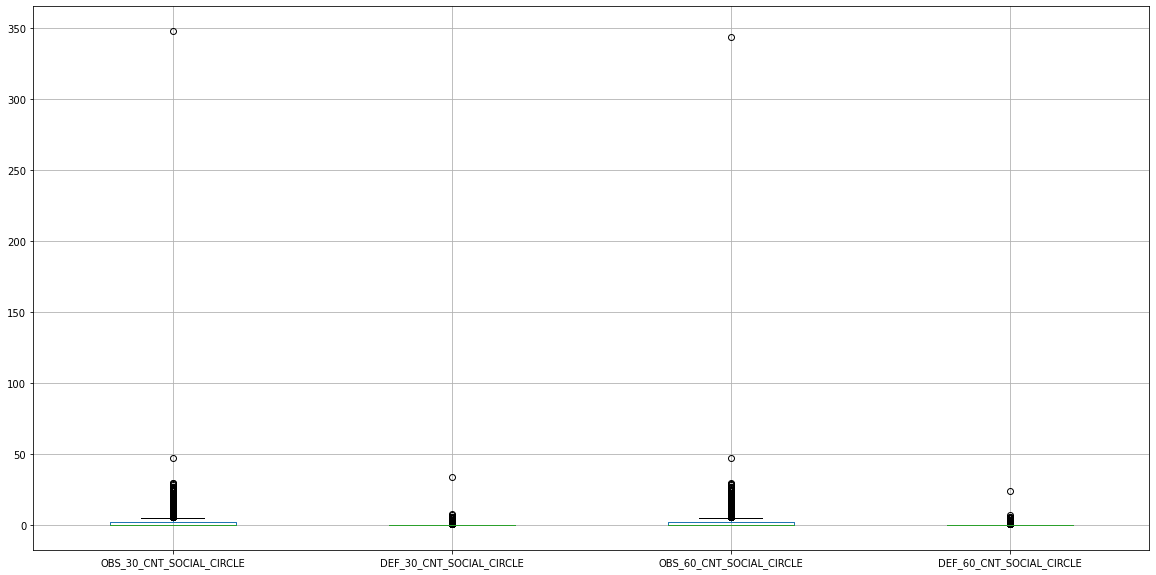

In [96]:
plt.figure(figsize = (20, 10))
app_train.boxplot(column=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'])

Une variable aberrante

In [98]:
app_train[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']][app_train['OBS_30_CNT_SOCIAL_CIRCLE']>50]

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
148403                     348.0                      34.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
148403                     344.0                      24.0

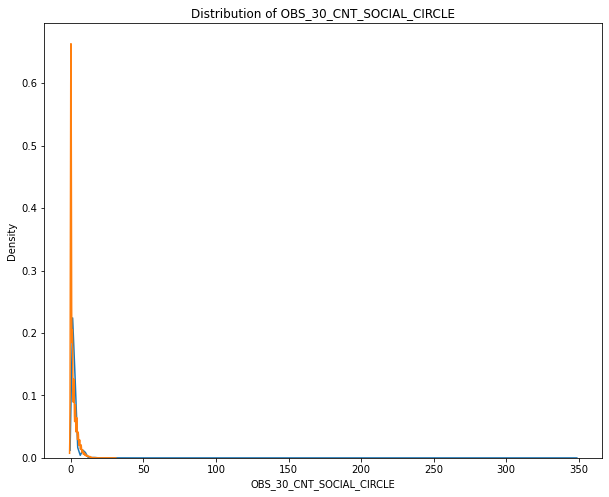

In [89]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'OBS_30_CNT_SOCIAL_CIRCLE'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'OBS_30_CNT_SOCIAL_CIRCLE'], label = 'target == 1')

# Labeling of plot
plt.xlabel('OBS_30_CNT_SOCIAL_CIRCLE'); plt.ylabel('Density'); plt.title('Distribution of OBS_30_CNT_SOCIAL_CIRCLE');

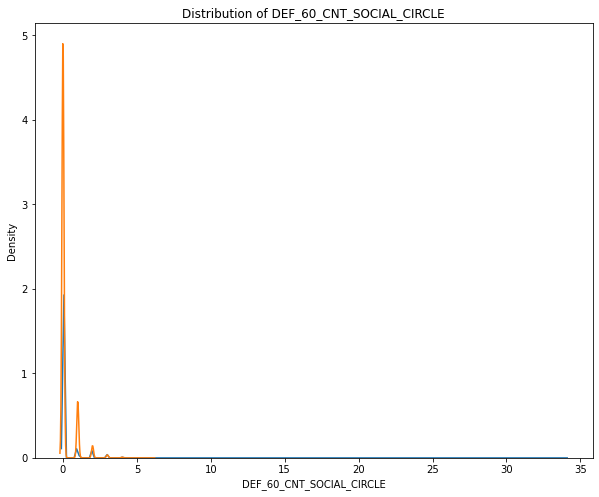

In [100]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DEF_30_CNT_SOCIAL_CIRCLE'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DEF_30_CNT_SOCIAL_CIRCLE'], label = 'target == 1')

# Labeling of plot
plt.xlabel('DEF_30_CNT_SOCIAL_CIRCLE'); plt.ylabel('Density'); plt.title('Distribution of DEF_30_CNT_SOCIAL_CIRCLE');

In [ ]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DEF_30_CNT_SOCIAL_CIRCLE'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DEF_30_CNT_SOCIAL_CIRCLE'], label = 'target == 1')

# Labeling of plot
plt.xlabel('DEF_30_CNT_SOCIAL_CIRCLE'); plt.ylabel('Density'); plt.title('Distribution of DEF_30_CNT_SOCIAL_CIRCLE');

In [101]:
app_train['DEF_OBS_30'] = app_train['DEF_30_CNT_SOCIAL_CIRCLE'] / app_train['OBS_30_CNT_SOCIAL_CIRCLE']

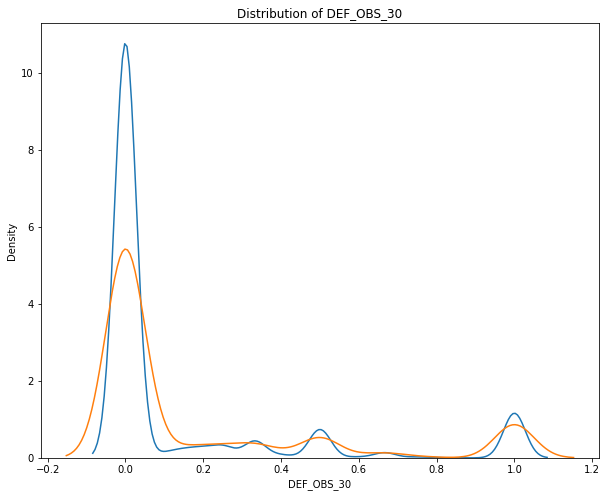

In [102]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DEF_OBS_30'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DEF_OBS_30'], label = 'target == 1')

# Labeling of plot
plt.xlabel('DEF_OBS_30'); plt.ylabel('Density'); plt.title('Distribution of DEF_OBS_30');

In [103]:
app_train['DEF_OBS_60'] = app_train['DEF_60_CNT_SOCIAL_CIRCLE'] / app_train['OBS_60_CNT_SOCIAL_CIRCLE']

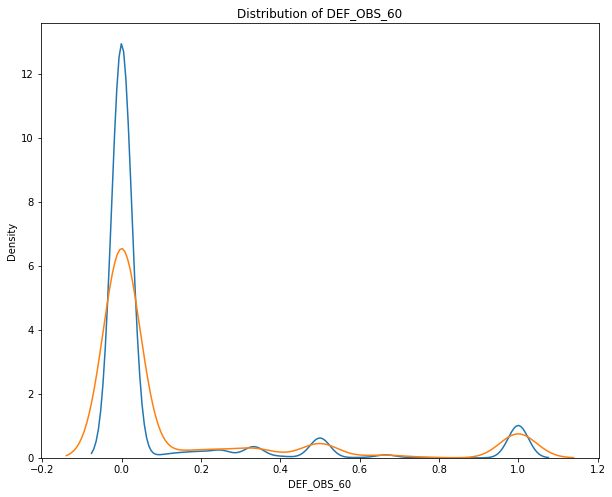

In [105]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DEF_OBS_60'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DEF_OBS_60'], label = 'target == 1')

# Labeling of plot
plt.xlabel('DEF_OBS_60'); plt.ylabel('Density'); plt.title('Distribution of DEF_OBS_60');

## Première Selection de variables

In [18]:
    col=['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR',
         'FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE',
         'AMT_ANNUITY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
         'DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
         'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
         'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
          'DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20']


In [19]:
app_train.shape

(307511, 124)

In [29]:
df1 = app_train[col]

In [30]:
missing_values = missing_values_table(df1)

Your selected dataframe has 48 columns.
There are 11 columns that have missing values.


In [76]:
missing_values

Missing Values  % of Total Values
EXT_SOURCE_SUM           197922               64.4
EXT_SOURCE_1             173378               56.4
EXT_SOURCE_SUM2           61395               20.0
EXT_SOURCE_3              60965               19.8
EXT_SOURCE_2                660                0.2
AMT_GOODS_PRICE             278                0.1
AMT_ANNUITY                  12                0.0
CNT_FAM_MEMBERS               2                0.0

### Traitement de "NAME_CONTRACT_TYPE"

Suppression de "NAME_CONTRACT_TYPE" égal à Revolving loans soit 29279 valeurs, je ne traite que les crédits Cash loans

In [77]:
df.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [78]:
df.drop( df[ df['NAME_CONTRACT_TYPE'] == "Revolving loans" ].index , inplace=True)

In [79]:
df.NAME_CONTRACT_TYPE.value_counts()

Cash loans    278232
Name: NAME_CONTRACT_TYPE, dtype: int64

In [80]:
missing_values = missing_values_table(df)
missing_values

Your selected dataframe has 25 columns.
There are 6 columns that have missing values.


Missing Values  % of Total Values
EXT_SOURCE_SUM           179699               64.6
EXT_SOURCE_1             158015               56.8
EXT_SOURCE_SUM2           55050               19.8
EXT_SOURCE_3              54658               19.6
EXT_SOURCE_2                599                0.2
AMT_ANNUITY                  12                0.0

### Traitement de AMT_GOODS_PRICE

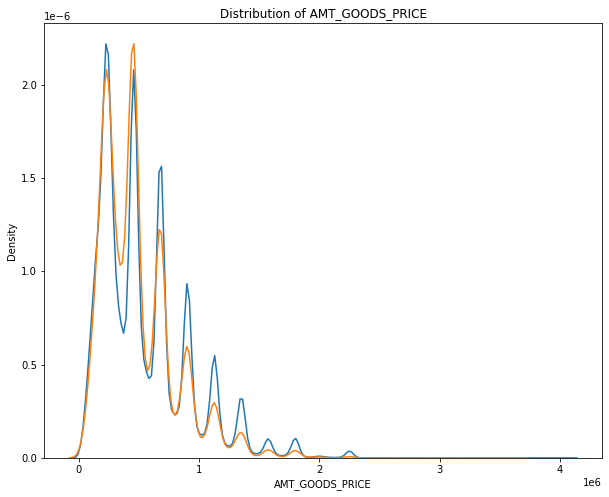

In [28]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'AMT_GOODS_PRICE'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'AMT_GOODS_PRICE'], label = 'target == 1')

# Labeling of plot
plt.xlabel('AMT_GOODS_PRICE'); plt.ylabel('Density'); plt.title('Distribution of AMT_GOODS_PRICE');

<AxesSubplot:>

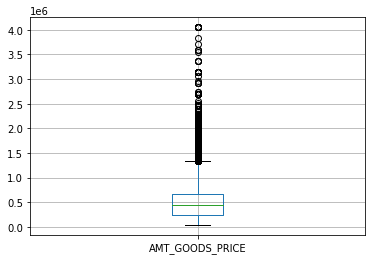

In [31]:
app_train.boxplot(column=['AMT_GOODS_PRICE'])

### Traitement de "AMT_ANNUITY"

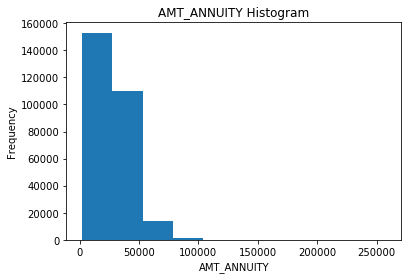

In [77]:
df['AMT_ANNUITY'].plot.hist(title = 'AMT_ANNUITY Histogram');
plt.xlabel('AMT_ANNUITY');

In [78]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  278232.000000  278232.000000  278232.000000      2.782320e+05   
mean   278125.362338       0.083459       0.410025      1.690695e+05   
std    102760.412749       0.276575       0.719522      2.459110e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189087.250000       0.000000       0.000000      1.125000e+05   
50%    278161.500000       0.000000       0.000000      1.530000e+05   
75%    367054.250000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT  AMT_GOODS_PRICE    AMT_ANNUITY     DAYS_BIRTH  \
count  2.782320e+05     2.782320e+05  278220.000000  278232.000000   
mean   6.279657e+05     5.605637e+05   28244.263958  -16159.256060   
std    4.054070e+05     3.736466e+05   14167.189802    4343.738866   
min    4.500000e+04     4.050000e+04    1615.500000  -25201.000000   
25%    2.970000e+05     2.475000e+05   18103.500000  -19791.000000   
50%    5.400000e+05     4.545000e+05   26086.500000  -15874.000000   
75%    8.353800e+05     7.020000e+05   35694.000000  -12552.000000   
max    4.050000e+06     4.050000e+06  258025.500000   -7489.000000   

       DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  278232.000000    278232.000000         278232.000000   
mean    66310.442020         2.149307              2.056029   
std    143346.548212         0.906035              0.507045   
min    -17912.000000         1.000000              1.000000   
25%     -2779.000000         2.000000              2.000000   
50%     -1220.000000         2.000000              2.000000   
75%      -271.000000         3.000000              2.000000   
max    365243.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  
count                278232.000000  
mean                      2.035291  
std                       0.501058  
min                       1.000000  
25%                       2.000000  
50%                       2.000000  
75%                       2.000000  
max                       3.000000

In [79]:
df[df["AMT_CREDIT"]<=df["AMT_ANNUITY"]]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE, AMT_ANNUITY, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY]
Index: []

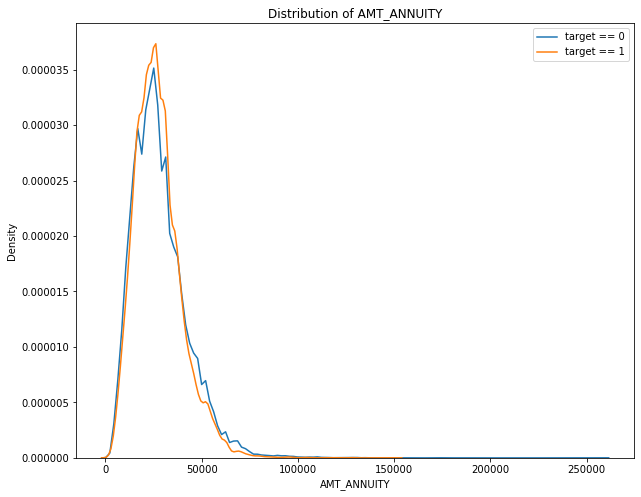

In [80]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'AMT_ANNUITY'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'AMT_ANNUITY'], label = 'target == 1')

# Labeling of plot
plt.xlabel('AMT_ANNUITY'); plt.ylabel('Density'); plt.title('Distribution of AMT_ANNUITY');

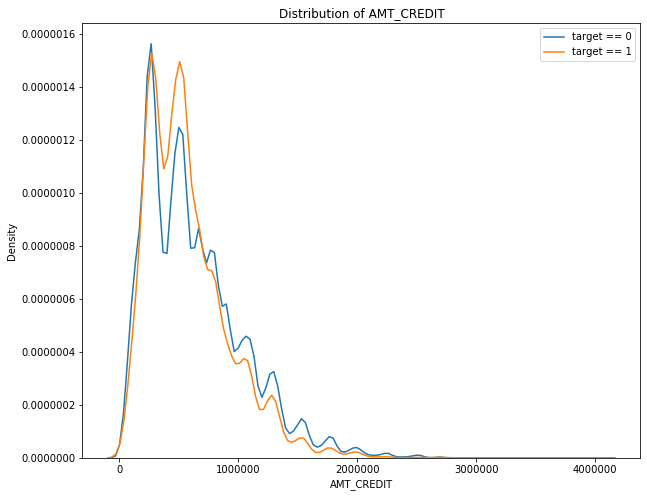

In [81]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'AMT_CREDIT'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'AMT_CREDIT'], label = 'target == 1')

# Labeling of plot
plt.xlabel('AMT_CREDIT'); plt.ylabel('Density'); plt.title('Distribution of AMT_CREDIT');

### Définition de la variable 'LENGTH_CREDIT'

Evaluons la longueur du crédit en mois

In [23]:
df = app_train.copy()

In [24]:
df['LENGTH_CREDIT']=df['AMT_CREDIT']/df['AMT_ANNUITY']

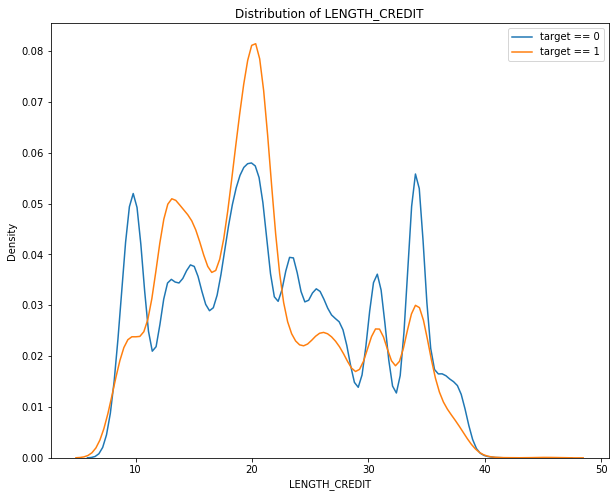

In [83]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'LENGTH_CREDIT'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'LENGTH_CREDIT'], label = 'target == 1')

# Labeling of plot
plt.xlabel('LENGTH_CREDIT'); plt.ylabel('Density'); plt.title('Distribution of LENGTH_CREDIT');

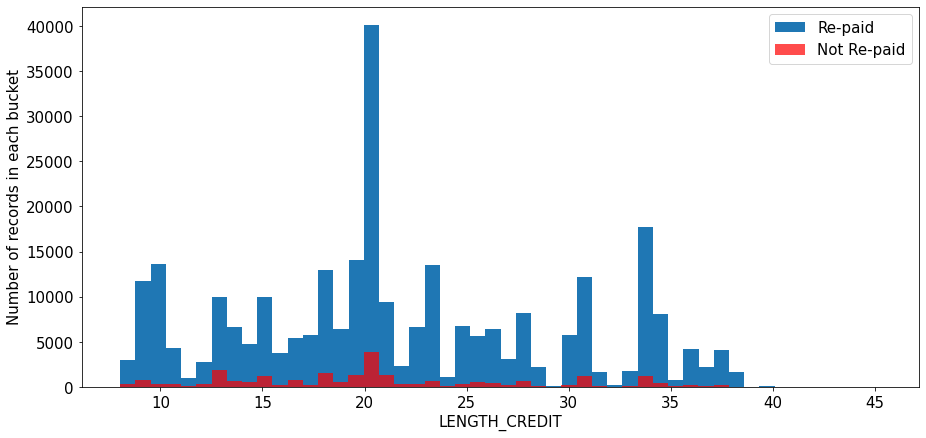

In [25]:
plt.figure(figsize=(15,7))
plt.hist(df.loc[app_train['TARGET'] == 0, 'LENGTH_CREDIT'], bins=50, label='Re-paid')
plt.hist(df.loc[app_train['TARGET'] == 1, 'LENGTH_CREDIT'], bins=50, label='Not Re-paid', alpha=0.7, color='r')
plt.xlabel('LENGTH_CREDIT', fontsize=15)
plt.ylabel('Number of records in each bucket', fontsize=15)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=15, pad=5)
plt.show() 

In [85]:
df['LENGTH_CREDIT'].describe()

count    278220.000000
mean         21.783472
std           8.205587
min           8.036674
25%          14.964556
50%          20.676853
75%          27.843408
max          45.305079
Name: LENGTH_CREDIT, dtype: float64

### Traitement de "CODE_GENDER"

34,3% des clients sont des hommes

In [89]:
df.shape

(278232, 21)

In [87]:
df.CODE_GENDER.value_counts()

F    182800
M     95432
Name: CODE_GENDER, dtype: int64

In [93]:
df.TARGET.value_counts()

0    255011
1     23221
Name: TARGET, dtype: int64

<Figure size 1440x1440 with 0 Axes>

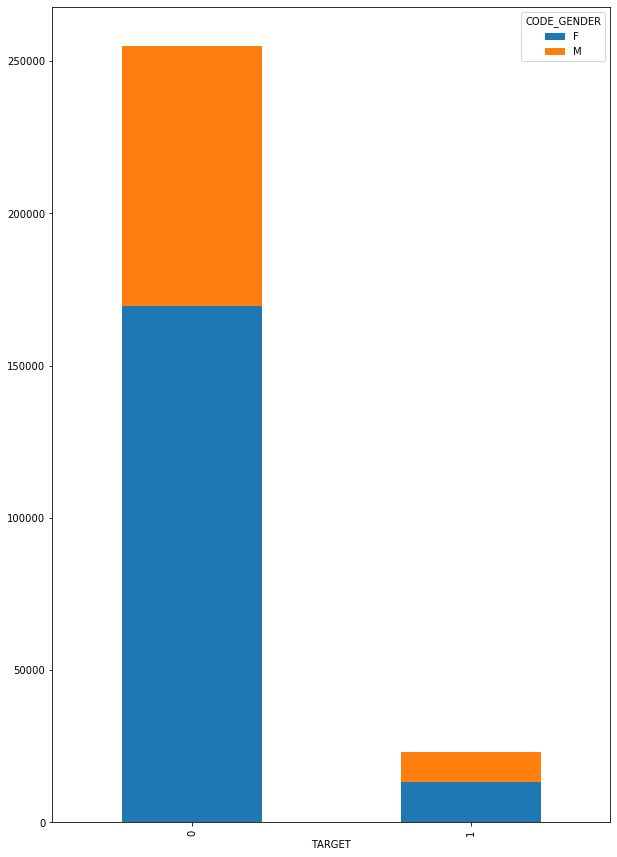

In [101]:
plt.figure(figsize = (20,20))
pd.crosstab(df['TARGET'],df['CODE_GENDER']).plot(kind="bar",stacked=True,figsize=(10,15))

In [102]:
pd.crosstab(df['TARGET'],df['CODE_GENDER'])

CODE_GENDER       F      M
TARGET                    
0            169673  85338
1             13127  10094

In [103]:
pd.crosstab(df.TARGET,df.CODE_GENDER, normalize='index')\
    .round(4)*100

CODE_GENDER      F      M
TARGET                   
0            66.54  33.46
1            56.53  43.47

### Traitement de 'AMT_INCOME_TOTAL'

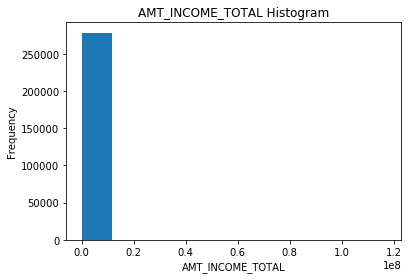

In [104]:
df['AMT_INCOME_TOTAL'].plot.hist(title = 'AMT_INCOME_TOTAL Histogram');
plt.xlabel('AMT_INCOME_TOTAL');

In [105]:
df['AMT_INCOME_TOTAL'].describe()

count    2.782320e+05
mean     1.690695e+05
std      2.459110e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.530000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

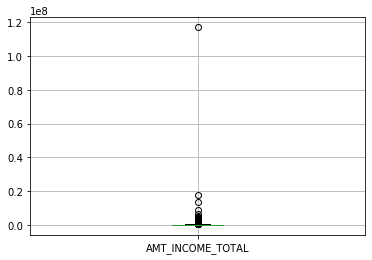

In [106]:
df.boxplot(column=['AMT_INCOME_TOTAL'])

Il y a une valeur aberrante 

In [108]:
df[df['AMT_INCOME_TOTAL']==1.170000e+08]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840      114967       1         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840               Y             1       117000000.0    562491.0   

       AMT_GOODS_PRICE  AMT_ANNUITY NAME_INCOME_TYPE  \
12840         454500.0      26194.5          Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840  Secondary / secondary special            Married  House / apartment   

       DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
12840      -12615           -922              3.0                     2   

       REGION_RATING_CLIENT_W_CITY  LENGTH_CREDIT  
12840                            2       21.47363

In [54]:
max(df['AMT_INCOME_TOTAL'])

117000000.0

In [62]:
df[df['AMT_INCOME_TOTAL']>5.025000e+07]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE FLAG_OWN_CAR FLAG_OWN_REALTY  \
12840      114967       1         Cash loans            N               Y   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  \
12840             1       117000000.0    562491.0         454500.0   

       AMT_ANNUITY NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
12840      26194.5          Working  Secondary / secondary special   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
12840            Married  House / apartment      -12615           -922   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
12840              3.0                     2                            2   

       LENGTH_CREDIT  
12840       21.47363

Suppression de la valeur aberrante

In [82]:
df.drop( df[ df['AMT_INCOME_TOTAL'] == 117000000.0 ].index , inplace=True)

<AxesSubplot:>

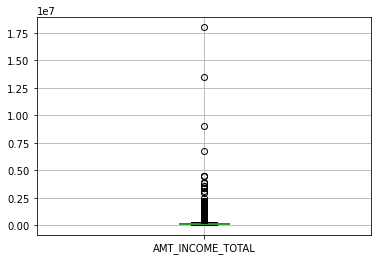

In [83]:
df.boxplot(column=['AMT_INCOME_TOTAL'])

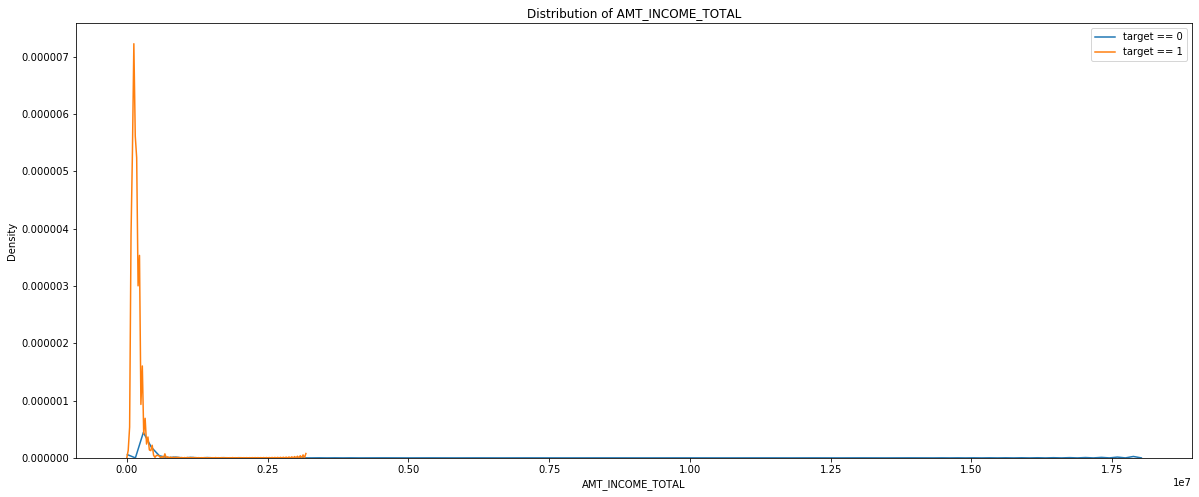

In [114]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'AMT_INCOME_TOTAL'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'AMT_INCOME_TOTAL'], label = 'target == 1')

# Labeling of plot
plt.xlabel('AMT_INCOME_TOTAL'); plt.ylabel('Density'); plt.title('Distribution of AMT_INCOME_TOTAL');

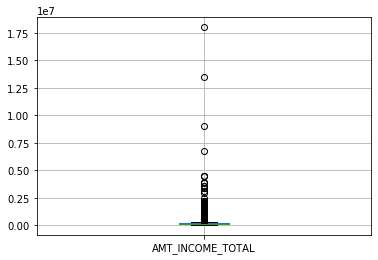

In [111]:
df.boxplot(column=['AMT_INCOME_TOTAL'])

In [86]:
df[df['AMT_INCOME_TOTAL']>0.50e+07]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
77768       190160       0         Cash loans           F            Y   
131127      252084       0         Cash loans           M            Y   
203693      336147       0         Cash loans           M            Y   
246858      385674       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
77768                N             0         9000000.0   1431531.0   
131127               N             0         6750000.0    790830.0   
203693               Y             2        18000090.0    675000.0   
246858               Y             0        13500000.0   1400503.5   

        AMT_GOODS_PRICE  AMT_ANNUITY      NAME_INCOME_TYPE  \
77768         1377000.0     132601.5               Working   
131127         675000.0      52978.5               Working   
203693         675000.0      69295.5  Commercial associate   
246858        1368000.0     130945.5  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
77768                Higher education     Civil marriage  House / apartment   
131127               Higher education            Married  House / apartment   
203693  Secondary / secondary special            Married  House / apartment   
246858               Higher education            Married  House / apartment   

        DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
77768       -16425          -8476              2.0                     2   
131127      -19341           -443              2.0                     2   
203693      -15704          -4961              4.0                     2   
246858      -13551           -280              2.0                     2   

        REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_SUM2  EXT_SOURCE_SUM  \
77768                             2         0.937047        1.589399   
131127                            2         1.048504             NaN   
203693                            2              NaN             NaN   
246858                            2              NaN             NaN   

        EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  
77768       0.652352      0.504086      0.432962  
131127           NaN      0.552838      0.495666  
203693      0.543417      0.788606           NaN  
246858           NaN      0.713507           NaN

suppression des demandes avec "AMT_ANNUITY" non renseignées

In [185]:
missing_values = missing_values_table(df)

Your selected dataframe has 27 columns.
There are 3 columns that have missing values.


In [186]:
missing_values

Missing Values  % of Total Values
AMT_ANNUITY                         12                0.0
LENGTH_CREDIT                       12                0.0
ANNUITY_INCOME_PERCENT              12                0.0

In [189]:
df.drop( df[ df['AMT_ANNUITY'].isnull() ].index , inplace=True)

In [190]:
missing_values = missing_values_table(df)

Your selected dataframe has 27 columns.
There are 0 columns that have missing values.


In [191]:
df.shape

(278219, 27)

### Creation de 'INCOME_PER_PERSON'

Revenu par personnes du foyer, tres simplifié vu que nous n'avons pas de détail sur le revenu du client 

In [146]:
df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']

In [147]:
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
5                    Y             0           99000.0    490495.5   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_GOODS_PRICE  AMT_ANNUITY      NAME_INCOME_TYPE  \
0              351000.0      24700.5               Working   
1             1129500.0      35698.5         State servant   
3              297000.0      29686.5               Working   
4              513000.0      21865.5               Working   
5              454500.0      27517.5         State servant   
...                 ...          ...                   ...   
307506         225000.0      27558.0               Working   
307507         225000.0      12001.5             Pensioner   
307508         585000.0      29979.0               Working   
307509         319500.0      20205.0  Commercial associate   
307510         675000.0      49117.5  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
5       Secondary / secondary special               Married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  \
0       House / apartment       -9461           -637              1.0   
1       House / apartment      -16765          -1188              2.0   
3       House / apartment      -19005          -3039              2.0   
4       House / apartment      -19932          -3038              1.0   
5       House / apartment      -16941          -1588              2.0   
...                   ...         ...            ...              ...   
307506       With parents       -9327           -236              1.0   
307507  House / apartment      -20775         365243              1.0   
307508  House / apartment      -14966          -7921              1.0   
307509  House / apartment      -11961         

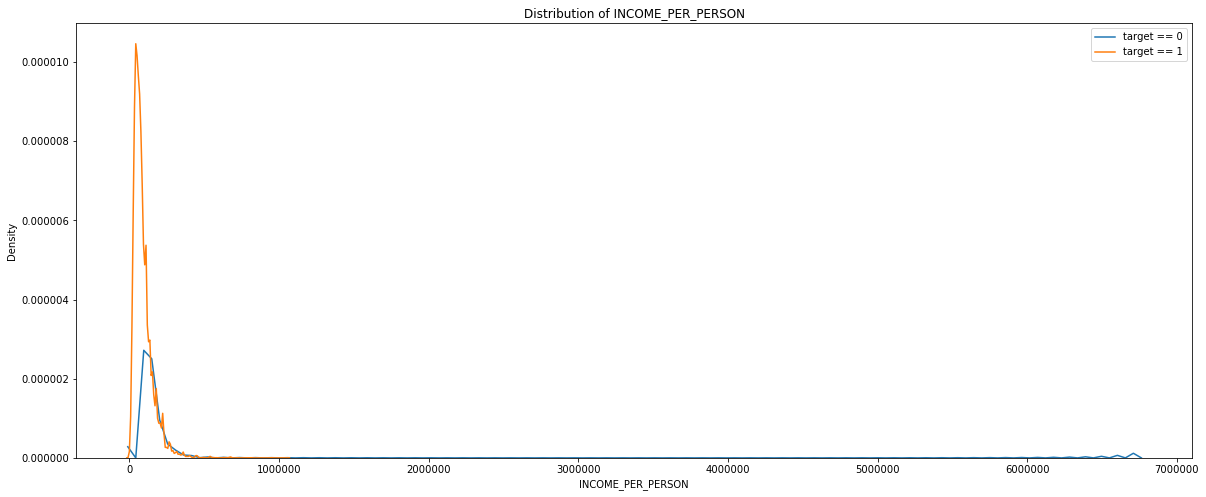

In [148]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'INCOME_PER_PERSON'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'INCOME_PER_PERSON'], label = 'target == 1')

# Labeling of plot
plt.xlabel('INCOME_PER_PERSON'); plt.ylabel('Density'); plt.title('Distribution of INCOME_PER_PERSON');

### Creation de 'CREDIT_INCOME_PERCENT'

Taux de remboursement mensuel

In [118]:
df['CREDIT_INCOME_PERCENT'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']*100

In [119]:
df[df['AMT_INCOME_TOTAL']>1.75e+07]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
203693      336147       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
203693               Y             2        18000090.0    675000.0   

        AMT_GOODS_PRICE  AMT_ANNUITY      NAME_INCOME_TYPE  \
203693         675000.0      69295.5  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
203693  Secondary / secondary special            Married  House / apartment   

        DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
203693      -15704          -4961              4.0                     2   

        REGION_RATING_CLIENT_W_CITY  LENGTH_CREDIT  CREDIT_INCOME_PERCENT  
203693                            2       9.740892               3.749981

In [122]:
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
5                    Y             0           99000.0    490495.5   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_GOODS_PRICE  AMT_ANNUITY      NAME_INCOME_TYPE  \
0              351000.0      24700.5               Working   
1             1129500.0      35698.5         State servant   
3              297000.0      29686.5               Working   
4              513000.0      21865.5               Working   
5              454500.0      27517.5         State servant   
...                 ...          ...                   ...   
307506         225000.0      27558.0               Working   
307507         225000.0      12001.5             Pensioner   
307508         585000.0      29979.0               Working   
307509         319500.0      20205.0  Commercial associate   
307510         675000.0      49117.5  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
5       Secondary / secondary special               Married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  \
0       House / apartment       -9461           -637              1.0   
1       House / apartment      -16765          -1188              2.0   
3       House / apartment      -19005          -3039              2.0   
4       House / apartment      -19932          -3038              1.0   
5       House / apartment      -16941          -1588              2.0   
...                   ...         ...            ...              ...   
307506       With parents       -9327           -236              1.0   
307507  House / apartment      -20775         365243              1.0   
307508  House / apartment      -14966          -7921              1.0   
307509  House / apartment      -11961         

### Creation de 'ANNUITY_INCOME_PERCENT'

Ceci est une première approche tres simple d'un taux d'endettement

In [121]:
df['ANNUITY_INCOME_PERCENT'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']*100

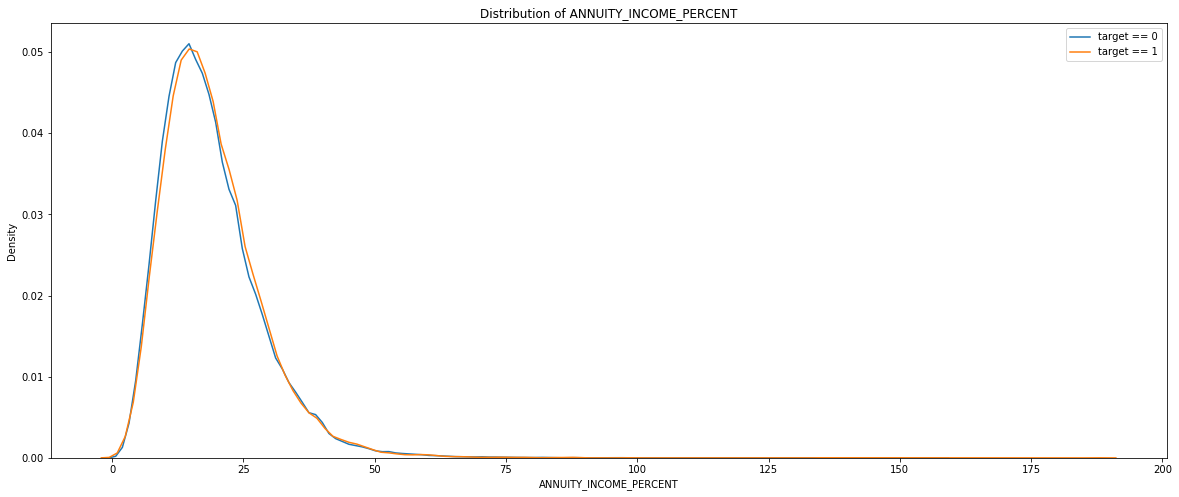

In [123]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'ANNUITY_INCOME_PERCENT'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'ANNUITY_INCOME_PERCENT'], label = 'target == 1')

# Labeling of plot
plt.xlabel('ANNUITY_INCOME_PERCENT'); plt.ylabel('Density'); plt.title('Distribution of ANNUITY_INCOME_PERCENT');

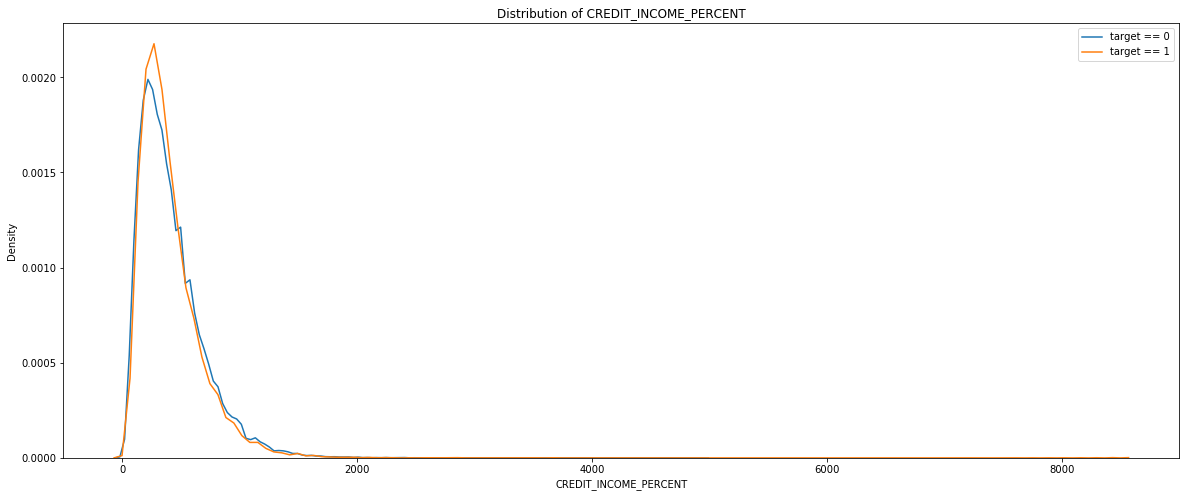

In [124]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'CREDIT_INCOME_PERCENT'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'CREDIT_INCOME_PERCENT'], label = 'target == 1')

# Labeling of plot
plt.xlabel('CREDIT_INCOME_PERCENT'); plt.ylabel('Density'); plt.title('Distribution of CREDIT_INCOME_PERCENT');

In [106]:
app_train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

## OWN_CAR_AGE

<AxesSubplot:>

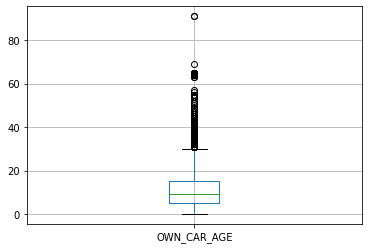

In [108]:
app_train.boxplot(column=['OWN_CAR_AGE'])

In [111]:
app_train.OWN_CAR_AGE.describe()

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

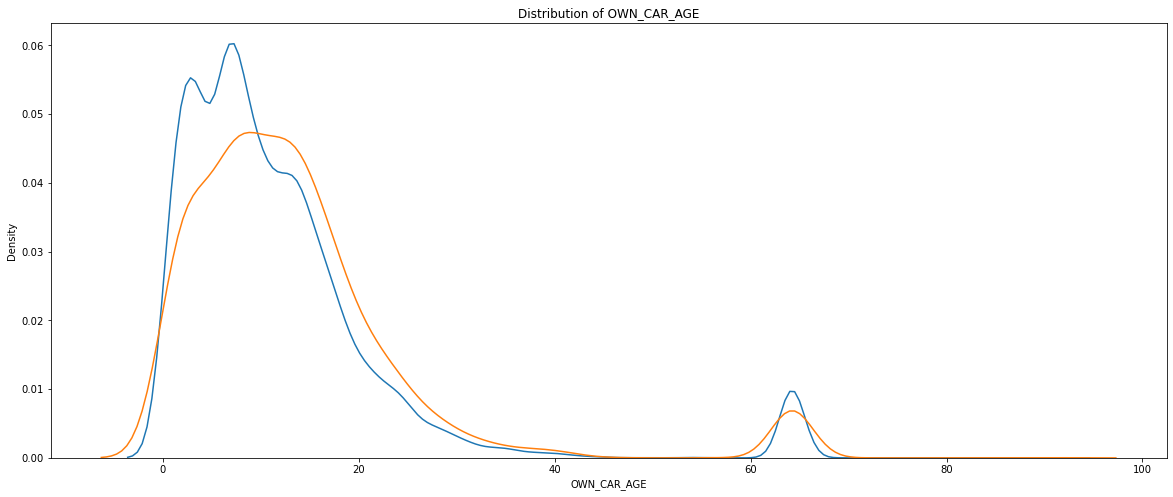

In [110]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'OWN_CAR_AGE'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'OWN_CAR_AGE'], label = 'target == 1')

# Labeling of plot
plt.xlabel('OWN_CAR_AGE'); plt.ylabel('Density'); plt.title('Distribution of OWN_CAR_AGE');

## FLAGS_DOCUMENT

In [114]:
col_flag = ['FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20']

## Creation de RATE_DOC_PROVIDED 

In [116]:
app_train['RATE_DOC_PROVIDED'] = app_train[col_flag].sum(axis=1)/20

In [117]:
app_train['RATE_DOC_PROVIDED']

0         0.05
1         0.05
2         0.00
3         0.05
4         0.05
          ... 
307506    0.05
307507    0.05
307508    0.05
307509    0.05
307510    0.05
Name: RATE_DOC_PROVIDED, Length: 307511, dtype: float64

<AxesSubplot:>

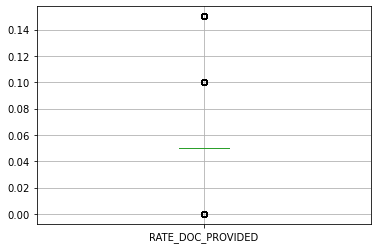

In [119]:
app_train.boxplot(column=['RATE_DOC_PROVIDED'])

In [120]:
app_train['SUM_DOC_PROVIDED'] = app_train[col_flag].sum(axis=1)

<AxesSubplot:>

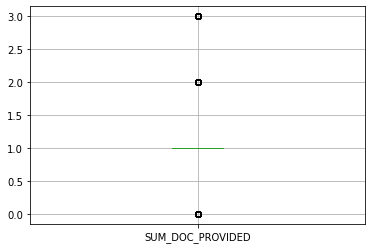

In [121]:
app_train.boxplot(column=['SUM_DOC_PROVIDED'])

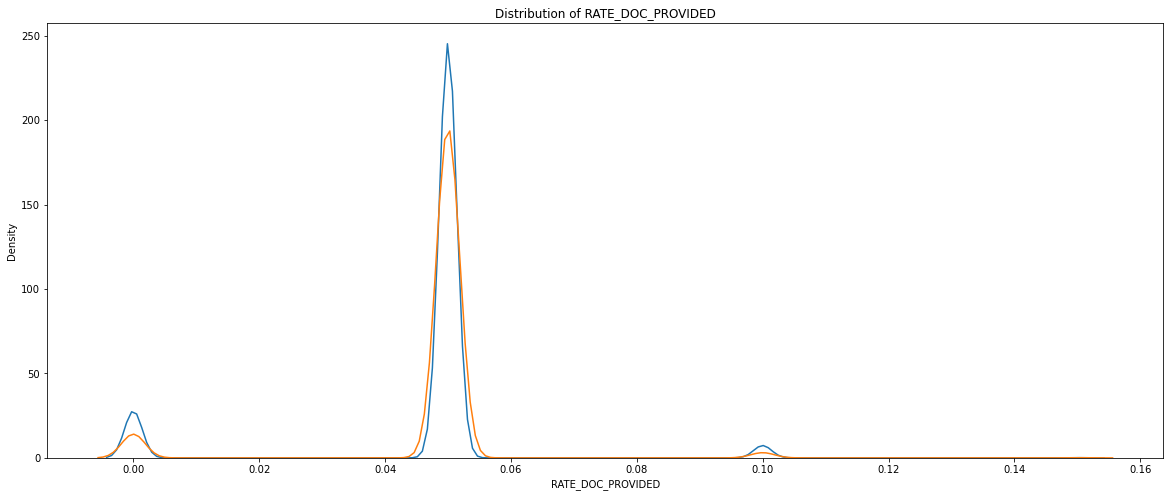

In [125]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'RATE_DOC_PROVIDED'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'RATE_DOC_PROVIDED'], label = 'target == 1')

# Labeling of plot
plt.xlabel('RATE_DOC_PROVIDED'); plt.ylabel('Density'); plt.title('Distribution of RATE_DOC_PROVIDED');

In [123]:
app_train['SUM_DOC_PROVIDED'].value_counts()

1    269978
0     29635
2      7742
3       156
Name: SUM_DOC_PROVIDED, dtype: int64

In [122]:
app_train[col_flag]

FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                     0                1                0                0   
1                     0                1                0                0   
2                     0                0                0                0   
3                     0                1                0                0   
4                     0                0                0                0   
...                 ...              ...              ...              ...   
307506                0                0                0                0   
307507                0                1                0                0   
307508                0                1                0                0   
307509                0                1                0                0   
307510                0                1                0                0   

        FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                     0                0                0                0   
1                     0                0                0                0   
2                     0                0                0                0   
3                     0                0                0                0   
4                     0                0                1                0   
...                 ...              ...              ...              ...   
307506                0                0                1                0   
307507                0                0                0                0   
307508                0                0                0                0   
307509                0                0                0                0   
307510                0                0                0                0   

        FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
307506                 0                 0                 0   
307507                 0                 0                 0   
307508                 0                 0                 0   
307509                 0                 0                 0   
307510                 0                 0                 0   

        FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
307506                 0                 0                 0   
307507                 0                 0                 0   
307508                 0                 0                 0   
307509                 0                 0                 0   
307510                 0                 0                 0   

        FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
307506                 0                 0                 0   
307507                 0                 0                 0   
307508              

# DAYS_LAST_PHONE_CHANGE

<AxesSubplot:>

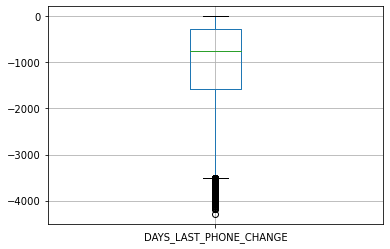

In [126]:
app_train.boxplot(column=['DAYS_LAST_PHONE_CHANGE'])

In [128]:
app_train['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

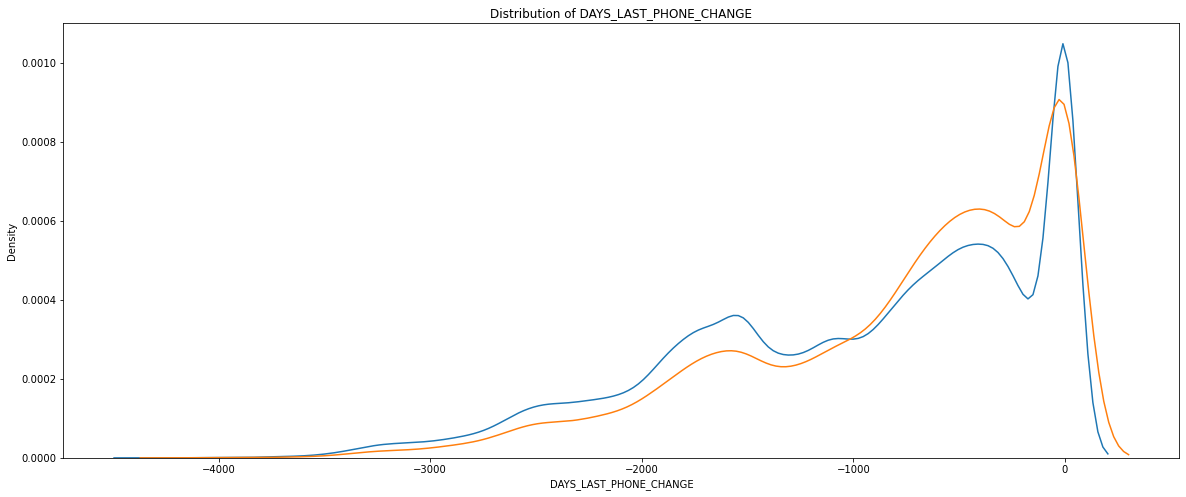

In [129]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[(app_train['TARGET'] == 0), 'DAYS_LAST_PHONE_CHANGE'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_LAST_PHONE_CHANGE'], label = 'target == 1')

# Labeling of plot
plt.xlabel('DAYS_LAST_PHONE_CHANGE'); plt.ylabel('Density'); plt.title('Distribution of DAYS_LAST_PHONE_CHANGE');

## CORRECTION DE VARIABLES

### Traitement de "DAYS_EMPLOYED" 

In [ ]:
"DAYS_EMPLOYED" est égal à 365243 quand les demandeurs sont "Pensioner" ou "Unemployed"                

In [140]:
df["DAYS_EMPLOYED"][df["DAYS_EMPLOYED"] == 365243 ].value_counts()

365243    55374
Name: DAYS_EMPLOYED, dtype: int64

In [142]:
df["NAME_INCOME_TYPE"][df["DAYS_EMPLOYED"] == 365243 ].value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

In [144]:
df["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [145]:
df["DAYS_EMPLOYED"][df["DAYS_EMPLOYED"] == 0 ].value_counts()

0    2
Name: DAYS_EMPLOYED, dtype: int64

In [146]:
df[df["DAYS_EMPLOYED"] == 0 ]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE FLAG_OWN_CAR FLAG_OWN_REALTY  \
23691       127568       0         Cash loans            N               N   
121625      241013       1         Cash loans            N               Y   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  \
23691              2          189000.0    983299.5         904500.0   
121625             1          112500.0    134775.0         112500.0   

        AMT_ANNUITY NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
23691       36571.5          Working               Higher education   
121625       7438.5          Working  Secondary / secondary special   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
23691           Separated  House / apartment      -12609              0   
121625     Civil marriage  House / apartment      -15053              0   

        CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  
23691               3.0                     2                            2  
121625              3.0                     2                            2

In [147]:
app_train['OCCUPATION_TYPE'][app_train["DAYS_EMPLOYED"] == 0 ]

23691             NaN
121625    Sales staff
Name: OCCUPATION_TYPE, dtype: object

In [148]:
app_train['ORGANIZATION_TYPE'][app_train["DAYS_EMPLOYED"] == 0 ]

23691     Business Entity Type 1
121625             Self-employed
Name: ORGANIZATION_TYPE, dtype: object

In [151]:
df[(df["DAYS_EMPLOYED"]*(-1) <30) & (df["DAYS_EMPLOYED"]!=365243)]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE FLAG_OWN_CAR FLAG_OWN_REALTY  \
181         100210       0         Cash loans            N               Y   
6835        107969       0    Revolving loans            Y               N   
8588        109999       0         Cash loans            Y               N   
11329       113196       0         Cash loans            N               Y   
13066       115228       0    Revolving loans            N               N   
17355       120242       1         Cash loans            N               N   
19381       122606       0         Cash loans            Y               Y   
22121       125761       0         Cash loans            N               Y   
23691       127568       0         Cash loans            N               N   
24160       128100       0    Revolving loans            Y               Y   
32767       137975       1         Cash loans            N               Y   
40984       147464       0    Revolving loans            N               Y   
41240       147747       0         Cash loans            Y               N   
44784       151874       0    Revolving loans            N               Y   
45047       152184       0         Cash loans            N               Y   
52162       160404       0         Cash loans            N               Y   
53901       162453       0         Cash loans            Y               N   
56564       165546       0         Cash loans            Y               Y   
58458       167763       0         Cash loans            N               Y   
58547       167862       0         Cash loans            N               Y   
60666       170352       0    Revolving loans            Y               Y   
62713       172741       0         Cash loans            Y               Y   
66307       176902       0         Cash loans            N               Y   
68653       179622       0         Cash loans            Y               Y   
70051       181260       0    Revolving loans            Y               Y   
83489       196836       0         Cash loans            Y               N   
88001       202160       0         Cash loans            N               Y   
90916       205558       0         Cash loans            Y               Y   
95157       210483       0         Cash loans            Y               N   
96664       212216       0         Cash loans            Y               Y   
101828      218223       1         Cash loans            N               Y   
103566      220205       0    Revolving loans            N               N   
105384      222282       0         Cash loans            N               Y   
107198      224374       0         Cash loans            N               Y   
109933      227497       0         Cash loans            Y               Y   
111965      229892       1         Cash loans            Y               N   
113353      231463       0         Cash loans            N               N   
117424      236165       0         Cash loans            Y               Y   
121625      241013       1         Cash loans            N               Y   
123488      243209       0         Cash loans            N               Y   
124931      244881       0         Cash loans            Y               Y   
133560      254902       0         Cash loans            N               Y   
134187      255628       0         Cash loans            Y               Y   
137858      259879       0    Revolving loans            Y               Y   
138071      260121       1         Cash loans            N               N   
140543      262966       0         Cash loans            N               N   
142950      265745       0         Cash loans            N               Y   
147852      271430       0    Revolving loans            N               Y   
151892      276065       0         Cash loans            Y               N   
158709      283995       0    Revolving loans            Y               Y   
160611      286187       0    

In [126]:
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE FLAG_OWN_CAR FLAG_OWN_REALTY  \
0           100002       1         Cash loans            N               Y   
1           100003       0         Cash loans            N               N   
2           100004       0    Revolving loans            Y               Y   
3           100006       0         Cash loans            N               Y   
4           100007       0         Cash loans            N               Y   
...            ...     ...                ...          ...             ...   
307506      456251       0         Cash loans            N               N   
307507      456252       0         Cash loans            N               Y   
307508      456253       0         Cash loans            N               Y   
307509      456254       1         Cash loans            N               Y   
307510      456255       0         Cash loans            N               N   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  \
0                  0          202500.0    406597.5         351000.0   
1                  0          270000.0   1293502.5        1129500.0   
2                  0           67500.0    135000.0         135000.0   
3                  0          135000.0    312682.5         297000.0   
4                  0          121500.0    513000.0         513000.0   
...              ...               ...         ...              ...   
307506             0          157500.0    254700.0         225000.0   
307507             0           72000.0    269550.0         225000.0   
307508             0          153000.0    677664.0         585000.0   
307509             0          171000.0    370107.0         319500.0   
307510             0          157500.0    675000.0         675000.0   

        AMT_ANNUITY      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0           24700.5               Working  Secondary / secondary special   
1           35698.5         State servant               Higher education   
2            6750.0               Working  Secondary / secondary special   
3           29686.5               Working  Secondary / secondary special   
4           21865.5               Working  Secondary / secondary special   
...             ...                   ...                            ...   
307506      27558.0               Working  Secondary / secondary special   
307507      12001.5             Pensioner  Secondary / secondary special   
307508      29979.0               Working               Higher education   
307509      20205.0  Commercial associate  Secondary / secondary special   
307510      49117.5  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0       Single / not married  House / apartment       -9461         -637.0   
1                    Married  House / apartment      -16765        -1188.0   
2       Single / not married  House / apartment      -19046         -225.0   
3             Civil marriage  House / apartment      -19005        -3039.0   
4       Single / not married  House / apartment      -19932        -3038.0   
...                      ...                ...         ...            ...   
307506             Separated       With parents       -9327         -236.0   
307507                 Widow  House / apartment      -20775            NaN   
307508             Separated  House / apartment      -14966        -7921.0   
307509               Married  House / apartment      -11961        -4786.0   
307510               Married  House / apartment      -16856        -1262.0   

        CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  
0                   1.0                     2                            2  
1                   2.0                     1                            1  
2                   1.0                     2                            2  
3                   2.0                     2               

Transformation en année, la variabe des personnes ne travaillant pas sera associée à la classe 0

In [132]:
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED']/365*(-1)
df['YEARS_EMPLOYED']

0            1.745205
1            3.254795
3            8.326027
4            8.323288
5            4.350685
             ...     
307506       0.646575
307507   -1000.665753
307508      21.701370
307509      13.112329
307510       3.457534
Name: YEARS_EMPLOYED, Length: 278231, dtype: float64

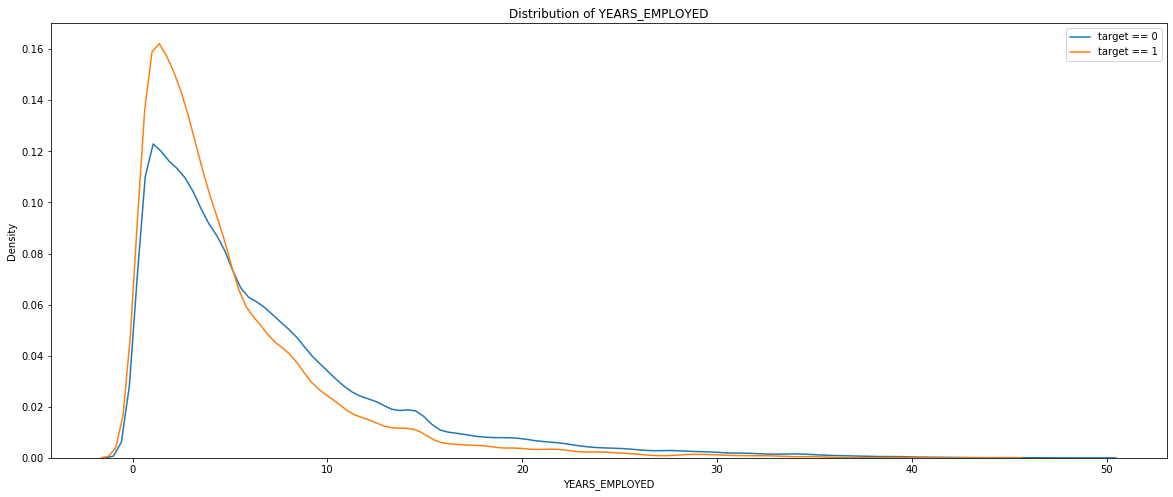

In [139]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) & (df.YEARS_EMPLOYED>=0), 'YEARS_EMPLOYED'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1) & (df.YEARS_EMPLOYED>=0), 'YEARS_EMPLOYED'], label = 'target == 1')

# Labeling of plot
plt.xlabel('YEARS_EMPLOYED'); plt.ylabel('Density'); plt.title('Distribution of YEARS_EMPLOYED');

## Traitement de  'DAYS_BIRTH'

Transformation en année pour plus de visibilité

In [35]:
df = app_train.copy()

In [36]:
df['YEARS_BIRTH'] = df['DAYS_BIRTH']/365*(-1)

In [38]:
df['YEARS_BIRTH'].astype(int)

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: YEARS_BIRTH, Length: 307511, dtype: int32

In [39]:
df['YEARS_BIRTH']=df['YEARS_BIRTH'].astype(int)

In [40]:
df['YEARS_BIRTH']

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: YEARS_BIRTH, Length: 307511, dtype: int32

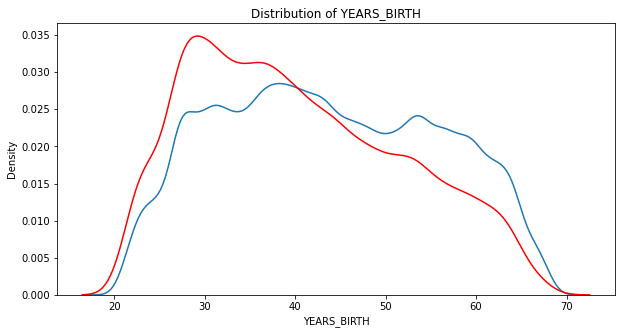

In [43]:
plt.figure(figsize = (10, 5))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'YEARS_BIRTH'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'YEARS_BIRTH'], label = 'target == 1',color='r')

# Labeling of plot
plt.xlabel('YEARS_BIRTH'); plt.ylabel('Density'); plt.title('Distribution of YEARS_BIRTH');

### Création de 'DAYS_EMPLOYED_PERCENT'

In [44]:
df['DAYS_EMPLOYED_PERCENT'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']*100

In [143]:
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
5                    Y             0           99000.0    490495.5   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_GOODS_PRICE  AMT_ANNUITY      NAME_INCOME_TYPE  \
0              351000.0      24700.5               Working   
1             1129500.0      35698.5         State servant   
3              297000.0      29686.5               Working   
4              513000.0      21865.5               Working   
5              454500.0      27517.5         State servant   
...                 ...          ...                   ...   
307506         225000.0      27558.0               Working   
307507         225000.0      12001.5             Pensioner   
307508         585000.0      29979.0               Working   
307509         319500.0      20205.0  Commercial associate   
307510         675000.0      49117.5  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
5       Secondary / secondary special               Married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  \
0       House / apartment       -9461           -637              1.0   
1       House / apartment      -16765          -1188              2.0   
3       House / apartment      -19005          -3039              2.0   
4       House / apartment      -19932          -3038              1.0   
5       House / apartment      -16941          -1588              2.0   
...                   ...         ...            ...              ...   
307506       With parents       -9327           -236              1.0   
307507  House / apartment      -20775         365243              1.0   
307508  House / apartment      -14966          -7921              1.0   
307509  House / apartment      -11961         

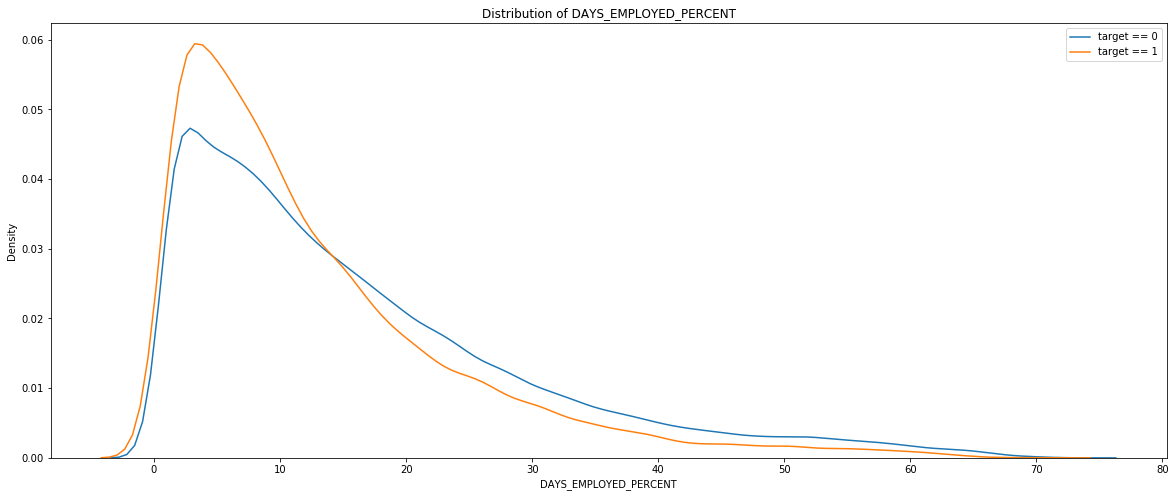

In [144]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) & (df.DAYS_EMPLOYED_PERCENT>=0), 'DAYS_EMPLOYED_PERCENT'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1) & (df.DAYS_EMPLOYED_PERCENT>=0), 'DAYS_EMPLOYED_PERCENT'], label = 'target == 1')

# Labeling of plot
plt.xlabel('DAYS_EMPLOYED_PERCENT'); plt.ylabel('Density'); plt.title('Distribution of DAYS_EMPLOYED_PERCENT');

# Aggregation des données de la table bureau.csv

données concernant les crédits antérieurs du client auprès d'autres institutions financières. Chaque crédit précédent a sa propre ligne dans le bureau, mais un prêt dans les données d'application peut avoir plusieurs crédits précédents.

In [87]:
# Training data
bureau = pd.read_csv('D:/openclassrooms/PROJET 7/DATA/bureau.csv')
print('Training data shape: ', app_train.shape)
bureau.head()

Training data shape:  (307511, 124)


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [151]:
missing_values = missing_values_table(bureau)
missing_values

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


Missing Values  % of Total Values
AMT_ANNUITY                    1226791               71.5
AMT_CREDIT_MAX_OVERDUE         1124488               65.5
DAYS_ENDDATE_FACT               633653               36.9
AMT_CREDIT_SUM_LIMIT            591780               34.5
AMT_CREDIT_SUM_DEBT             257669               15.0
DAYS_CREDIT_ENDDATE             105553                6.1
AMT_CREDIT_SUM                      13                0.0

In [152]:
bureau.CREDIT_ACTIVE.value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

In [158]:
missing_values = missing_values_table(bureau[bureau.CREDIT_ACTIVE == 'Active'])
missing_values

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


Missing Values  % of Total Values
DAYS_ENDDATE_FACT               628638               99.7
AMT_ANNUITY                     431549               68.4
AMT_CREDIT_MAX_OVERDUE          412174               65.4
AMT_CREDIT_SUM_LIMIT            173318               27.5
AMT_CREDIT_SUM_DEBT              73547               11.7
DAYS_CREDIT_ENDDATE              72496               11.5
AMT_CREDIT_SUM                       8                0.0

In [159]:
missing_values = missing_values_table(bureau[bureau.CREDIT_ACTIVE == 'Closed'])
missing_values

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


Missing Values  % of Total Values
AMT_ANNUITY                     790651               73.3
AMT_CREDIT_MAX_OVERDUE          707301               65.5
AMT_CREDIT_SUM_LIMIT            413524               38.3
AMT_CREDIT_SUM_DEBT             180543               16.7
DAYS_CREDIT_ENDDATE              32430                3.0
DAYS_ENDDATE_FACT                  125                0.0
AMT_CREDIT_SUM                       5                0.0

In [153]:
bureau.CREDIT_CURRENCY.value_counts()

currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: CREDIT_CURRENCY, dtype: int64

In [154]:
bureau.CREDIT_TYPE.value_counts()

Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Interbank credit                                      1
Mobile operator loan                                  1
Name: CREDIT_TYPE, dtype: int64

In [160]:
missing_values = missing_values_table(bureau[bureau.CREDIT_TYPE == 'Consumer credit'])
missing_values

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


Missing Values  % of Total Values
AMT_ANNUITY                     894258               71.4
AMT_CREDIT_MAX_OVERDUE          815905               65.2
AMT_CREDIT_SUM_LIMIT            439919               35.1
DAYS_ENDDATE_FACT               319203               25.5
AMT_CREDIT_SUM_DEBT             200073               16.0
DAYS_CREDIT_ENDDATE              13202                1.1
AMT_CREDIT_SUM                       3                0.0

In [161]:
missing_values = missing_values_table(bureau[bureau.CREDIT_TYPE == 'Credit card'])
missing_values

Your selected dataframe has 17 columns.
There are 6 columns that have missing values.


Missing Values  % of Total Values
AMT_ANNUITY                     292711               72.8
DAYS_ENDDATE_FACT               286687               71.3
AMT_CREDIT_MAX_OVERDUE          259700               64.6
AMT_CREDIT_SUM_LIMIT            117613               29.2
DAYS_CREDIT_ENDDATE              84719               21.1
AMT_CREDIT_SUM_DEBT              46105               11.5

In [164]:
bureau[bureau.AMT_CREDIT_SUM.isnull()]

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
218508       405791       6008179        Active      currency 1            0   
314570       418331       6064357        Active      currency 1            0   
572703       367465       6299480        Active      currency 1            0   
585311       371162       6452468        Closed      currency 1            0   
590328       209921       5491946        Closed      currency 1           -5   
814128       425959       6388671        Active      currency 1            0   
987620       375588       5078559        Active      currency 1            0   
1055762      118044       6753699        Active      currency 1         -422   
1113131      139064       6121986        Closed      currency 1            0   
1172368      207533       5875729        Closed      currency 1            0   
1176556      151540       5953196        Active      currency 1        -1067   
1176997      430459       5953707        Active      currency 1         -272   
1268054      363106       5266170        Closed      currency 1            0   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
218508                    0                  NaN                NaN   
314570                    0                  NaN                NaN   
572703                    0                388.0                NaN   
585311                    0                  NaN             -111.0   
590328                    0                  NaN              -46.0   
814128                    0                  NaN                NaN   
987620                    0                  NaN                NaN   
1055762                   0                643.0                NaN   
1113131                   0                  NaN              -72.0   
1172368                   0                  NaN             -441.0   
1176556                   0                777.0                NaN   
1176997                   0                280.0                NaN   
1268054                   0                  NaN             -493.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
218508                      NaN                   0             NaN   
314570                      NaN                   0             NaN   
572703                      NaN                   0             NaN   
585311                      NaN                   0             NaN   
590328                      NaN                   0             NaN   
814128                      NaN                   0             NaN   
987620                      NaN                   0             NaN   
1055762                     NaN                   0             NaN   
1113131                     NaN                   0             NaN   
1172368                     NaN                   0             NaN   
1176556                     NaN                   0             NaN   
1176997                     NaN                   0             NaN   
1268054                     NaN                   0             NaN   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
218508              654993.0                   NaN                     0.0   
314570             2250000.0                   NaN                     0.0   
572703             1204582.5                   NaN                     0.0   
585311                   0.0                   NaN                     0.0   
590328                   0.0                   NaN                     0.0   
814128              185926.5                   NaN                     0.0   
987620             1309572.0                   NaN                     0.0   
1055762                  0.0                   NaN                     0.0   
1113131                  0.0                   NaN                     0.0   
1172368                  0.0                   NaN                     0.0   
1176556                  0.0            

## Creation de "previous_loan_amt_credit_sum_debt"

somme des AMT_CREDIT_SUM_DEBT pour l'ensemble des emprunts du client
(Dette actuelle sur le crédit du Credit Bureau)

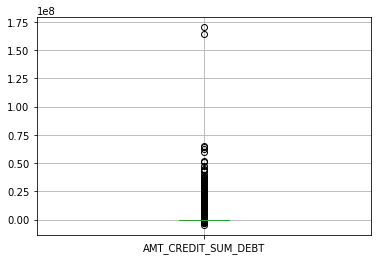

In [415]:
bureau.boxplot(column=['AMT_CREDIT_SUM_DEBT'])

In [420]:
bureau[bureau.SK_ID_CURR == 363076]

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
488411       363076       5089138        Active      currency 1        -1127   
488412       363076       5089139        Closed      currency 1         -622   
488413       363076       5089141        Active      currency 1        -1118   
488414       363076       5089142        Closed      currency 1        -1765   
488415       363076       5089143        Closed      currency 1        -2874   
488416       363076       5089144        Closed      currency 1        -1287   
488417       363076       5089145        Closed      currency 1        -1504   
488418       363076       5089146        Closed      currency 1        -2874   
488419       363076       5089147        Closed      currency 1        -1013   
488420       363076       5089148        Closed      currency 1         -222   
488421       363076       5089149        Closed      currency 1        -1697   
488422       363076       5089150        Closed      currency 1        -1000   
489961       363076       5090928        Active      currency 1        -1006   
489962       363076       5090929        Closed      currency 1        -1600   
489963       363076       5090930        Closed      currency 1        -1974   
489964       363076       5090931        Active      currency 1         -200   
489965       363076       5090932        Closed      currency 1        -2393   
1711059      363076       5089137        Closed      currency 1        -1013   
1711060      363076       5089140        Closed      currency 1        -1826   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
488411                    0               -675.0                NaN   
488412                    0               1212.0             -407.0   
488413                    0                725.0                NaN   
488414                    0              -1551.0            -1641.0   
488415                    0              -2538.0            -2811.0   
488416                    0               -922.0             -919.0   
488417                    0               -402.0             -561.0   
488418                    0              -2759.0            -2782.0   
488419                    0                755.0             -283.0   
488420                    0                511.0             -172.0   
488421                    0               -601.0            -1118.0   
488422                    0               -973.0             -973.0   
489961                    0               -675.0                NaN   
489962                    0               -504.0             -504.0   
489963                    0               -857.0             -817.0   
489964                    0               3453.0                NaN   
489965                    0              -1663.0            -1837.0   
1711059                   0                816.0             -556.0   
1711060                   0              -1192.0             -272.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
488411                      NaN                   0    1.640322e+08   
488412                      NaN                   0    9.000000e+04   
488413                      NaN                   0    3.825000e+05   
488414                      NaN                   0    3.777516e+04   
488415                      NaN                   0    1.975230e+04   
488416                      NaN                   0    1.350000e+08   
488417                      NaN                   0    1.350000e+05   
488418                      NaN                   0    4.373550e+04   
488419                      NaN                   0    0.000000e+00   
488420                      NaN                   0    2.794500e+05   
488421                      NaN                   0    2.475000e+05   
488422                      NaN                   0    4.482450e+04   
489961                      NaN                   0    1.701000e

In [411]:
previous_loan_amt_credit_sum_debt = bureau[bureau.CREDIT_ACTIVE == 'Active'].groupby('SK_ID_CURR', as_index=False)['AMT_CREDIT_SUM_DEBT'].sum().rename(columns = {'AMT_CREDIT_SUM_DEBT': 'previous_loan_amt_credit_sum_debt'})
previous_loan_amt_credit_sum_debt.head()

SK_ID_CURR  previous_loan_amt_credit_sum_debt
0      100001                           596686.5
1      100002                           245781.0
2      100003                                0.0
3      100005                           568408.5
4      100008                           240057.0

In [412]:
df = df.merge(previous_loan_amt_credit_sum_debt, on = 'SK_ID_CURR', how = 'left')
# Fill the missing values with 0 
df['previous_loan_amt_credit_sum_debt'] = df['previous_loan_amt_credit_sum_debt'].fillna(0)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100006       0         Cash loans           F            N   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0          135000.0    312682.5   
3               Y             0          121500.0    513000.0   
4               Y             0           99000.0    490495.5   

   AMT_GOODS_PRICE  AMT_ANNUITY_x NAME_INCOME_TYPE  \
0         351000.0        24700.5          Working   
1        1129500.0        35698.5    State servant   
2         297000.0        29686.5          Working   
3         513000.0        21865.5          Working   
4         454500.0        27517.5    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special        Civil marriage  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0       -9461           -637              1.0                     2   
1      -16765          -1188              2.0                     1   
2      -19005          -3039              2.0                     2   
3      -19932          -3038              1.0                     2   
4      -16941          -1588              2.0                     2   

   REGION_RATING_CLIENT_W_CITY  LENGTH_CREDIT  CREDIT_INCOME_PERCENT  \
0                            2      16.461104             200.788889   
1                            1      36.234085             479.075000   
2                            2      10.532818             231.616667   
3                            2      23.461618             422.222222   
4                            2      17.824857             495.450000   

   ANNUITY_INCOME_PERCENT  YEARS_BIRTH  YEARS_EMPLOYED  DAYS_EMPLOYED_PERCENT  \
0               12.197778           25        1.745205               6.732903   
1               13.221667           45        3.254795               7.086191   
2               21.990000           52        8.326027              15.990529   
3               17.996296           54        8.323288              15.241822   
4               27.795455           46        4.350685               9.373709   

   INCOME_PER_PERSON  previous_loan_counts  previous_loan_active_credit_sum  \
0           202500.0                   8.0                       481988.565   
1           135000.0                   4.0                       810000.000   
2            67500.0                   0.0                            0.000   
3           121500.0                   1.0                            0.000   
4            49500.0                   3.0                       267606.000   

   STATUS_0  STATUS_1  STATUS_2  STATUS_3  STATUS_4  STATUS_5  STATUS_BAD  \
0      45.0      27.0       0.0       0.0       0.0       0.0         0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0         0.0   

   credit_day_overdue_sum  credit_day_overdue_mean  \
0                     0.0                      0.0   
1               

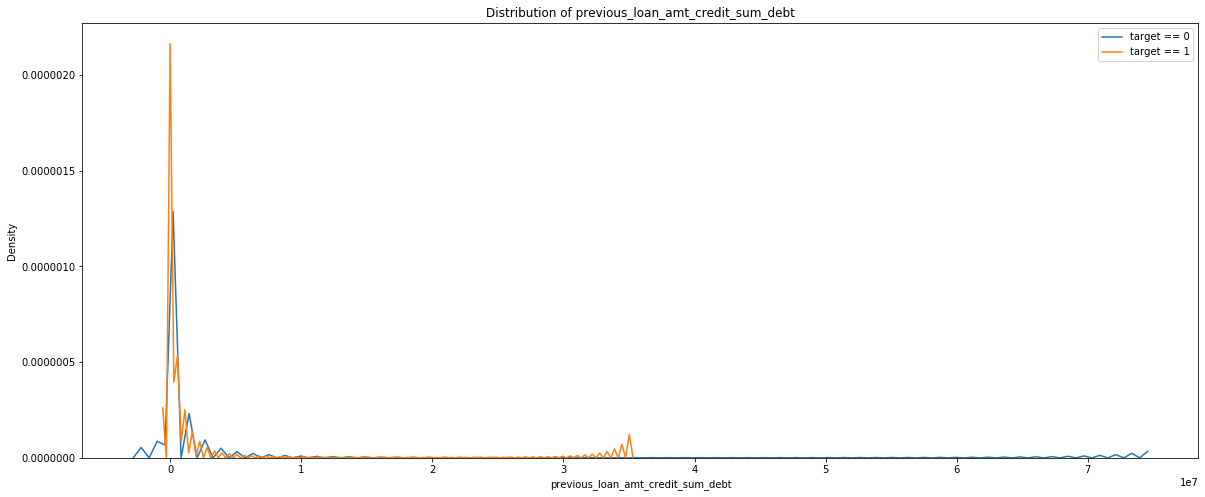

In [417]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) & (df['previous_loan_amt_credit_sum_debt'] < 3.344983e+08) , 'previous_loan_amt_credit_sum_debt'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1) & (df['previous_loan_amt_credit_sum_debt'] < 3.344983e+08), 'previous_loan_amt_credit_sum_debt'], label = 'target == 1')

# Labeling of plot
plt.xlabel('previous_loan_amt_credit_sum_debt'); plt.ylabel('Density'); plt.title('Distribution of previous_loan_amt_credit_sum_debt');

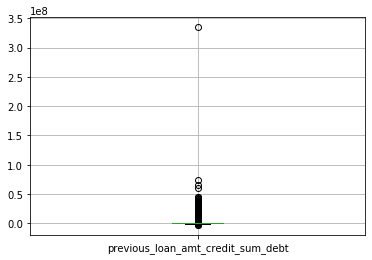

In [414]:
df.boxplot(column=['previous_loan_amt_credit_sum_debt'])

In [416]:
df.previous_loan_amt_credit_sum_debt.describe()

count    2.782190e+05
mean     5.408716e+05
std      1.501745e+06
min     -2.737765e+06
25%      0.000000e+00
50%      8.613900e+04
75%      5.307421e+05
max      3.344983e+08
Name: previous_loan_amt_credit_sum_debt, dtype: float64

In [419]:
df[df.previous_loan_amt_credit_sum_debt > 3e+08]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
205582      363076       0         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
205582               N             0          202500.0    945000.0   

        AMT_GOODS_PRICE  AMT_ANNUITY_x      NAME_INCOME_TYPE  \
205582         945000.0        40167.0  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS NAME_HOUSING_TYPE  \
205582  Secondary / secondary special     Civil marriage      With parents   

        DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
205582      -14228          -5330              2.0                     2   

        REGION_RATING_CLIENT_W_CITY  LENGTH_CREDIT  CREDIT_INCOME_PERCENT  \
205582                            2      23.526776             466.666667   

        ANNUITY_INCOME_PERCENT  YEARS_BIRTH  YEARS_EMPLOYED  \
205582               19.835556           38        14.60274   

        DAYS_EMPLOYED_PERCENT  INCOME_PER_PERSON  previous_loan_counts  \
205582              37.461344           101250.0                  19.0   

        previous_loan_active_credit_sum  STATUS_0  STATUS_1  STATUS_2  \
205582                      334739700.0     111.0       2.0       0.0   

        STATUS_3  STATUS_4  STATUS_5  STATUS_BAD  credit_day_overdue_sum  \
205582       0.0       0.0       0.0         0.0                     0.0   

        credit_day_overdue_mean  previous_loan_active_counts  AMT_ANNUITY_y  \
205582                      0.0                          4.0            0.0   

        AMT_ANNUITY  previous_loan_active_amt_annuity_sum  \
205582          0.0                                   0.0   

        hc_previous_loan_counts_refused  hc_previous_loan_counts  \
205582                              0.0                      5.0   

        hc_previous_loan_counts_approved  previous_loan_active_annuity_sum  \
205582                               3.0                               0.0   

        previous_loan_amt_credit_sum_debt  
205582                       3.344983e+08

## Creation de "previous_loan_active_annuity_sum" 

Cette variable a des valeurs manquante pourtant le montant mensuel des crédits à payer va influencer le defaut de paiement

In [408]:
previous_loan_active_annuity_sum = bureau[bureau.CREDIT_ACTIVE == 'Active'].groupby('SK_ID_CURR', as_index=False)['AMT_ANNUITY'].sum().rename(columns = {'AMT_ANNUITY': 'previous_loan_active_annuity_sum'})
previous_loan_active_annuity_sum.head()

SK_ID_CURR  previous_loan_active_annuity_sum
0      100001                           24817.5
1      100002                               0.0
2      100003                               0.0
3      100005                            4261.5
4      100008                               0.0

In [359]:
bureau[bureau.SK_ID_CURR == 375588]

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
987620      375588       5078559        Active      currency 1            0   
987621      375588       5078560        Active      currency 1         -724   
987622      375588       5078561        Closed      currency 1         -772   
987623      375588       5078562        Active      currency 1        -1165   

        CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
987620                   0                  NaN                NaN   
987621                   0                371.0                NaN   
987622                   0               -466.0             -465.0   
987623                   0                661.0                NaN   

        AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
987620                     NaN                   0             NaN   
987621                     0.0                   0       1125000.0   
987622                     0.0                   0        116955.0   
987623                     0.0                   0       2700000.0   

        AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
987620            1309572.0                   NaN                     0.0   
987621             406296.0                   0.0                     0.0   
987622                  0.0                   0.0                     0.0   
987623             990000.0                   0.0                     0.0   

                 CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
987620  Another type of loan                 -39          NaN  
987621       Consumer credit                  -3     39122.10  
987622       Consumer credit                -462          NaN  
987623       Consumer credit                  -3     61964.37

In [410]:
previous_loan_active_annuity_sum[previous_loan_active_annuity_sum.SK_ID_CURR == 375588]

SK_ID_CURR  previous_loan_active_annuity_sum
194671      375588                         101086.47

In [409]:
df = df.merge(previous_loan_active_annuity_sum, on = 'SK_ID_CURR', how = 'left')
# Fill the missing values with 0 
df['previous_loan_active_annuity_sum'] = df['previous_loan_active_annuity_sum'].fillna(0)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100006       0         Cash loans           F            N   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0          135000.0    312682.5   
3               Y             0          121500.0    513000.0   
4               Y             0           99000.0    490495.5   

   AMT_GOODS_PRICE  AMT_ANNUITY_x NAME_INCOME_TYPE  \
0         351000.0        24700.5          Working   
1        1129500.0        35698.5    State servant   
2         297000.0        29686.5          Working   
3         513000.0        21865.5          Working   
4         454500.0        27517.5    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special        Civil marriage  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0       -9461           -637              1.0                     2   
1      -16765          -1188              2.0                     1   
2      -19005          -3039              2.0                     2   
3      -19932          -3038              1.0                     2   
4      -16941          -1588              2.0                     2   

   REGION_RATING_CLIENT_W_CITY  LENGTH_CREDIT  CREDIT_INCOME_PERCENT  \
0                            2      16.461104             200.788889   
1                            1      36.234085             479.075000   
2                            2      10.532818             231.616667   
3                            2      23.461618             422.222222   
4                            2      17.824857             495.450000   

   ANNUITY_INCOME_PERCENT  YEARS_BIRTH  YEARS_EMPLOYED  DAYS_EMPLOYED_PERCENT  \
0               12.197778           25        1.745205               6.732903   
1               13.221667           45        3.254795               7.086191   
2               21.990000           52        8.326027              15.990529   
3               17.996296           54        8.323288              15.241822   
4               27.795455           46        4.350685               9.373709   

   INCOME_PER_PERSON  previous_loan_counts  previous_loan_active_credit_sum  \
0           202500.0                   8.0                       481988.565   
1           135000.0                   4.0                       810000.000   
2            67500.0                   0.0                            0.000   
3           121500.0                   1.0                            0.000   
4            49500.0                   3.0                       267606.000   

   STATUS_0  STATUS_1  STATUS_2  STATUS_3  STATUS_4  STATUS_5  STATUS_BAD  \
0      45.0      27.0       0.0       0.0       0.0       0.0         0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0         0.0   

   credit_day_overdue_sum  credit_day_overdue_mean  \
0                     0.0                      0.0   
1               

In [452]:
df['previous_loan_active_annuity_sum'] = df['previous_loan_active_annuity_sum'].fillna(0)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100006       0         Cash loans           F            N   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0          135000.0    312682.5   
3               Y             0          121500.0    513000.0   
4               Y             0           99000.0    490495.5   

   AMT_GOODS_PRICE  AMT_ANNUITY_x NAME_INCOME_TYPE  \
0         351000.0        24700.5          Working   
1        1129500.0        35698.5    State servant   
2         297000.0        29686.5          Working   
3         513000.0        21865.5          Working   
4         454500.0        27517.5    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special        Civil marriage  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0       -9461           -637              1.0                     2   
1      -16765          -1188              2.0                     1   
2      -19005          -3039              2.0                     2   
3      -19932          -3038              1.0                     2   
4      -16941          -1588              2.0                     2   

   REGION_RATING_CLIENT_W_CITY  LENGTH_CREDIT  CREDIT_INCOME_PERCENT  \
0                            2      16.461104             200.788889   
1                            1      36.234085             479.075000   
2                            2      10.532818             231.616667   
3                            2      23.461618             422.222222   
4                            2      17.824857             495.450000   

   ANNUITY_INCOME_PERCENT  YEARS_BIRTH  YEARS_EMPLOYED  DAYS_EMPLOYED_PERCENT  \
0               12.197778           25        1.745205               6.732903   
1               13.221667           45        3.254795               7.086191   
2               21.990000           52        8.326027              15.990529   
3               17.996296           54        8.323288              15.241822   
4               27.795455           46        4.350685               9.373709   

   INCOME_PER_PERSON  previous_loan_counts  previous_loan_active_credit_sum  \
0           202500.0                   8.0                       481988.565   
1           135000.0                   4.0                       810000.000   
2            67500.0                   0.0                            0.000   
3           121500.0                   1.0                            0.000   
4            49500.0                   3.0                       267606.000   

   STATUS_0  STATUS_1  STATUS_2  STATUS_3  STATUS_4  STATUS_5  STATUS_BAD  \
0      45.0      27.0       0.0       0.0       0.0       0.0         0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0         0.0   

   credit_day_overdue_sum  credit_day_overdue_mean  \
0                     0.0                      0.0   
1               

In [454]:
del df['previous_loan_active_amt_annuity_sum']

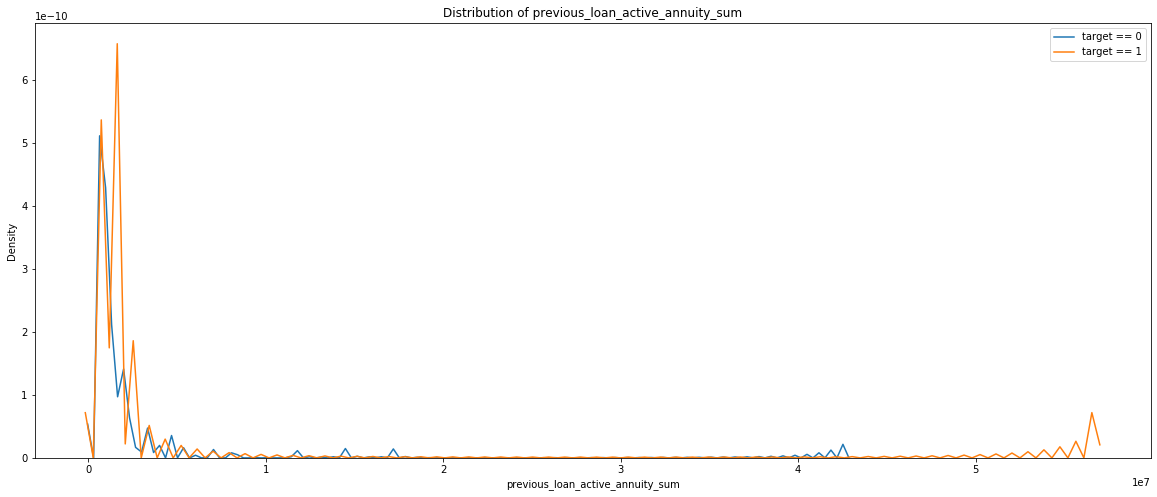

In [453]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'previous_loan_active_annuity_sum'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'previous_loan_active_annuity_sum'], label = 'target == 1')

# Labeling of plot
plt.xlabel('previous_loan_active_annuity_sum'); plt.ylabel('Density'); plt.title('Distribution of previous_loan_active_annuity_sum');

In [ ]:
AMT_CREDIT_SUM_OVERDUE

## Creation de "previous_loan_active_counts" et "previous_loan_counts"

Je compte les crédits précedent du clien recensé par le bureau de crédit, je compte l'ensemble et uniquement les actifs

In [165]:
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
previous_loan_counts.head()

SK_ID_CURR  previous_loan_counts
0      100001                     7
1      100002                     8
2      100003                     4
3      100004                     2
4      100005                     3

In [166]:
previous_loan_active_counts = bureau[bureau.CREDIT_ACTIVE == 'Active'].groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_active_counts'})
previous_loan_active_counts.head()

SK_ID_CURR  previous_loan_active_counts
0      100001                            3
1      100002                            2
2      100003                            1
3      100005                            2
4      100008                            1

In [194]:
previous_loan_active_counts_conso = bureau[(bureau.CREDIT_ACTIVE == 'Active') & (bureau.CREDIT_TYPE=='Consumer credit')].groupby('SK_ID_CURR', as_index=False)[
    'SK_ID_BUREAU'].count().rename(columns={'SK_ID_BUREAU': 'previous_loan_active_counts_conso'})
previous_loan_active_counts_conso.head()

SK_ID_CURR  previous_loan_active_counts_conso
0      100001                                  3
1      100002                                  1
2      100005                                  2
3      100008                                  1
4      100009                                  2

In [195]:
previous_loan_active_counts_cc = bureau[(bureau.CREDIT_ACTIVE == 'Active') & (bureau.CREDIT_TYPE=='Credit card')].groupby('SK_ID_CURR', as_index=False)[
    'SK_ID_BUREAU'].count().rename(columns={'SK_ID_BUREAU': 'previous_loan_active_counts_cc'})
previous_loan_active_counts_cc.head()

SK_ID_CURR  previous_loan_active_counts_cc
0      100002                               1
1      100003                               1
2      100009                               2
3      100016                               1
4      100019                               1

In [180]:
previous_loan_other_counts = bureau[bureau.CREDIT_ACTIVE != 'Active'].groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_other_counts'})
previous_loan_other_counts.head()

SK_ID_CURR  previous_loan_other_counts
0      100001                           4
1      100002                           6
2      100003                           3
3      100004                           2
4      100005                           1

In [337]:
previous_loan_active_credit_sum = bureau[bureau.CREDIT_ACTIVE == 'Active'].groupby('SK_ID_CURR', as_index=False)['AMT_CREDIT_SUM'].sum().rename(columns = {'AMT_CREDIT_SUM': 'previous_loan_active_credit_sum'})
previous_loan_active_credit_sum.head()

SK_ID_CURR  previous_loan_active_credit_sum
0      100001                       884025.000
1      100002                       481988.565
2      100003                       810000.000
3      100005                       598626.000
4      100008                       267606.000

In [183]:
previous_loan_active_credit_sum.shape

(251815, 2)

In [192]:
df.shape

(278219, 27)

In [167]:
bureau[bureau.CREDIT_ACTIVE == 'Closed']

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0            215354       5714462        Closed      currency 1         -497   
7            162297       5714469        Closed      currency 1        -1896   
8            162297       5714470        Closed      currency 1        -1146   
11           162297       5714473        Closed      currency 1        -2456   
14           238881       5714482        Closed      currency 1         -318   
...             ...           ...           ...             ...          ...   
1716422      375755       5057742        Closed      currency 1        -2648   
1716424      100044       5057754        Closed      currency 1        -2648   
1716425      100044       5057762        Closed      currency 1        -1809   
1716426      246829       5057770        Closed      currency 1        -1878   
1716427      246829       5057778        Closed      currency 1         -463   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                         0               -153.0             -153.0   
7                         0              -1684.0            -1710.0   
8                         0               -811.0             -840.0   
11                        0               -629.0             -825.0   
14                        0               -187.0             -187.0   
...                     ...                  ...                ...   
1716422                   0              31129.0             -189.0   
1716424                   0              -2433.0            -2493.0   
1716425                   0              -1628.0             -970.0   
1716426                   0              -1513.0            -1513.0   
1716427                   0                  NaN             -387.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                           NaN                   0        91323.00   
7                       14985.0                   0        76878.45   
8                           0.0                   0       103007.70   
11                          NaN                   0       675000.00   
14                          NaN                   0            0.00   
...                         ...                 ...             ...   
1716422                     NaN                   0       202500.00   
1716424                  5476.5                   0        38130.84   
1716425                     NaN                   0        15570.00   
1716426                     NaN                   0        36000.00   
1716427                     NaN                   0        22500.00   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                        0.0                   NaN                     0.0   
7                        0.0                   0.0                     0.0   
8                        0.0                   0.0                     0.0   
11                       0.0                   0.0                     0.0   
14                       0.0                   0.0                     0.0   
...                      ...                   ...                     ...   
1716422                  0.0                   NaN                     0.0   
1716424                  0.0                   0.0                     0.0   
1716425                  NaN                   NaN                     0.0   
1716426                  0.0                   0.0                     0.0   
1716427                  0.0                   NaN                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0        Consumer credit                -131          NaN  
7        Consumer credit               -1710          NaN  
8        Consumer credit                -840          NaN  
11       Consumer credit                -706          NaN  
14           Credit card                -185          NaN  
...                  ...                 ... 

In [201]:
del df['previous_loan_counts']

In [202]:
# Join to the training dataframe
df = df.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')
# Fill the missing values with 0 
df['previous_loan_counts'] = df['previous_loan_counts'].fillna(0)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100006       0         Cash loans           F            N   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0          135000.0    312682.5   
3               Y             0          121500.0    513000.0   
4               Y             0           99000.0    490495.5   

   AMT_GOODS_PRICE  AMT_ANNUITY NAME_INCOME_TYPE  \
0         351000.0      24700.5          Working   
1        1129500.0      35698.5    State servant   
2         297000.0      29686.5          Working   
3         513000.0      21865.5          Working   
4         454500.0      27517.5    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special        Civil marriage  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0       -9461           -637              1.0                     2   
1      -16765          -1188              2.0                     1   
2      -19005          -3039              2.0                     2   
3      -19932          -3038              1.0                     2   
4      -16941          -1588              2.0                     2   

   REGION_RATING_CLIENT_W_CITY  LENGTH_CREDIT  CREDIT_INCOME_PERCENT  \
0                            2      16.461104             200.788889   
1                            1      36.234085             479.075000   
2                            2      10.532818             231.616667   
3                            2      23.461618             422.222222   
4                            2      17.824857             495.450000   

   ANNUITY_INCOME_PERCENT  YEARS_BIRTH  YEARS_EMPLOYED  DAYS_EMPLOYED_PERCENT  \
0               12.197778           25        1.745205               6.732903   
1               13.221667           45        3.254795               7.086191   
2               21.990000           52        8.326027              15.990529   
3               17.996296           54        8.323288              15.241822   
4               27.795455           46        4.350685               9.373709   

   INCOME_PER_PERSON  previous_loan_counts  
0           202500.0                   8.0  
1           135000.0                   4.0  
2            67500.0                   0.0  
3           121500.0                   1.0  
4            49500.0                   3.0

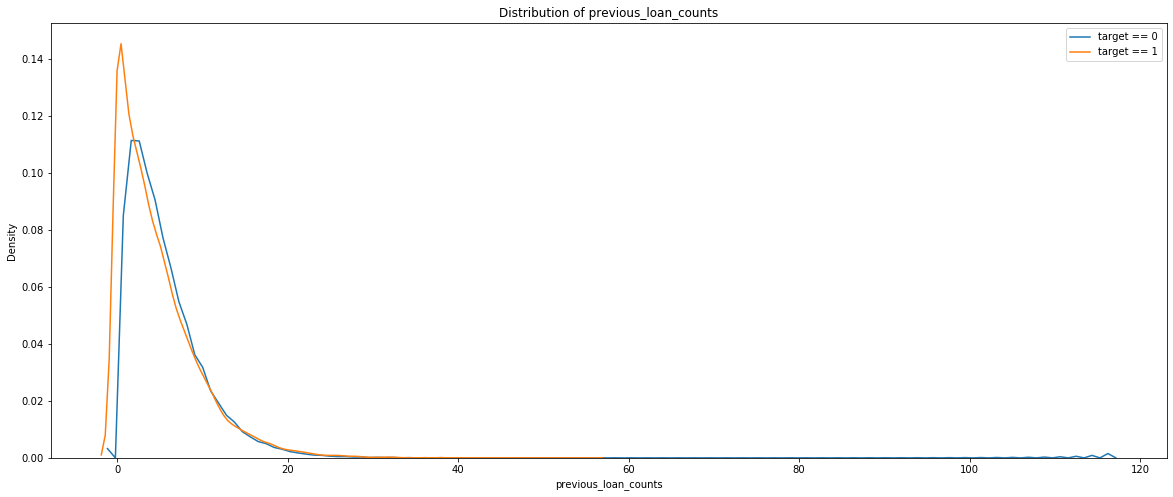

In [203]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'previous_loan_counts'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'previous_loan_counts'], label = 'target == 1')

# Labeling of plot
plt.xlabel('previous_loan_counts'); plt.ylabel('Density'); plt.title('Distribution of previous_loan_counts');

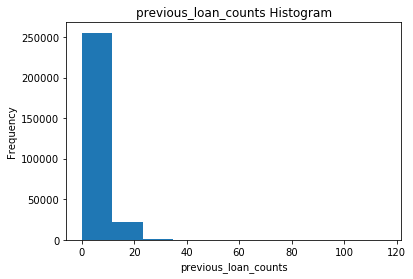

In [204]:
df['previous_loan_counts'].plot.hist(title = 'previous_loan_counts Histogram');
plt.xlabel('previous_loan_counts');

In [338]:
# Join to the training dataframe
df = df.merge(previous_loan_active_counts, on = 'SK_ID_CURR', how = 'left')
# Fill the missing values with 0 
df['previous_loan_active_counts'] = df['previous_loan_active_counts'].fillna(0)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100006       0         Cash loans           F            N   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0          135000.0    312682.5   
3               Y             0          121500.0    513000.0   
4               Y             0           99000.0    490495.5   

   AMT_GOODS_PRICE  AMT_ANNUITY NAME_INCOME_TYPE  \
0         351000.0      24700.5          Working   
1        1129500.0      35698.5    State servant   
2         297000.0      29686.5          Working   
3         513000.0      21865.5          Working   
4         454500.0      27517.5    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special        Civil marriage  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0       -9461           -637              1.0                     2   
1      -16765          -1188              2.0                     1   
2      -19005          -3039              2.0                     2   
3      -19932          -3038              1.0                     2   
4      -16941          -1588              2.0                     2   

   REGION_RATING_CLIENT_W_CITY  LENGTH_CREDIT  CREDIT_INCOME_PERCENT  \
0                            2      16.461104             200.788889   
1                            1      36.234085             479.075000   
2                            2      10.532818             231.616667   
3                            2      23.461618             422.222222   
4                            2      17.824857             495.450000   

   ANNUITY_INCOME_PERCENT  YEARS_BIRTH  YEARS_EMPLOYED  DAYS_EMPLOYED_PERCENT  \
0               12.197778           25        1.745205               6.732903   
1               13.221667           45        3.254795               7.086191   
2               21.990000           52        8.326027              15.990529   
3               17.996296           54        8.323288              15.241822   
4               27.795455           46        4.350685               9.373709   

   INCOME_PER_PERSON  previous_loan_counts  previous_loan_active_counts_x  \
0           202500.0                   8.0                            2.0   
1           135000.0                   4.0                            1.0   
2            67500.0                   0.0                            0.0   
3           121500.0                   1.0                            0.0   
4            49500.0                   3.0                            1.0   

   previous_loan_active_counts_y  previous_loan_active_credit_sum  STATUS_0  \
0                            2.0                       481988.565      45.0   
1                            1.0                       810000.000       0.0   
2                            NaN                            0.000       0.0   
3                            NaN                            0.000       0.0   
4                            1.0                       267606.000       0.0   

   STATUS_1  STATUS_2  STATUS_3  STATUS_4  STATUS_5  STATUS_BAD  \
0      27.0       0.0       0.0       0.0       0.0         0.0   
1 

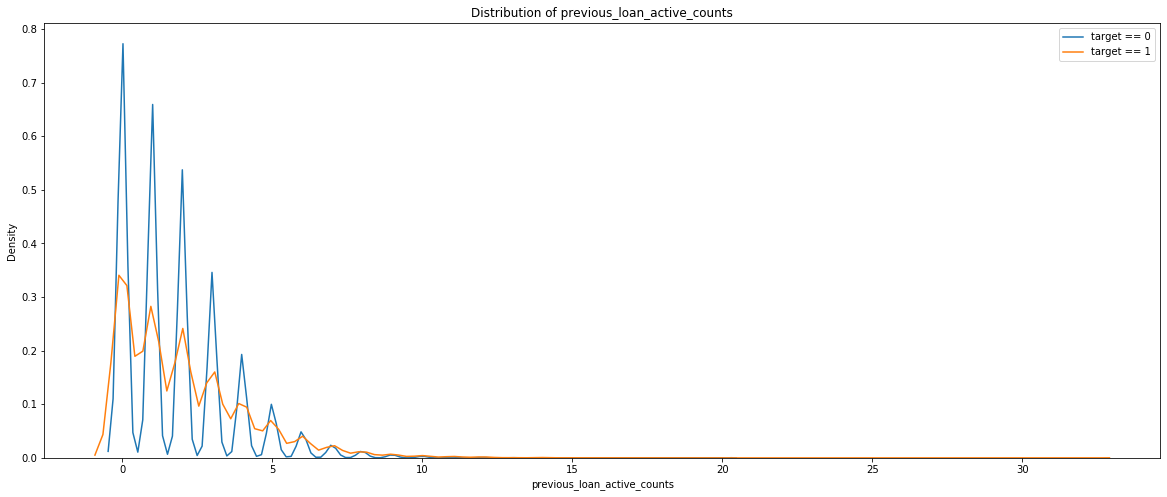

In [342]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'previous_loan_active_counts'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'previous_loan_active_counts'], label = 'target == 1')

# Labeling of plot
plt.xlabel('previous_loan_active_counts'); plt.ylabel('Density'); plt.title('Distribution of previous_loan_active_counts');

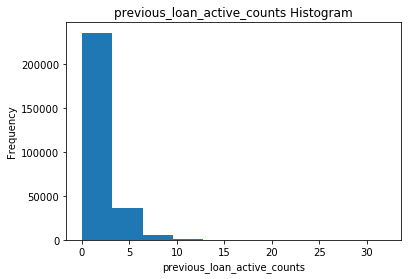

In [343]:
df['previous_loan_active_counts'].plot.hist(title = 'previous_loan_active_counts Histogram');
plt.xlabel('previous_loan_active_counts');

In [344]:
pd.crosstab(df['previous_loan_active_counts'],df['TARGET'])

TARGET                           0     1
previous_loan_active_counts             
0.0                          74924  6599
1.0                          61738  4884
2.0                          48638  4038
3.0                          31641  2952
4.0                          18265  1929
5.0                           9803  1211
6.0                           4944   669
7.0                           2489   415
8.0                           1314   217
9.0                            612   120
10.0                           323    71
11.0                           156    48
12.0                            76    33
13.0                            43     8
14.0                            12    11
15.0                            10     4
16.0                             5     0
17.0                             2     5
18.0                             0     2
19.0                             3     1
20.0                             1     0
22.0                             0     2
32.0                             0     1

<Figure size 1440x1440 with 0 Axes>

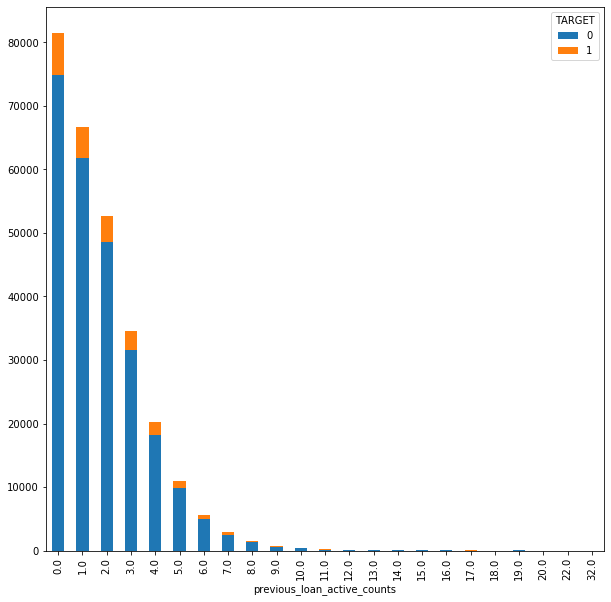

In [216]:
plt.figure(figsize = (20,20))
pd.crosstab(df['previous_loan_active_counts'],df['TARGET']).plot(kind="bar",stacked=True,figsize=(10,10))

<Figure size 1080x2520 with 0 Axes>

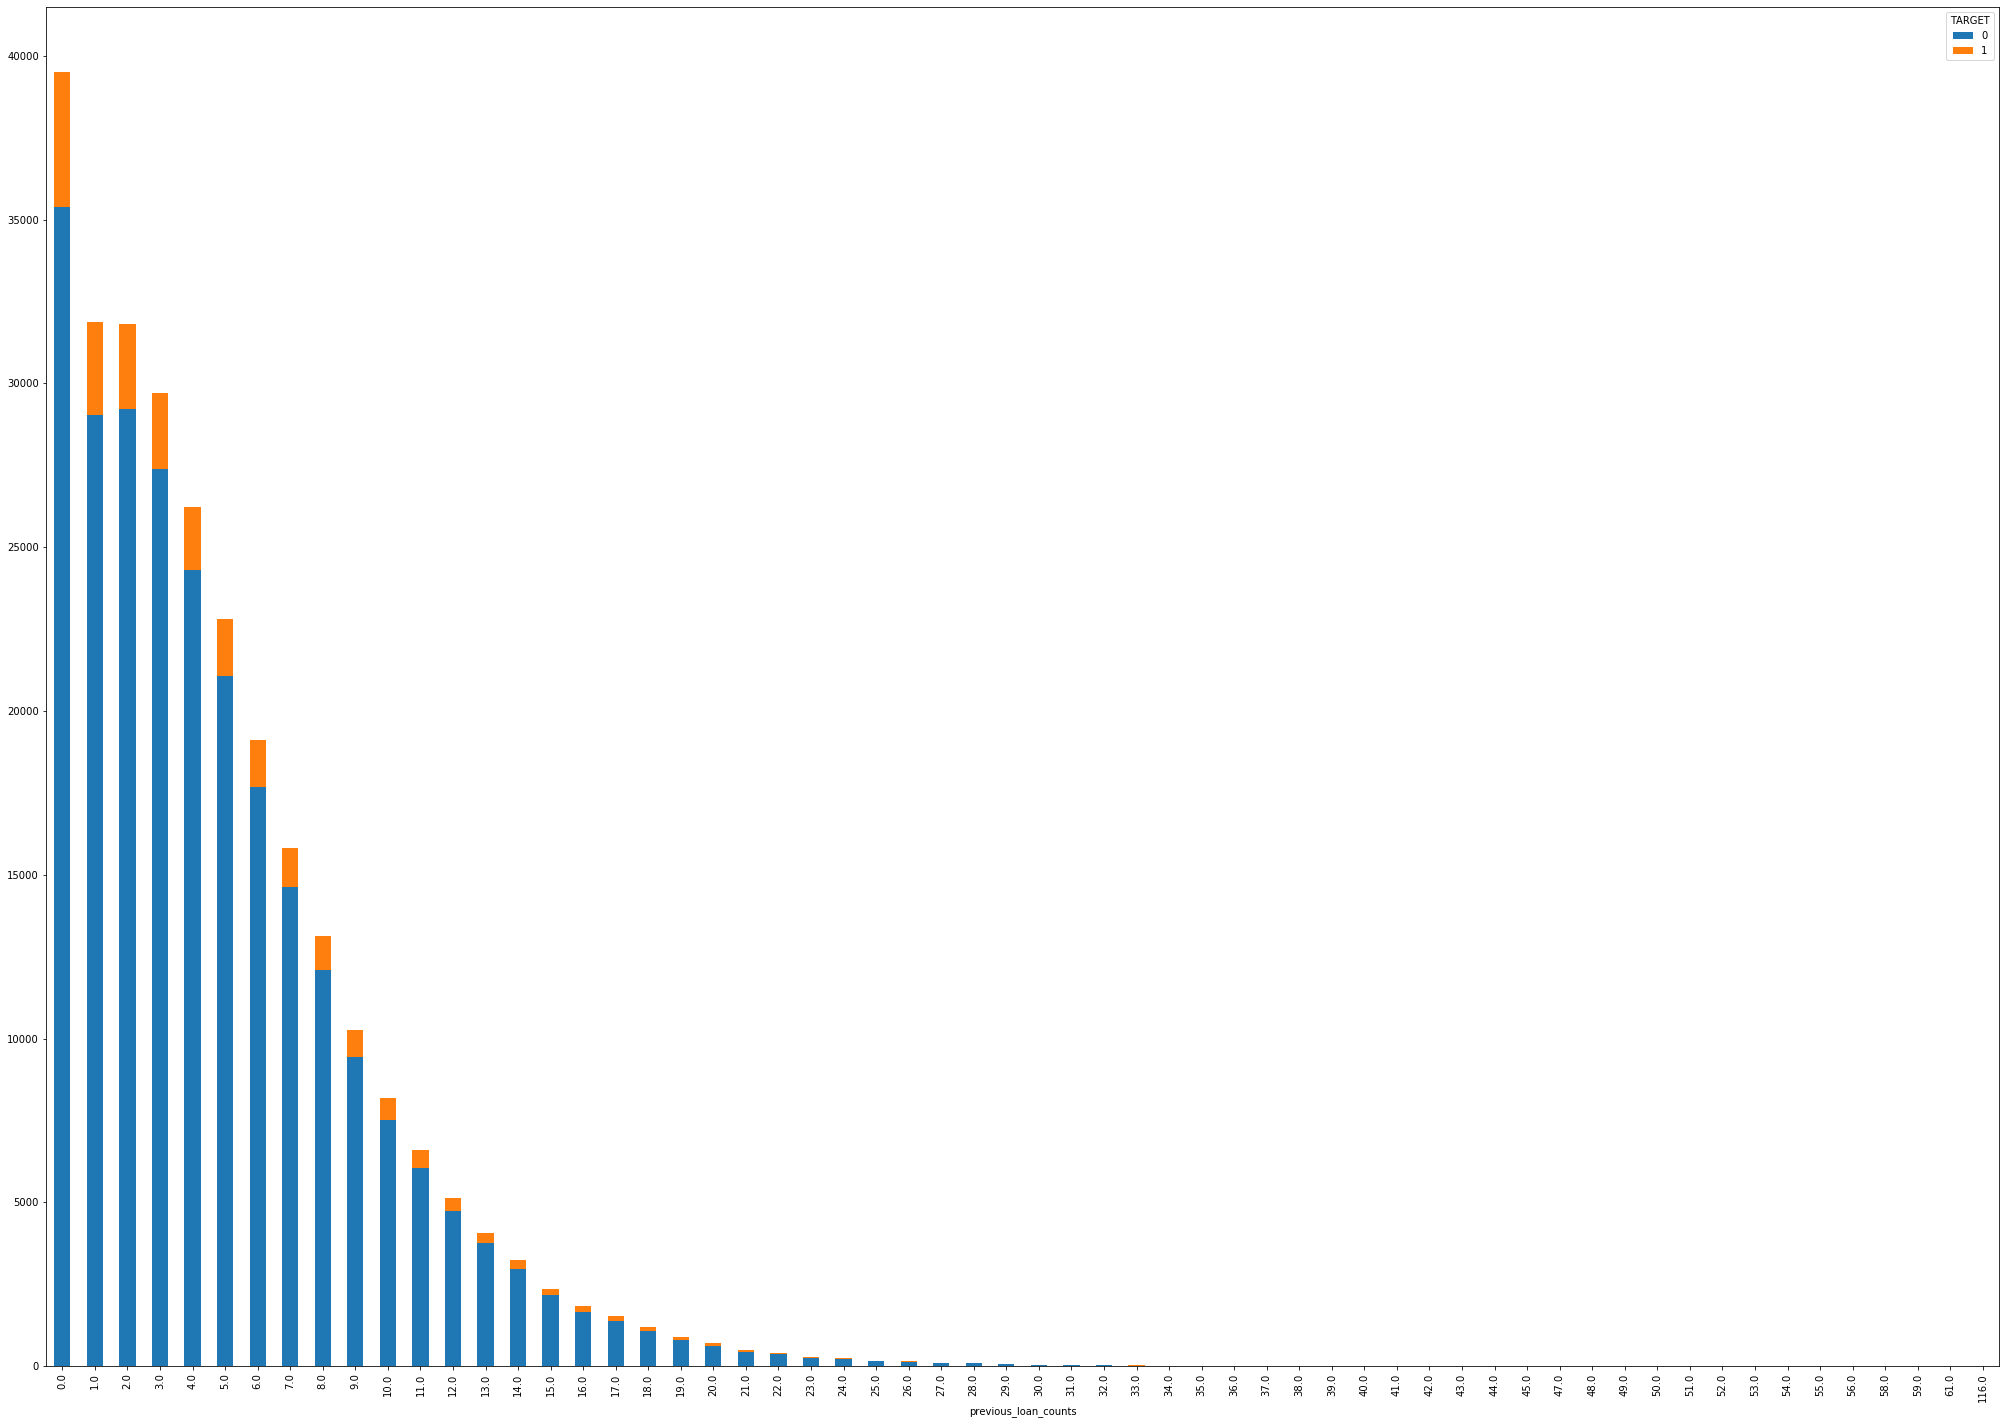

In [215]:
plt.figure(figsize = (15,35))
pd.crosstab(df['previous_loan_counts'],df['TARGET']).plot(kind="bar",stacked=True,figsize=(35,25))

In [218]:

# Join to the training dataframe
df = df.merge(previous_loan_active_credit_sum, on = 'SK_ID_CURR', how = 'left')
# Fill the missing values with previous_loan_active_credit_sum0 
df['previous_loan_active_credit_sum'] = df['previous_loan_active_credit_sum'].fillna(0)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100006       0         Cash loans           F            N   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0          135000.0    312682.5   
3               Y             0          121500.0    513000.0   
4               Y             0           99000.0    490495.5   

   AMT_GOODS_PRICE  AMT_ANNUITY NAME_INCOME_TYPE  \
0         351000.0      24700.5          Working   
1        1129500.0      35698.5    State servant   
2         297000.0      29686.5          Working   
3         513000.0      21865.5          Working   
4         454500.0      27517.5    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special        Civil marriage  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0       -9461           -637              1.0                     2   
1      -16765          -1188              2.0                     1   
2      -19005          -3039              2.0                     2   
3      -19932          -3038              1.0                     2   
4      -16941          -1588              2.0                     2   

   REGION_RATING_CLIENT_W_CITY  LENGTH_CREDIT  CREDIT_INCOME_PERCENT  \
0                            2      16.461104             200.788889   
1                            1      36.234085             479.075000   
2                            2      10.532818             231.616667   
3                            2      23.461618             422.222222   
4                            2      17.824857             495.450000   

   ANNUITY_INCOME_PERCENT  YEARS_BIRTH  YEARS_EMPLOYED  DAYS_EMPLOYED_PERCENT  \
0               12.197778           25        1.745205               6.732903   
1               13.221667           45        3.254795               7.086191   
2               21.990000           52        8.326027              15.990529   
3               17.996296           54        8.323288              15.241822   
4               27.795455           46        4.350685               9.373709   

   INCOME_PER_PERSON  previous_loan_counts  previous_loan_active_counts_x  \
0           202500.0                   8.0                            2.0   
1           135000.0                   4.0                            1.0   
2            67500.0                   0.0                            0.0   
3           121500.0                   1.0                            0.0   
4            49500.0                   3.0                            1.0   

   previous_loan_active_counts_y  previous_loan_active_credit_sum  
0                            2.0                       481988.565  
1                            1.0                       810000.000  
2                            NaN                            0.000  
3                            NaN                            0.000  
4                            1.0                       267606.000

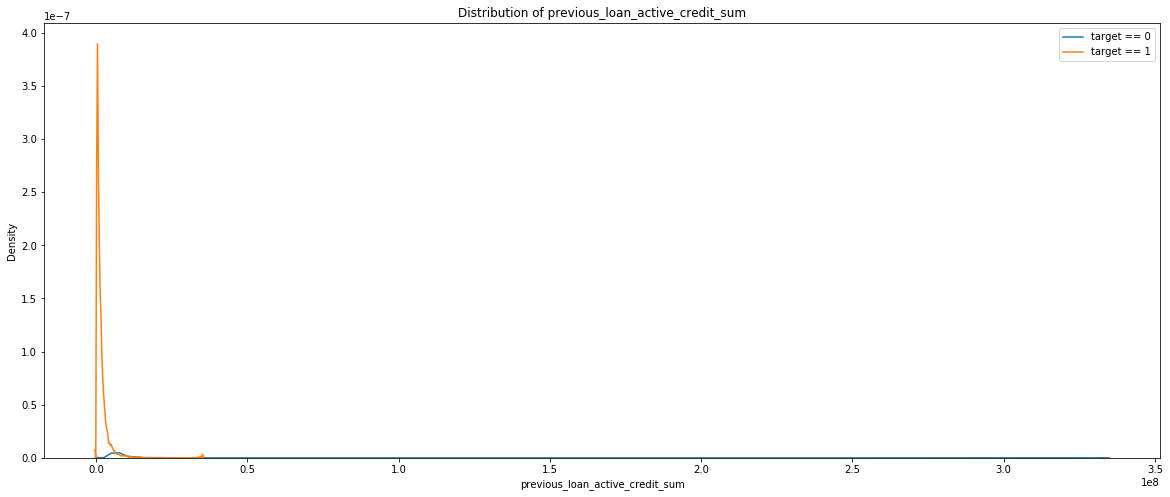

In [219]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'previous_loan_active_credit_sum'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'previous_loan_active_credit_sum'], label = 'target == 1')

# Labeling of plot
plt.xlabel('previous_loan_active_credit_sum'); plt.ylabel('Density'); plt.title('Distribution of previous_loan_active_credit_sum');

### Traitement "CREDIT_DAY_OVERDUE"

Nombre de jours de retard sur le crédit CB au moment de la demande du prêt correspondant dans notre échantillon

In [315]:
bureau.CREDIT_DAY_OVERDUE

0          0
1          0
2          0
3          0
4          0
          ..
1716423    0
1716424    0
1716425    0
1716426    0
1716427    0
Name: CREDIT_DAY_OVERDUE, Length: 1716428, dtype: int64

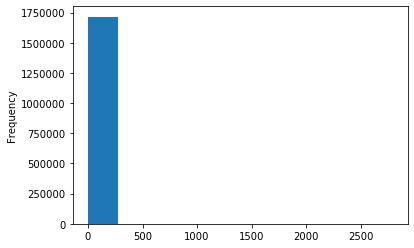

In [326]:
bureau['CREDIT_DAY_OVERDUE'].plot.hist();

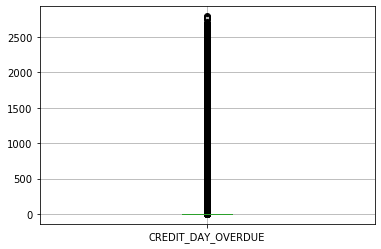

In [327]:
bureau.boxplot(column=['CREDIT_DAY_OVERDUE'])

In [329]:
bureau.CREDIT_DAY_OVERDUE.describe()

count    1.716428e+06
mean     8.181666e-01
std      3.654443e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.792000e+03
Name: CREDIT_DAY_OVERDUE, dtype: float64

In [316]:
bureau

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0            215354       5714462        Closed      currency 1         -497   
1            215354       5714463        Active      currency 1         -208   
2            215354       5714464        Active      currency 1         -203   
3            215354       5714465        Active      currency 1         -203   
4            215354       5714466        Active      currency 1         -629   
...             ...           ...           ...             ...          ...   
1716423      259355       5057750        Active      currency 1          -44   
1716424      100044       5057754        Closed      currency 1        -2648   
1716425      100044       5057762        Closed      currency 1        -1809   
1716426      246829       5057770        Closed      currency 1        -1878   
1716427      246829       5057778        Closed      currency 1         -463   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                         0               -153.0             -153.0   
1                         0               1075.0                NaN   
2                         0                528.0                NaN   
3                         0                  NaN                NaN   
4                         0               1197.0                NaN   
...                     ...                  ...                ...   
1716423                   0                -30.0                NaN   
1716424                   0              -2433.0            -2493.0   
1716425                   0              -1628.0             -970.0   
1716426                   0              -1513.0            -1513.0   
1716427                   0                  NaN             -387.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                           NaN                   0        91323.00   
1                           NaN                   0       225000.00   
2                           NaN                   0       464323.50   
3                           NaN                   0        90000.00   
4                       77674.5                   0      2700000.00   
...                         ...                 ...             ...   
1716423                     0.0                   0        11250.00   
1716424                  5476.5                   0        38130.84   
1716425                     NaN                   0        15570.00   
1716426                     NaN                   0        36000.00   
1716427                     NaN                   0        22500.00   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                        0.0                   NaN                     0.0   
1                   171342.0                   NaN                     0.0   
2                        NaN                   NaN                     0.0   
3                        NaN                   NaN                     0.0   
4                        NaN                   NaN                     0.0   
...                      ...                   ...                     ...   
1716423              11250.0                   0.0                     0.0   
1716424                  0.0                   0.0                     0.0   
1716425                  NaN                   NaN                     0.0   
1716426                  0.0                   0.0                     0.0   
1716427                  0.0                   NaN                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0        Consumer credit                -131          NaN  
1            Credit card                 -20          NaN  
2        Consumer credit                 -16          NaN  
3            Credit card                 -16          NaN  
4        Consumer credit                 -21          NaN  
...                  ...                 ... 

## Creation des variables "credit_day_overdue_mean" et "credit_day_overdue_sum"

"credit_day_overdue_sum" : Somme des Nombre de jours de retard sur les crédit CB au moment de la demande des prêt   
"credit_day_overdue_mean" : Moyenne des Nombre de jours de retard sur l'ensemble des crédit CB au moment de la demande des prêt     

In [330]:
previous_loan_credit_days_mean = bureau.groupby('SK_ID_CURR', as_index=False)[
    'CREDIT_DAY_OVERDUE'].mean().rename(columns={'CREDIT_DAY_OVERDUE': 'credit_day_overdue_mean'})
previous_loan_credit_days_mean.head()

SK_ID_CURR  credit_day_overdue_mean
0      100001                      0.0
1      100002                      0.0
2      100003                      0.0
3      100004                      0.0
4      100005                      0.0

In [318]:
previous_loan_credit_days_counts = bureau.groupby('SK_ID_CURR', as_index=False)[
    'CREDIT_DAY_OVERDUE'].sum().rename(columns={'CREDIT_DAY_OVERDUE': 'credit_day_overdue_sum'})
previous_loan_credit_days_counts.head()

SK_ID_CURR  credit_day_overdue_sum
0      100001                       0
1      100002                       0
2      100003                       0
3      100004                       0
4      100005                       0

In [ ]:
previous_loan_credit_days_mean = bureau.groupby('SK_ID_CURR', as_index=False)[
    'CREDIT_DAY_OVERDUE'].sum().rename(columns={'CREDIT_DAY_OVERDUE': 'credit_day_overdue_sum'})
previous_loan_credit_days_counts.head()

In [331]:
# Join to the training dataframe
df = df.merge(previous_loan_credit_days_mean, on = 'SK_ID_CURR', how = 'left')
# Fill the missing values with 0 
df['credit_day_overdue_mean'] = df['credit_day_overdue_mean'].fillna(0)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100006       0         Cash loans           F            N   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0          135000.0    312682.5   
3               Y             0          121500.0    513000.0   
4               Y             0           99000.0    490495.5   

   AMT_GOODS_PRICE  AMT_ANNUITY NAME_INCOME_TYPE  \
0         351000.0      24700.5          Working   
1        1129500.0      35698.5    State servant   
2         297000.0      29686.5          Working   
3         513000.0      21865.5          Working   
4         454500.0      27517.5    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special        Civil marriage  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0       -9461           -637              1.0                     2   
1      -16765          -1188              2.0                     1   
2      -19005          -3039              2.0                     2   
3      -19932          -3038              1.0                     2   
4      -16941          -1588              2.0                     2   

   REGION_RATING_CLIENT_W_CITY  LENGTH_CREDIT  CREDIT_INCOME_PERCENT  \
0                            2      16.461104             200.788889   
1                            1      36.234085             479.075000   
2                            2      10.532818             231.616667   
3                            2      23.461618             422.222222   
4                            2      17.824857             495.450000   

   ANNUITY_INCOME_PERCENT  YEARS_BIRTH  YEARS_EMPLOYED  DAYS_EMPLOYED_PERCENT  \
0               12.197778           25        1.745205               6.732903   
1               13.221667           45        3.254795               7.086191   
2               21.990000           52        8.326027              15.990529   
3               17.996296           54        8.323288              15.241822   
4               27.795455           46        4.350685               9.373709   

   INCOME_PER_PERSON  previous_loan_counts  previous_loan_active_counts_x  \
0           202500.0                   8.0                            2.0   
1           135000.0                   4.0                            1.0   
2            67500.0                   0.0                            0.0   
3           121500.0                   1.0                            0.0   
4            49500.0                   3.0                            1.0   

   previous_loan_active_counts_y  previous_loan_active_credit_sum  STATUS_0  \
0                            2.0                       481988.565      45.0   
1                            1.0                       810000.000       0.0   
2                            NaN                            0.000       0.0   
3                            NaN                            0.000       0.0   
4                            1.0                       267606.000       0.0   

   STATUS_1  STATUS_2  STATUS_3  STATUS_4  STATUS_5  STATUS_BAD  \
0      27.0       0.0       0.0       0.0       0.0         0.0   
1 

In [319]:
# Join to the training dataframe
df = df.merge(previous_loan_credit_days_counts, on = 'SK_ID_CURR', how = 'left')
# Fill the missing values with 0 
df['credit_day_overdue_sum'] = df['credit_day_overdue_sum'].fillna(0)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100006       0         Cash loans           F            N   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0          135000.0    312682.5   
3               Y             0          121500.0    513000.0   
4               Y             0           99000.0    490495.5   

   AMT_GOODS_PRICE  AMT_ANNUITY NAME_INCOME_TYPE  \
0         351000.0      24700.5          Working   
1        1129500.0      35698.5    State servant   
2         297000.0      29686.5          Working   
3         513000.0      21865.5          Working   
4         454500.0      27517.5    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special        Civil marriage  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0       -9461           -637              1.0                     2   
1      -16765          -1188              2.0                     1   
2      -19005          -3039              2.0                     2   
3      -19932          -3038              1.0                     2   
4      -16941          -1588              2.0                     2   

   REGION_RATING_CLIENT_W_CITY  LENGTH_CREDIT  CREDIT_INCOME_PERCENT  \
0                            2      16.461104             200.788889   
1                            1      36.234085             479.075000   
2                            2      10.532818             231.616667   
3                            2      23.461618             422.222222   
4                            2      17.824857             495.450000   

   ANNUITY_INCOME_PERCENT  YEARS_BIRTH  YEARS_EMPLOYED  DAYS_EMPLOYED_PERCENT  \
0               12.197778           25        1.745205               6.732903   
1               13.221667           45        3.254795               7.086191   
2               21.990000           52        8.326027              15.990529   
3               17.996296           54        8.323288              15.241822   
4               27.795455           46        4.350685               9.373709   

   INCOME_PER_PERSON  previous_loan_counts  previous_loan_active_counts_x  \
0           202500.0                   8.0                            2.0   
1           135000.0                   4.0                            1.0   
2            67500.0                   0.0                            0.0   
3           121500.0                   1.0                            0.0   
4            49500.0                   3.0                            1.0   

   previous_loan_active_counts_y  previous_loan_active_credit_sum  STATUS_0  \
0                            2.0                       481988.565      45.0   
1                            1.0                       810000.000       0.0   
2                            NaN                            0.000       0.0   
3                            NaN                            0.000       0.0   
4                            1.0                       267606.000       0.0   

   STATUS_1  STATUS_2  STATUS_3  STATUS_4  STATUS_5  STATUS_BAD  \
0      27.0       0.0       0.0       0.0       0.0         0.0   
1 

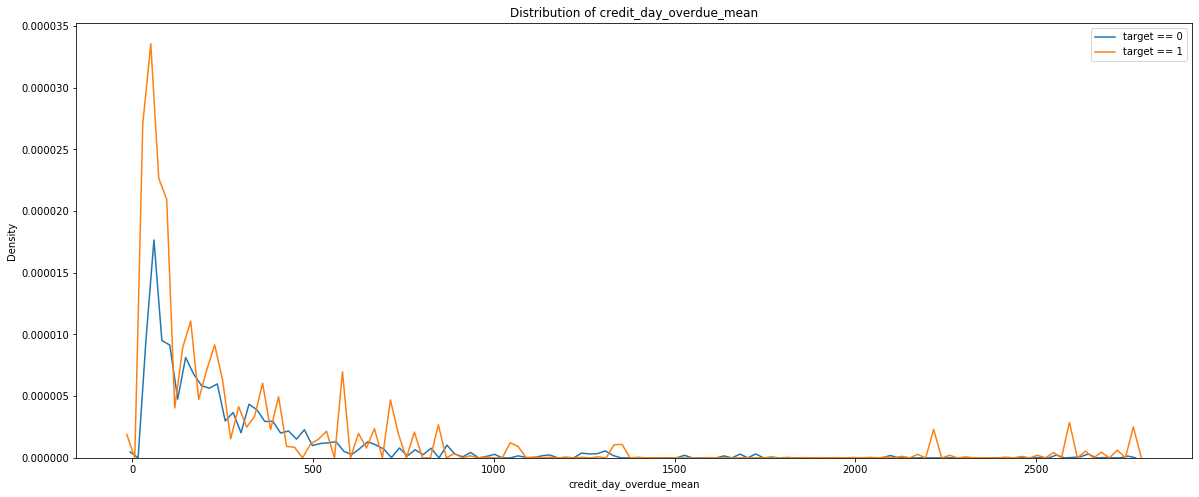

In [332]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'credit_day_overdue_mean'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'credit_day_overdue_mean'], label = 'target == 1')

# Labeling of plot
plt.xlabel('credit_day_overdue_mean'); plt.ylabel('Density'); plt.title('Distribution of credit_day_overdue_mean');

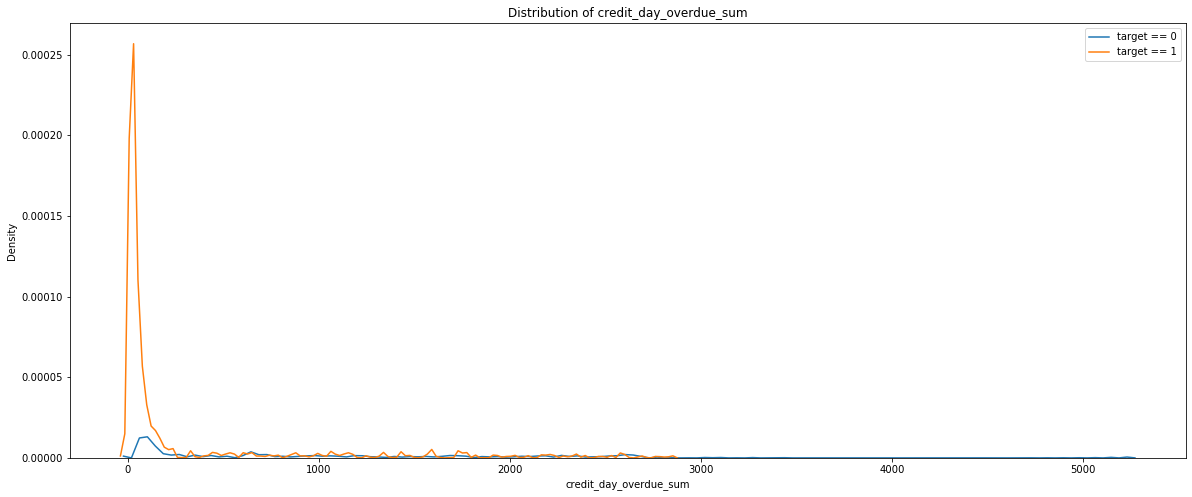

In [320]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'credit_day_overdue_sum'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'credit_day_overdue_sum'], label = 'target == 1')

# Labeling of plot
plt.xlabel('credit_day_overdue_sum'); plt.ylabel('Density'); plt.title('Distribution of credit_day_overdue_sum');

# Aggregation des données de la table bureau_balance

In [130]:
bureau_balance = pd.read_csv('D:/openclassrooms/PROJET 7/DATA/bureau_balance.csv')
bureau_balance.head(20)

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0        5715448               0      C
1        5715448              -1      C
2        5715448              -2      C
3        5715448              -3      C
4        5715448              -4      C
5        5715448              -5      C
6        5715448              -6      C
7        5715448              -7      C
8        5715448              -8      C
9        5715448              -9      0
10       5715448             -10      0
11       5715448             -11      X
12       5715448             -12      X
13       5715448             -13      X
14       5715448             -14      0
15       5715448             -15      0
16       5715448             -16      0
17       5715448             -17      0
18       5715448             -18      0
19       5715448             -19      0

In [278]:
bureau_balance.shape

(27299925, 3)

In [222]:
bureau_balance.MONTHS_BALANCE.unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60, -61, -62, -63, -64,
       -65, -66, -67, -68, -69, -70, -71, -72, -73, -74, -75, -76, -77,
       -78, -79, -80, -81, -82, -83, -84, -85, -86, -87, -88, -89, -90,
       -91, -92, -93, -94, -95, -96], dtype=int64)

## Traitement du DPD avec "STATUS"

Statut du prêt du bureau de crédit au cours du mois (actif, fermé, DPD0-30,… [C signifie fermé, X signifie statut inconnu, 0 signifie pas de DPD, 1 signifie que le maximum a été effectué pendant le mois entre 1-30, 2 signifie DPD 31-60 ,… 5 signifie DPD 120+ ou vendu ou radié])  

DPD (Days Past Due)  
les jours de retard ou DPD sont l'une de ces mesures importantes de l'octroie de crédit 

In [223]:
bureau_balance.STATUS.unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

In [226]:
bureau_balance.STATUS.value_counts()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

Les statuts 3, 4 et 5 correspondent à des mensualités avec des retards de plus de 60 jours.  
Calculons le nombre de retard par emprunt référencé au bureau de crédit

In [279]:
bb= pd.get_dummies(bureau_balance.STATUS,prefix='STATUS')

In [280]:
bureau_balance = pd.concat([bureau_balance, bb], axis=1)

In [281]:
bureau_balance

SK_ID_BUREAU  MONTHS_BALANCE STATUS  STATUS_0  STATUS_1  STATUS_2  \
0              5715448               0      C         0         0         0   
1              5715448              -1      C         0         0         0   
2              5715448              -2      C         0         0         0   
3              5715448              -3      C         0         0         0   
4              5715448              -4      C         0         0         0   
...                ...             ...    ...       ...       ...       ...   
27299920       5041336             -47      X         0         0         0   
27299921       5041336             -48      X         0         0         0   
27299922       5041336             -49      X         0         0         0   
27299923       5041336             -50      X         0         0         0   
27299924       5041336             -51      X         0         0         0   

          STATUS_3  STATUS_4  STATUS_5  STATUS_C  STATUS_X  
0                0         0         0         1         0  
1                0         0         0         1         0  
2                0         0         0         1         0  
3                0         0         0         1         0  
4                0         0         0         1         0  
...            ...       ...       ...       ...       ...  
27299920         0         0         0         0         1  
27299921         0         0         0         0         1  
27299922         0         0         0         0         1  
27299923         0         0         0         0         1  
27299924         0         0         0         0         1  

[27299925 rows x 11 columns]

'STATUS_BAD' compte les mensualités avec un statut DPD de 3,4 et 5

In [282]:
bureau_balance['STATUS_BAD'] = bureau_balance.STATUS_3 + bureau_balance.STATUS_4 + bureau_balance.STATUS_5

In [131]:
test = bureau_balance[bureau_balance.MONTHS_BALANCE > -12]

In [134]:
bb= pd.get_dummies(test.STATUS,prefix='STATUS')
test = pd.concat([test, bb], axis=1)

In [135]:
test['STATUS_BAD'] = test.STATUS_3 + test.STATUS_4 + test.STATUS_5

In [283]:
bureau_balance

SK_ID_BUREAU  MONTHS_BALANCE STATUS  STATUS_0  STATUS_1  STATUS_2  \
0              5715448               0      C         0         0         0   
1              5715448              -1      C         0         0         0   
2              5715448              -2      C         0         0         0   
3              5715448              -3      C         0         0         0   
4              5715448              -4      C         0         0         0   
...                ...             ...    ...       ...       ...       ...   
27299920       5041336             -47      X         0         0         0   
27299921       5041336             -48      X         0         0         0   
27299922       5041336             -49      X         0         0         0   
27299923       5041336             -50      X         0         0         0   
27299924       5041336             -51      X         0         0         0   

          STATUS_3  STATUS_4  STATUS_5  STATUS_C  STATUS_X  STATUS_BAD  
0                0         0         0         1         0           0  
1                0         0         0         1         0           0  
2                0         0         0         1         0           0  
3                0         0         0         1         0           0  
4                0         0         0         1         0           0  
...            ...       ...       ...       ...       ...         ...  
27299920         0         0         0         0         1           0  
27299921         0         0         0         0         1           0  
27299922         0         0         0         0         1           0  
27299923         0         0         0         0         1           0  
27299924         0         0         0         0         1           0  

[27299925 rows x 12 columns]

In [290]:
len(bureau_balance.SK_ID_BUREAU.unique())

817395

Calculons la sommes et la moyenne de status DDP référencés par le bureau de crédit pour l'ensemble des crédits de l'emprunteur

In [284]:
bureau_balance.columns

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS', 'STATUS_0', 'STATUS_1',
       'STATUS_2', 'STATUS_3', 'STATUS_4', 'STATUS_5', 'STATUS_C', 'STATUS_X',
       'STATUS_BAD'],
      dtype='object')

In [136]:
col=['SK_ID_BUREAU','STATUS_0', 'STATUS_1',
       'STATUS_2', 'STATUS_3', 'STATUS_4', 'STATUS_5',
       'STATUS_BAD']

In [286]:
bureau_balance_bad = bureau_balance[col].groupby('SK_ID_BUREAU').agg(['sum'])

In [ ]:
test = 

In [291]:
bureau_balance_bad

STATUS_0 STATUS_1 STATUS_2 STATUS_3 STATUS_4 STATUS_5 STATUS_BAD
                  sum      sum      sum      sum      sum      sum        sum
SK_ID_BUREAU                                                                 
5001709             0        0        0        0        0        0          0
5001710             5        0        0        0        0        0          0
5001711             3        0        0        0        0        0          0
5001712            10        0        0        0        0        0          0
5001713             0        0        0        0        0        0          0
...               ...      ...      ...      ...      ...      ...        ...
6842884             9        0        0        0        0        0          0
6842885            12        0        0        0        0       12         12
6842886             8        0        0        0        0        0          0
6842887             6        0        0        0        0        0          0
6842888             9        1        0        0        0        0          0

[817395 rows x 7 columns]

In [292]:
bureau_balance_bad.columns = ['STATUS_0', 'STATUS_1',
                              'STATUS_2', 'STATUS_3', 'STATUS_4', 'STATUS_5', 'STATUS_BAD']

In [293]:
bureau_balance_bad

STATUS_0  STATUS_1  STATUS_2  STATUS_3  STATUS_4  STATUS_5  \
SK_ID_BUREAU                                                               
5001709              0         0         0         0         0         0   
5001710              5         0         0         0         0         0   
5001711              3         0         0         0         0         0   
5001712             10         0         0         0         0         0   
5001713              0         0         0         0         0         0   
...                ...       ...       ...       ...       ...       ...   
6842884              9         0         0         0         0         0   
6842885             12         0         0         0         0        12   
6842886              8         0         0         0         0         0   
6842887              6         0         0         0         0         0   
6842888              9         1         0         0         0         0   

              STATUS_BAD  
SK_ID_BUREAU              
5001709                0  
5001710                0  
5001711                0  
5001712                0  
5001713                0  
...                  ...  
6842884                0  
6842885               12  
6842886                0  
6842887                0  
6842888                0  

[817395 rows x 7 columns]

In [272]:
bureau.shape

(1716428, 17)

## Creation des variables "STATUS_5" et "STATUS_BAD" 

"STATUS_5" : sommes des mensualités de tous les crédits du cllient ayant un status DPD égal à 5, 5 signifie DPD 120+ ou vendu ou radié  
"STATUS_BAD": idem avec en plus le DDP 3 et 4  donc DPD >60jours

In [294]:
bureau_bad = bureau[['SK_ID_BUREAU', 'SK_ID_CURR']].merge(bureau_balance_bad, on = 'SK_ID_BUREAU', how = 'left')

In [295]:
bureau_bad.shape

(1716428, 9)

In [276]:
bureau_bad[bureau_bad.STATUS_BAD>0]

SK_ID_BUREAU  SK_ID_CURR  STATUS_0  STATUS_1  STATUS_2  STATUS_3  \
957           5715670      240790       1.0       4.0       2.0       1.0   
960           5715673      240790       1.0       4.0       2.0       1.0   
3268          5718491      417382      13.0       2.0       2.0       1.0   
3376          5718616      397119       7.0       1.0       1.0       2.0   
3442          5718691      163609       8.0       2.0       1.0       1.0   
...               ...         ...       ...       ...       ...       ...   
1715420       5050828      426572       1.0       0.0       0.0       0.0   
1715421       5050845      139356      23.0       3.0       6.0       2.0   
1715437       5052658      227004       4.0       4.0       3.0       1.0   
1715493       5054524      370668       9.0       0.0       0.0       0.0   
1716265       5053417      410949       0.0       0.0       0.0       0.0   

         STATUS_4  STATUS_5  STATUS_BAD  
957           1.0      22.0        24.0  
960           1.0      22.0        24.0  
3268          1.0      10.0        12.0  
3376          0.0       0.0         2.0  
3442          0.0       0.0         1.0  
...           ...       ...         ...  
1715420       0.0      74.0        74.0  
1715421       3.0       2.0         7.0  
1715437       2.0      20.0        23.0  
1715493       0.0       1.0         1.0  
1716265       0.0       1.0         1.0  

[7300 rows x 9 columns]

In [300]:
bureau_bad.columns

Index(['SK_ID_BUREAU', 'SK_ID_CURR', 'STATUS_0', 'STATUS_1', 'STATUS_2',
       'STATUS_3', 'STATUS_4', 'STATUS_5', 'STATUS_BAD'],
      dtype='object')

In [301]:
col = ['SK_ID_CURR', 'STATUS_0', 'STATUS_1', 'STATUS_2',
       'STATUS_3', 'STATUS_4', 'STATUS_5', 'STATUS_BAD']

In [302]:
bureau_balance_by_client = bureau_bad[col].groupby('SK_ID_CURR').agg(['sum'])
bureau_balance_by_client.columns = ['STATUS_0', 'STATUS_1',
                              'STATUS_2', 'STATUS_3', 'STATUS_4', 'STATUS_5', 'STATUS_BAD']


In [304]:
bureau_balance_by_client.reset_index()

SK_ID_CURR  STATUS_0  STATUS_1  STATUS_2  STATUS_3  STATUS_4  \
0           100001      31.0       1.0       0.0       0.0       0.0   
1           100002      45.0      27.0       0.0       0.0       0.0   
2           100003       0.0       0.0       0.0       0.0       0.0   
3           100004       0.0       0.0       0.0       0.0       0.0   
4           100005      14.0       0.0       0.0       0.0       0.0   
...            ...       ...       ...       ...       ...       ...   
305806      456249       0.0       0.0       0.0       0.0       0.0   
305807      456250      12.0       0.0       0.0       0.0       0.0   
305808      456253      47.0       0.0       0.0       0.0       0.0   
305809      456254       8.0       0.0       0.0       0.0       0.0   
305810      456255      63.0       0.0       0.0       0.0       0.0   

        STATUS_5  STATUS_BAD  
0            0.0         0.0  
1            0.0         0.0  
2            0.0         0.0  
3            0.0         0.0  
4            0.0         0.0  
...          ...         ...  
305806       0.0         0.0  
305807       0.0         0.0  
305808       0.0         0.0  
305809       0.0         0.0  
305810       0.0         0.0  

[305811 rows x 8 columns]

In [303]:
bureau_balance_by_client

STATUS_0  STATUS_1  STATUS_2  STATUS_3  STATUS_4  STATUS_5  \
SK_ID_CURR                                                               
100001          31.0       1.0       0.0       0.0       0.0       0.0   
100002          45.0      27.0       0.0       0.0       0.0       0.0   
100003           0.0       0.0       0.0       0.0       0.0       0.0   
100004           0.0       0.0       0.0       0.0       0.0       0.0   
100005          14.0       0.0       0.0       0.0       0.0       0.0   
...              ...       ...       ...       ...       ...       ...   
456249           0.0       0.0       0.0       0.0       0.0       0.0   
456250          12.0       0.0       0.0       0.0       0.0       0.0   
456253          47.0       0.0       0.0       0.0       0.0       0.0   
456254           8.0       0.0       0.0       0.0       0.0       0.0   
456255          63.0       0.0       0.0       0.0       0.0       0.0   

            STATUS_BAD  
SK_ID_CURR              
100001             0.0  
100002             0.0  
100003             0.0  
100004             0.0  
100005             0.0  
...                ...  
456249             0.0  
456250             0.0  
456253             0.0  
456254             0.0  
456255             0.0  

[305811 rows x 7 columns]

In [306]:
df.shape

(278219, 31)

In [310]:
# Join to the training dataframe
df = df.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')
# Fill the missing values with 0 
df[col] = df[col].fillna(0)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100006       0         Cash loans           F            N   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0          135000.0    312682.5   
3               Y             0          121500.0    513000.0   
4               Y             0           99000.0    490495.5   

   AMT_GOODS_PRICE  AMT_ANNUITY NAME_INCOME_TYPE  \
0         351000.0      24700.5          Working   
1        1129500.0      35698.5    State servant   
2         297000.0      29686.5          Working   
3         513000.0      21865.5          Working   
4         454500.0      27517.5    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special        Civil marriage  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0       -9461           -637              1.0                     2   
1      -16765          -1188              2.0                     1   
2      -19005          -3039              2.0                     2   
3      -19932          -3038              1.0                     2   
4      -16941          -1588              2.0                     2   

   REGION_RATING_CLIENT_W_CITY  LENGTH_CREDIT  CREDIT_INCOME_PERCENT  \
0                            2      16.461104             200.788889   
1                            1      36.234085             479.075000   
2                            2      10.532818             231.616667   
3                            2      23.461618             422.222222   
4                            2      17.824857             495.450000   

   ANNUITY_INCOME_PERCENT  YEARS_BIRTH  YEARS_EMPLOYED  DAYS_EMPLOYED_PERCENT  \
0               12.197778           25        1.745205               6.732903   
1               13.221667           45        3.254795               7.086191   
2               21.990000           52        8.326027              15.990529   
3               17.996296           54        8.323288              15.241822   
4               27.795455           46        4.350685               9.373709   

   INCOME_PER_PERSON  previous_loan_counts  previous_loan_active_counts_x  \
0           202500.0                   8.0                            2.0   
1           135000.0                   4.0                            1.0   
2            67500.0                   0.0                            0.0   
3           121500.0                   1.0                            0.0   
4            49500.0                   3.0                            1.0   

   previous_loan_active_counts_y  previous_loan_active_credit_sum  STATUS_0  \
0                            2.0                       481988.565      45.0   
1                            1.0                       810000.000       0.0   
2                            NaN                            0.000       0.0   
3                            NaN                            0.000       0.0   
4                            1.0                       267606.000       0.0   

   STATUS_1  STATUS_2  STATUS_3  STATUS_4  STATUS_5  STATUS_BAD  
0      27.0       0.0       0.0       0.0       0.0         0.0  
1   

In [312]:
df.shape

(278219, 38)

Les variables sembles interressantes

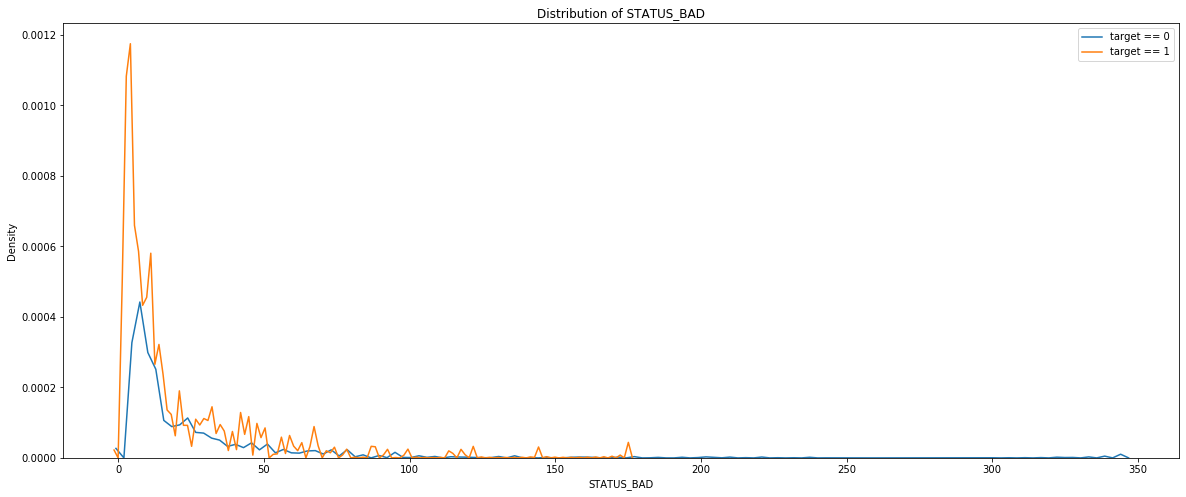

In [313]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'STATUS_BAD'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'STATUS_BAD'], label = 'target == 1')

# Labeling of plot
plt.xlabel('STATUS_BAD'); plt.ylabel('Density'); plt.title('Distribution of STATUS_BAD');

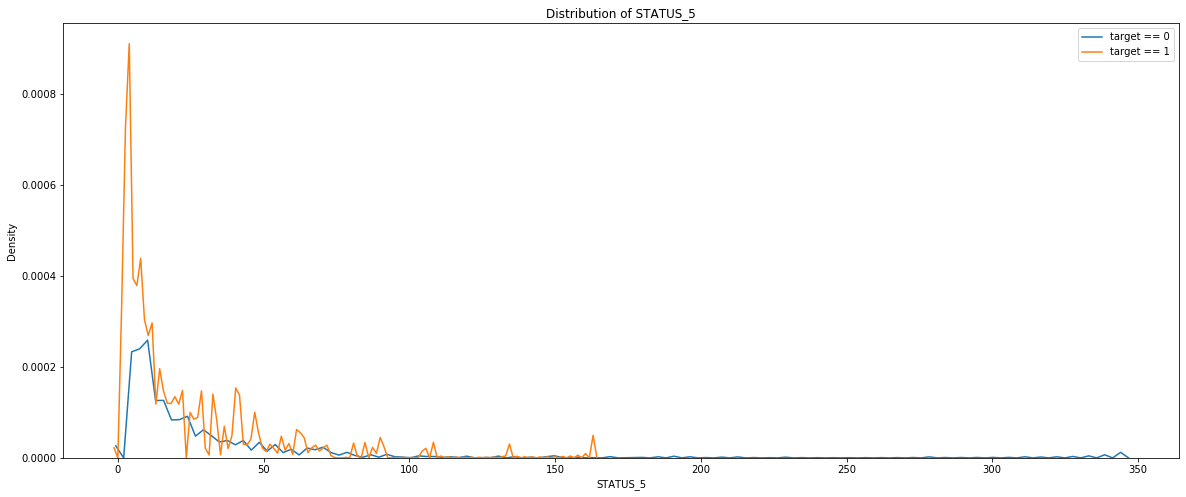

In [314]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'STATUS_5'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'STATUS_5'], label = 'target == 1')

# Labeling of plot
plt.xlabel('STATUS_5'); plt.ylabel('Density'); plt.title('Distribution of STATUS_5');

In [345]:
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100006       0         Cash loans           F            N   
3           100007       0         Cash loans           M            N   
4           100008       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
278214      456251       0         Cash loans           M            N   
278215      456252       0         Cash loans           F            N   
278216      456253       0         Cash loans           F            N   
278217      456254       1         Cash loans           F            N   
278218      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0          135000.0    312682.5   
3                    Y             0          121500.0    513000.0   
4                    Y             0           99000.0    490495.5   
...                ...           ...               ...         ...   
278214               N             0          157500.0    254700.0   
278215               Y             0           72000.0    269550.0   
278216               Y             0          153000.0    677664.0   
278217               Y             0          171000.0    370107.0   
278218               N             0          157500.0    675000.0   

        AMT_GOODS_PRICE  AMT_ANNUITY      NAME_INCOME_TYPE  \
0              351000.0      24700.5               Working   
1             1129500.0      35698.5         State servant   
2              297000.0      29686.5               Working   
3              513000.0      21865.5               Working   
4              454500.0      27517.5         State servant   
...                 ...          ...                   ...   
278214         225000.0      27558.0               Working   
278215         225000.0      12001.5             Pensioner   
278216         585000.0      29979.0               Working   
278217         319500.0      20205.0  Commercial associate   
278218         675000.0      49117.5  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special        Civil marriage   
3       Secondary / secondary special  Single / not married   
4       Secondary / secondary special               Married   
...                               ...                   ...   
278214  Secondary / secondary special             Separated   
278215  Secondary / secondary special                 Widow   
278216               Higher education             Separated   
278217  Secondary / secondary special               Married   
278218               Higher education               Married   

        NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  \
0       House / apartment       -9461           -637              1.0   
1       House / apartment      -16765          -1188              2.0   
2       House / apartment      -19005          -3039              2.0   
3       House / apartment      -19932          -3038              1.0   
4       House / apartment      -16941          -1588              2.0   
...                   ...         ...            ...              ...   
278214       With parents       -9327           -236              1.0   
278215  House / apartment      -20775         365243              1.0   
278216  House / apartment      -14966          -7921              1.0   
278217  House / apartment      -11961         

In [582]:
with open('data/df.pickle', 'wb') as output:
    pickle.dump(df, output)


# Aggregation du fichier "previous_application"

In [347]:
# Training data
previous_application = pd.read_csv('D:/openclassrooms/PROJET 7/DATA/previous_application.csv')
print('Training data shape: ', previous_application.shape)
previous_application.head()

Training data shape:  (1670214, 37)


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [348]:
missing_values = missing_values_table(previous_application)
missing_values

Your selected dataframe has 37 columns.
There are 16 columns that have missing values.


Missing Values  % of Total Values
RATE_INTEREST_PRIMARY             1664263               99.6
RATE_INTEREST_PRIVILEGED          1664263               99.6
AMT_DOWN_PAYMENT                   895844               53.6
RATE_DOWN_PAYMENT                  895844               53.6
NAME_TYPE_SUITE                    820405               49.1
DAYS_FIRST_DRAWING                 673065               40.3
DAYS_FIRST_DUE                     673065               40.3
DAYS_LAST_DUE_1ST_VERSION          673065               40.3
DAYS_LAST_DUE                      673065               40.3
DAYS_TERMINATION                   673065               40.3
NFLAG_INSURED_ON_APPROVAL          673065               40.3
AMT_GOODS_PRICE                    385515               23.1
AMT_ANNUITY                        372235               22.3
CNT_PAYMENT                        372230               22.3
PRODUCT_COMBINATION                   346                0.0
AMT_CREDIT                              1                0.0

In [349]:
previous_application.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [350]:
previous_application.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [354]:
previous_application.CODE_REJECT_REASON.value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

In [355]:
previous_application.NAME_PORTFOLIO.value_counts()

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

In [351]:
missing_values = missing_values_table(previous_application[previous_application.NAME_CONTRACT_STATUS == "Approved"])
missing_values

Your selected dataframe has 37 columns.
There are 15 columns that have missing values.


Missing Values  % of Total Values
RATE_INTEREST_PRIMARY             1030830               99.4
RATE_INTEREST_PRIVILEGED          1030830               99.4
AMT_DOWN_PAYMENT                   374400               36.1
RATE_DOWN_PAYMENT                  374400               36.1
NAME_TYPE_SUITE                    372444               35.9
AMT_GOODS_PRICE                     42835                4.1
DAYS_FIRST_DRAWING                  39632                3.8
DAYS_FIRST_DUE                      39632                3.8
DAYS_LAST_DUE_1ST_VERSION           39632                3.8
DAYS_LAST_DUE                       39632                3.8
DAYS_TERMINATION                    39632                3.8
NFLAG_INSURED_ON_APPROVAL           39632                3.8
AMT_ANNUITY                             8                0.0
CNT_PAYMENT                             4                0.0
AMT_CREDIT                              1                0.0

In [353]:
missing_values = missing_values_table(previous_application.previous_application[NAME_CONTRACT_STATUS == "Refused"])
missing_values

Your selected dataframe has 37 columns.
There are 15 columns that have missing values.


Missing Values  % of Total Values
RATE_INTEREST_PRIMARY              290678              100.0
RATE_INTEREST_PRIVILEGED           290678              100.0
DAYS_FIRST_DRAWING                 290678              100.0
DAYS_FIRST_DUE                     290678              100.0
DAYS_LAST_DUE_1ST_VERSION          290678              100.0
DAYS_LAST_DUE                      290678              100.0
DAYS_TERMINATION                   290678              100.0
NFLAG_INSURED_ON_APPROVAL          290678              100.0
AMT_DOWN_PAYMENT                   203326               69.9
RATE_DOWN_PAYMENT                  203326               69.9
NAME_TYPE_SUITE                    120786               41.6
AMT_ANNUITY                         40898               14.1
CNT_PAYMENT                         40897               14.1
AMT_GOODS_PRICE                     37105               12.8
PRODUCT_COMBINATION                    31                0.0

## Creation "hc_previous_loan_insured"

1 egal OUI le client a demandé une assurance

In [422]:
previous_application.NFLAG_INSURED_ON_APPROVAL.value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [424]:
hc_previous_loan_insured = previous_application.groupby('SK_ID_CURR', as_index=False)[
    'NFLAG_INSURED_ON_APPROVAL'].sum().rename(columns={'NFLAG_INSURED_ON_APPROVAL': 'hc_previous_loan_insured'})
hc_previous_loan_insured.head()

SK_ID_CURR  hc_previous_loan_insured
0      100001                       0.0
1      100002                       0.0
2      100003                       2.0
3      100004                       0.0
4      100005                       0.0

In [425]:
# Join to the training dataframe
df = df.merge(hc_previous_loan_insured, on = 'SK_ID_CURR', how = 'left')
# Fill the missing values with 0 
df['hc_previous_loan_insured'] = df['hc_previous_loan_insured'].fillna(0)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100006       0         Cash loans           F            N   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0          135000.0    312682.5   
3               Y             0          121500.0    513000.0   
4               Y             0           99000.0    490495.5   

   AMT_GOODS_PRICE  AMT_ANNUITY_x NAME_INCOME_TYPE  \
0         351000.0        24700.5          Working   
1        1129500.0        35698.5    State servant   
2         297000.0        29686.5          Working   
3         513000.0        21865.5          Working   
4         454500.0        27517.5    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special        Civil marriage  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0       -9461           -637              1.0                     2   
1      -16765          -1188              2.0                     1   
2      -19005          -3039              2.0                     2   
3      -19932          -3038              1.0                     2   
4      -16941          -1588              2.0                     2   

   REGION_RATING_CLIENT_W_CITY  LENGTH_CREDIT  CREDIT_INCOME_PERCENT  \
0                            2      16.461104             200.788889   
1                            1      36.234085             479.075000   
2                            2      10.532818             231.616667   
3                            2      23.461618             422.222222   
4                            2      17.824857             495.450000   

   ANNUITY_INCOME_PERCENT  YEARS_BIRTH  YEARS_EMPLOYED  DAYS_EMPLOYED_PERCENT  \
0               12.197778           25        1.745205               6.732903   
1               13.221667           45        3.254795               7.086191   
2               21.990000           52        8.326027              15.990529   
3               17.996296           54        8.323288              15.241822   
4               27.795455           46        4.350685               9.373709   

   INCOME_PER_PERSON  previous_loan_counts  previous_loan_active_credit_sum  \
0           202500.0                   8.0                       481988.565   
1           135000.0                   4.0                       810000.000   
2            67500.0                   0.0                            0.000   
3           121500.0                   1.0                            0.000   
4            49500.0                   3.0                       267606.000   

   STATUS_0  STATUS_1  STATUS_2  STATUS_3  STATUS_4  STATUS_5  STATUS_BAD  \
0      45.0      27.0       0.0       0.0       0.0       0.0         0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0         0.0   

   credit_day_overdue_sum  credit_day_overdue_mean  \
0                     0.0                      0.0   
1               

Text(0.5, 1.0, 'Distribution of hc_previous_loan_insured')

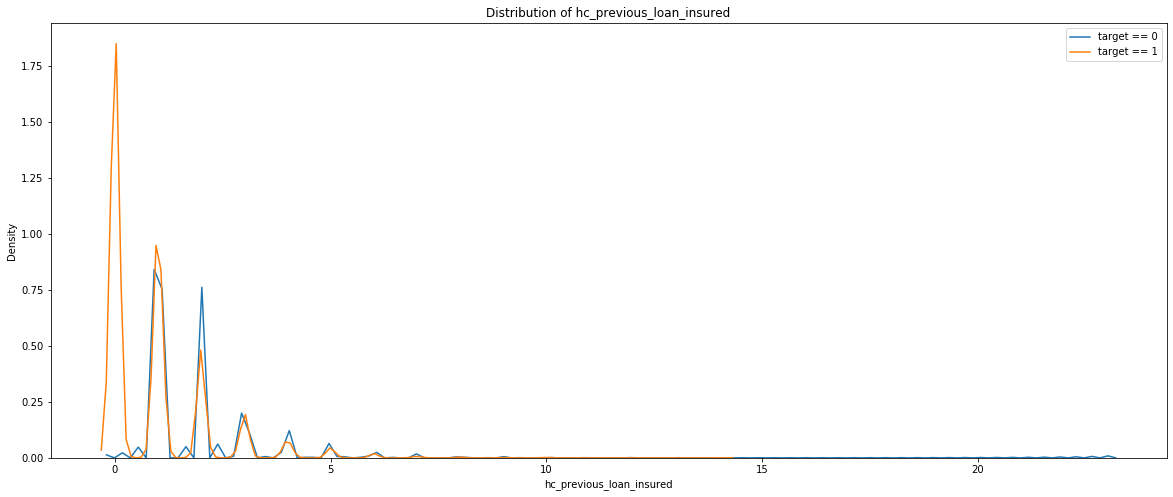

In [426]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'hc_previous_loan_insured'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'hc_previous_loan_insured'], label = 'target == 1')

# Labeling of plot
plt.xlabel('hc_previous_loan_insured'); plt.ylabel('Density'); plt.title('Distribution of hc_previous_loan_insured')

## Creation des variables "hc_previous_loan_counts", "hc_previous_loan_counts_refused","hc_previous_loan_counts_Approved"

"hc_previous_loan_counts" : Nombre de credits demandés à Home Credit  
"hc_previous_loan_counts_Approved": Nombre de crédits approuvés par Home Credit  
"hc_previous_loan_counts_refused": Nombre de crédits refusés par Home Credit  


In [390]:
hc_previous_loan_counts = previous_application.groupby('SK_ID_CURR', as_index=False)['SK_ID_PREV'].count().rename(columns = {'SK_ID_PREV': 'hc_previous_loan_counts'})
hc_previous_loan_counts.head()

SK_ID_CURR  hc_previous_loan_counts
0      100001                        1
1      100002                        1
2      100003                        3
3      100004                        1
4      100005                        2

In [391]:
# Join to the training dataframe
df = df.merge(hc_previous_loan_counts, on = 'SK_ID_CURR', how = 'left')
# Fill the missing values with 0 
df['hc_previous_loan_counts'] = df['hc_previous_loan_counts'].fillna(0)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100006       0         Cash loans           F            N   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0          135000.0    312682.5   
3               Y             0          121500.0    513000.0   
4               Y             0           99000.0    490495.5   

   AMT_GOODS_PRICE  AMT_ANNUITY_x NAME_INCOME_TYPE  \
0         351000.0        24700.5          Working   
1        1129500.0        35698.5    State servant   
2         297000.0        29686.5          Working   
3         513000.0        21865.5          Working   
4         454500.0        27517.5    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special        Civil marriage  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0       -9461           -637              1.0                     2   
1      -16765          -1188              2.0                     1   
2      -19005          -3039              2.0                     2   
3      -19932          -3038              1.0                     2   
4      -16941          -1588              2.0                     2   

   REGION_RATING_CLIENT_W_CITY  LENGTH_CREDIT  CREDIT_INCOME_PERCENT  \
0                            2      16.461104             200.788889   
1                            1      36.234085             479.075000   
2                            2      10.532818             231.616667   
3                            2      23.461618             422.222222   
4                            2      17.824857             495.450000   

   ANNUITY_INCOME_PERCENT  YEARS_BIRTH  YEARS_EMPLOYED  DAYS_EMPLOYED_PERCENT  \
0               12.197778           25        1.745205               6.732903   
1               13.221667           45        3.254795               7.086191   
2               21.990000           52        8.326027              15.990529   
3               17.996296           54        8.323288              15.241822   
4               27.795455           46        4.350685               9.373709   

   INCOME_PER_PERSON  previous_loan_counts  previous_loan_active_credit_sum  \
0           202500.0                   8.0                       481988.565   
1           135000.0                   4.0                       810000.000   
2            67500.0                   0.0                            0.000   
3           121500.0                   1.0                            0.000   
4            49500.0                   3.0                       267606.000   

   STATUS_0  STATUS_1  STATUS_2  STATUS_3  STATUS_4  STATUS_5  STATUS_BAD  \
0      45.0      27.0       0.0       0.0       0.0       0.0         0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0         0.0   

   credit_day_overdue_sum  credit_day_overdue_mean  \
0                     0.0                      0.0   
1               

In [383]:
hc_previous_loan_counts_refused = previous_application[previous_application.NAME_CONTRACT_STATUS == "Refused"].groupby(
    'SK_ID_CURR', as_index=False)['SK_ID_PREV'].count().rename(columns={'SK_ID_PREV': 'hc_previous_loan_counts_refused'})
hc_previous_loan_counts_refused.head()

SK_ID_CURR  hc_previous_loan_counts_refused
0      100006                                1
1      100011                                1
2      100027                                1
3      100030                               10
4      100035                                8

In [389]:
del df['hc_previous_loan_counts']

In [388]:
# Join to the training dataframe
df = df.merge(hc_previous_loan_counts_refused, on = 'SK_ID_CURR', how = 'left')
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100006       0         Cash loans           F            N   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0          135000.0    312682.5   
3               Y             0          121500.0    513000.0   
4               Y             0           99000.0    490495.5   

   AMT_GOODS_PRICE  AMT_ANNUITY_x NAME_INCOME_TYPE  \
0         351000.0        24700.5          Working   
1        1129500.0        35698.5    State servant   
2         297000.0        29686.5          Working   
3         513000.0        21865.5          Working   
4         454500.0        27517.5    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special        Civil marriage  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0       -9461           -637              1.0                     2   
1      -16765          -1188              2.0                     1   
2      -19005          -3039              2.0                     2   
3      -19932          -3038              1.0                     2   
4      -16941          -1588              2.0                     2   

   REGION_RATING_CLIENT_W_CITY  LENGTH_CREDIT  CREDIT_INCOME_PERCENT  \
0                            2      16.461104             200.788889   
1                            1      36.234085             479.075000   
2                            2      10.532818             231.616667   
3                            2      23.461618             422.222222   
4                            2      17.824857             495.450000   

   ANNUITY_INCOME_PERCENT  YEARS_BIRTH  YEARS_EMPLOYED  DAYS_EMPLOYED_PERCENT  \
0               12.197778           25        1.745205               6.732903   
1               13.221667           45        3.254795               7.086191   
2               21.990000           52        8.326027              15.990529   
3               17.996296           54        8.323288              15.241822   
4               27.795455           46        4.350685               9.373709   

   INCOME_PER_PERSON  previous_loan_counts  previous_loan_active_credit_sum  \
0           202500.0                   8.0                       481988.565   
1           135000.0                   4.0                       810000.000   
2            67500.0                   0.0                            0.000   
3           121500.0                   1.0                            0.000   
4            49500.0                   3.0                       267606.000   

   STATUS_0  STATUS_1  STATUS_2  STATUS_3  STATUS_4  STATUS_5  STATUS_BAD  \
0      45.0      27.0       0.0       0.0       0.0       0.0         0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0         0.0   

   credit_day_overdue_sum  credit_day_overdue_mean  \
0                     0.0                      0.0   
1               

In [392]:
# Fill the missing values with 0 
df['hc_previous_loan_counts_refused'] = df['hc_previous_loan_counts_refused'].fillna(0)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100006       0         Cash loans           F            N   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0          135000.0    312682.5   
3               Y             0          121500.0    513000.0   
4               Y             0           99000.0    490495.5   

   AMT_GOODS_PRICE  AMT_ANNUITY_x NAME_INCOME_TYPE  \
0         351000.0        24700.5          Working   
1        1129500.0        35698.5    State servant   
2         297000.0        29686.5          Working   
3         513000.0        21865.5          Working   
4         454500.0        27517.5    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special        Civil marriage  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0       -9461           -637              1.0                     2   
1      -16765          -1188              2.0                     1   
2      -19005          -3039              2.0                     2   
3      -19932          -3038              1.0                     2   
4      -16941          -1588              2.0                     2   

   REGION_RATING_CLIENT_W_CITY  LENGTH_CREDIT  CREDIT_INCOME_PERCENT  \
0                            2      16.461104             200.788889   
1                            1      36.234085             479.075000   
2                            2      10.532818             231.616667   
3                            2      23.461618             422.222222   
4                            2      17.824857             495.450000   

   ANNUITY_INCOME_PERCENT  YEARS_BIRTH  YEARS_EMPLOYED  DAYS_EMPLOYED_PERCENT  \
0               12.197778           25        1.745205               6.732903   
1               13.221667           45        3.254795               7.086191   
2               21.990000           52        8.326027              15.990529   
3               17.996296           54        8.323288              15.241822   
4               27.795455           46        4.350685               9.373709   

   INCOME_PER_PERSON  previous_loan_counts  previous_loan_active_credit_sum  \
0           202500.0                   8.0                       481988.565   
1           135000.0                   4.0                       810000.000   
2            67500.0                   0.0                            0.000   
3           121500.0                   1.0                            0.000   
4            49500.0                   3.0                       267606.000   

   STATUS_0  STATUS_1  STATUS_2  STATUS_3  STATUS_4  STATUS_5  STATUS_BAD  \
0      45.0      27.0       0.0       0.0       0.0       0.0         0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0         0.0   

   credit_day_overdue_sum  credit_day_overdue_mean  \
0                     0.0                      0.0   
1               

In [393]:
hc_previous_loan_counts_approved = previous_application[previous_application.NAME_CONTRACT_STATUS == "Approved"].groupby(
    'SK_ID_CURR', as_index=False)['SK_ID_PREV'].count().rename(columns={'SK_ID_PREV': 'hc_previous_loan_counts_approved'})
hc_previous_loan_counts_approved.head()

SK_ID_CURR  hc_previous_loan_counts_approved
0      100001                                 1
1      100002                                 1
2      100003                                 3
3      100004                                 1
4      100005                                 1

In [394]:
# Join to the training dataframe
df = df.merge(hc_previous_loan_counts_approved, on = 'SK_ID_CURR', how = 'left')
# Fill the missing values with 0 
df['hc_previous_loan_counts_approved'] = df['hc_previous_loan_counts_approved'].fillna(0)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100006       0         Cash loans           F            N   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0          135000.0    312682.5   
3               Y             0          121500.0    513000.0   
4               Y             0           99000.0    490495.5   

   AMT_GOODS_PRICE  AMT_ANNUITY_x NAME_INCOME_TYPE  \
0         351000.0        24700.5          Working   
1        1129500.0        35698.5    State servant   
2         297000.0        29686.5          Working   
3         513000.0        21865.5          Working   
4         454500.0        27517.5    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special        Civil marriage  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0       -9461           -637              1.0                     2   
1      -16765          -1188              2.0                     1   
2      -19005          -3039              2.0                     2   
3      -19932          -3038              1.0                     2   
4      -16941          -1588              2.0                     2   

   REGION_RATING_CLIENT_W_CITY  LENGTH_CREDIT  CREDIT_INCOME_PERCENT  \
0                            2      16.461104             200.788889   
1                            1      36.234085             479.075000   
2                            2      10.532818             231.616667   
3                            2      23.461618             422.222222   
4                            2      17.824857             495.450000   

   ANNUITY_INCOME_PERCENT  YEARS_BIRTH  YEARS_EMPLOYED  DAYS_EMPLOYED_PERCENT  \
0               12.197778           25        1.745205               6.732903   
1               13.221667           45        3.254795               7.086191   
2               21.990000           52        8.326027              15.990529   
3               17.996296           54        8.323288              15.241822   
4               27.795455           46        4.350685               9.373709   

   INCOME_PER_PERSON  previous_loan_counts  previous_loan_active_credit_sum  \
0           202500.0                   8.0                       481988.565   
1           135000.0                   4.0                       810000.000   
2            67500.0                   0.0                            0.000   
3           121500.0                   1.0                            0.000   
4            49500.0                   3.0                       267606.000   

   STATUS_0  STATUS_1  STATUS_2  STATUS_3  STATUS_4  STATUS_5  STATUS_BAD  \
0      45.0      27.0       0.0       0.0       0.0       0.0         0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0         0.0   

   credit_day_overdue_sum  credit_day_overdue_mean  \
0                     0.0                      0.0   
1               

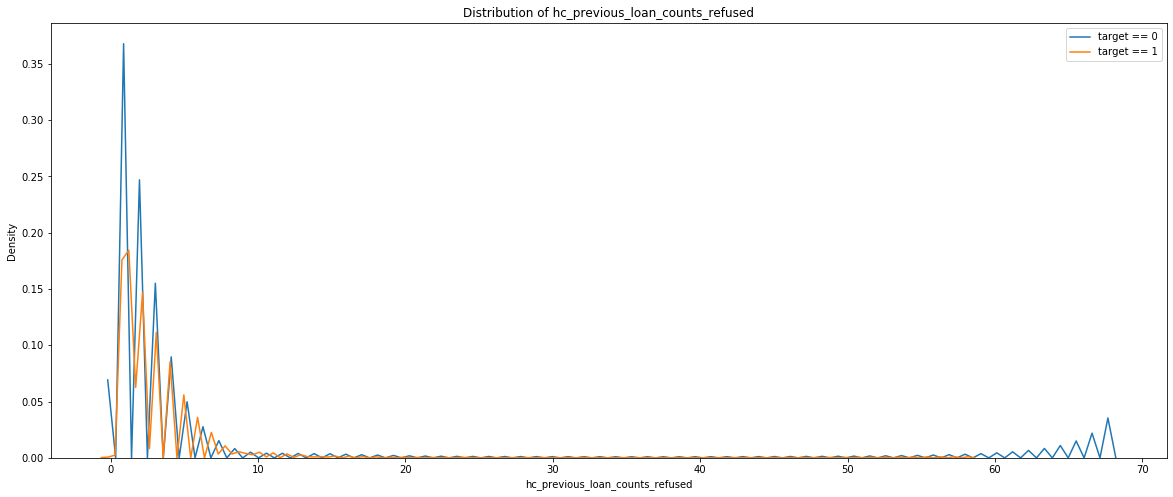

In [395]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'hc_previous_loan_counts_refused'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'hc_previous_loan_counts_refused'], label = 'target == 1')

# Labeling of plot
plt.xlabel('hc_previous_loan_counts_refused'); plt.ylabel('Density'); plt.title('Distribution of hc_previous_loan_counts_refused');

Text(0.5, 1.0, 'Distribution of hc_previous_loan_counts')

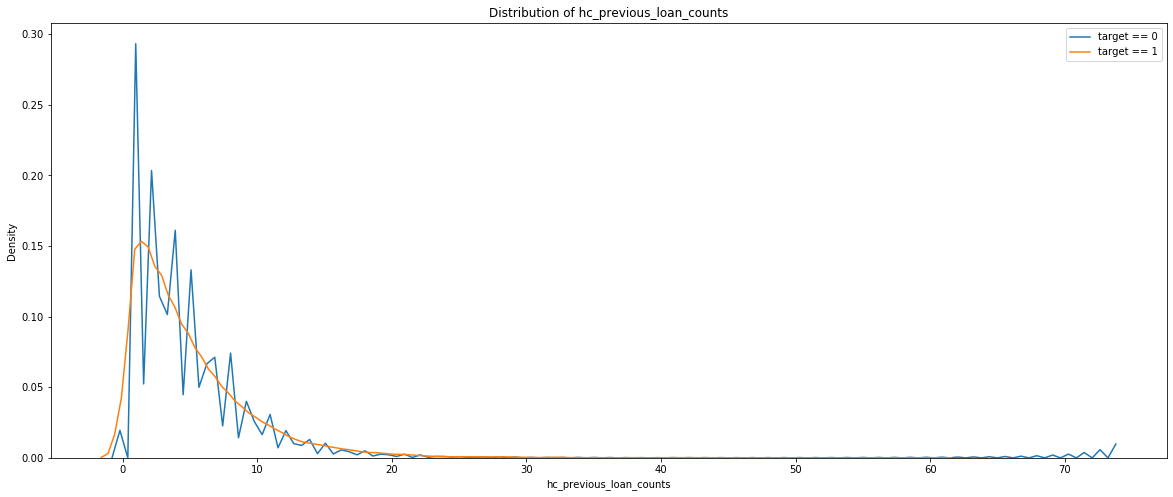

In [396]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'hc_previous_loan_counts'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'hc_previous_loan_counts'], label = 'target == 1')

# Labeling of plot
plt.xlabel('hc_previous_loan_counts'); plt.ylabel('Density'); plt.title('Distribution of hc_previous_loan_counts')

Text(0.5, 1.0, 'Distribution of hc_previous_loan_counts_approved')

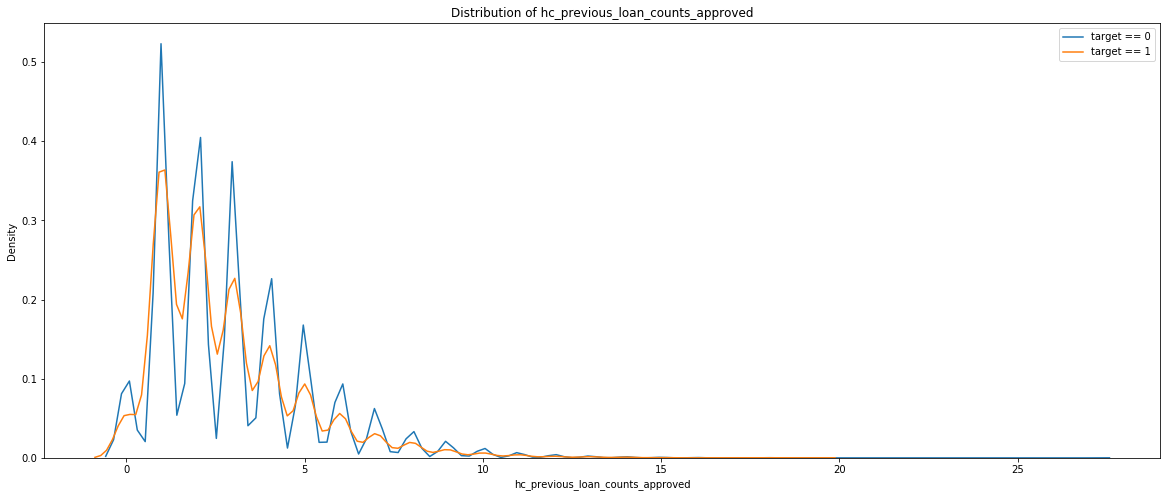

In [397]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'hc_previous_loan_counts_approved'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'hc_previous_loan_counts_approved'], label = 'target == 1')

# Labeling of plot
plt.xlabel('hc_previous_loan_counts_approved'); plt.ylabel('Density'); plt.title('Distribution of hc_previous_loan_counts_approved')

## Etude de "DAYS_TERMINATION"

Il semble que quand "DAYS_TERMINATION" égal 365243 l'emprunt soit toujours en cours, il est donc possible de calculer les montants mensuels restant à payer

Montant total des credit approuvés   
DAYS_TERMINATION: Par rapport à la date d'application de la demande actuelle, à quelle date la fin de la demande précédente
était-elle prévue  
Nombre de crédits actifs
longueur max des crédits actifs  
AMT_ANNUITY: Annuity of previous application  
sommes des montants annuites des crédit actifs  
montant de l'annuité si le credit actif  

In [401]:
previous_application[previous_application.DAYS_TERMINATION >= 0].DAYS_TERMINATION.unique()

array([365243.])

In [399]:
previous_application.DAYS_TERMINATION.unique()

array([-3.70000e+01,  3.65243e+05, -1.77000e+02, ..., -2.82800e+03,
       -2.87000e+03, -2.81500e+03])

In [402]:

previous_application[previous_application.DAYS_LAST_DUE >= 0].DAYS_LAST_DUE.unique()

array([365243.])

In [403]:
missing_values = missing_values_table(previous_application)
missing_values

Your selected dataframe has 37 columns.
There are 16 columns that have missing values.


Missing Values  % of Total Values
RATE_INTEREST_PRIMARY             1664263               99.6
RATE_INTEREST_PRIVILEGED          1664263               99.6
AMT_DOWN_PAYMENT                   895844               53.6
RATE_DOWN_PAYMENT                  895844               53.6
NAME_TYPE_SUITE                    820405               49.1
DAYS_FIRST_DRAWING                 673065               40.3
DAYS_FIRST_DUE                     673065               40.3
DAYS_LAST_DUE_1ST_VERSION          673065               40.3
DAYS_LAST_DUE                      673065               40.3
DAYS_TERMINATION                   673065               40.3
NFLAG_INSURED_ON_APPROVAL          673065               40.3
AMT_GOODS_PRICE                    385515               23.1
AMT_ANNUITY                        372235               22.3
CNT_PAYMENT                        372230               22.3
PRODUCT_COMBINATION                   346                0.0
AMT_CREDIT                              1                0.0

In [406]:
previous_application[(previous_application.NAME_CONTRACT_STATUS == "Approved") & (previous_application.DAYS_LAST_DUE >= 0)].DAYS_LAST_DUE.unique()

array([365243.])

In [405]:
previous_application[previous_application.NAME_CONTRACT_STATUS == "Approved"].DAYS_TERMINATION.unique()

array([-3.70000e+01,  3.65243e+05, -1.77000e+02, ..., -2.82800e+03,
       -2.87000e+03, -2.81500e+03])

In [407]:
previous_application[(previous_application.NAME_CONTRACT_STATUS == "Approved") & (previous_application.DAYS_LAST_DUE >= 0)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
17          1285768      142748    Revolving loans     9000.000   
21          1182516      267782         Cash loans    20361.600   
34          1629736      255331    Revolving loans    10125.000   
...             ...         ...                ...          ...   
1669924     1568029      442032     Consumer loans    11730.825   
1669925     2126826      366227         Cash loans    30205.350   
1669945     1669699      158720     Consumer loans    11204.865   
1670192     2101747      339383    Revolving loans     3375.000   
1670199     1077969      242303     Consumer loans     8546.940   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1               607500.0    679671.0               NaN         607500.0   
2               112500.0    136444.5               NaN         112500.0   
17              180000.0    180000.0               NaN         180000.0   
21              405000.0    451777.5               NaN         405000.0   
34              202500.0    202500.0               NaN         202500.0   
...                  ...         ...               ...              ...   
1669924         123547.5    123547.5               0.0         123547.5   
1669925         450000.0    491580.0               NaN         450000.0   
1669945         113940.0    113940.0               0.0         113940.0   
1670192              0.0     67500.0               NaN              NaN   
1670199          37926.0     40932.0               0.0          37926.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                         THURSDAY                       11   
2                          TUESDAY                       11   
17                          FRIDAY                       13   
21                        SATURDAY                        4   
34                        SATURDAY                       14   
...                            ...                      ...   
1669924                     SUNDAY                       10   
1669925                  WEDNESDAY                       10   
1669945                     MONDAY                       13   
1670192                     FRIDAY                       18   
1670199                   THURSDAY                       12   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1                                 Y                       1   
2                                 Y                       1   
17                                Y                       1   
21                                Y                       1   
34                                Y                       1   
...                             ...                     ...   
1669924                           Y                       1   
1669925                           Y                       1   
1669945                           Y                       1   
1670192                           Y                       1   
1670199                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
1                      NaN                    NaN                       NaN   
2                      NaN                    NaN                       NaN   
17                     NaN                    NaN                       NaN   
21                     NaN                    NaN                       NaN   
34                     NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1669924                0.0                    NaN                       NaN   
1669925                NaN                    NaN                       NaN   
1669945                0.0                    NaN                       NaN   

In [434]:
previous_application[(previous_application.NAME_CONTRACT_STATUS == "Approved") & (
    previous_application.DAYS_LAST_DUE >= 0)].DAYS_LAST_DUE_1ST_VERSION.min()

-100.0

In [435]:
previous_application[(previous_application.NAME_CONTRACT_STATUS == "Approved") & (
    previous_application.DAYS_LAST_DUE >= 0) & (previous_application.DAYS_LAST_DUE_1ST_VERSION <0)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
44          2675386      118974     Consumer loans     6899.490   
1025        2763237      436332     Consumer loans     9892.305   
1233        2538442      113832     Consumer loans     5359.230   
1996        1076488      206451     Consumer loans    10797.255   
2904        2593875      129227     Consumer loans    14478.030   
...             ...         ...                ...          ...   
1658736     1920044      246619     Consumer loans     6855.615   
1664433     2383746      213730     Consumer loans     4571.055   
1664529     1515166      126403         Cash loans    56279.970   
1665815     2659804      204519     Consumer loans    12082.185   
1668633     1448919      427679         Cash loans    11916.315   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
44               55831.5     60745.5               0.0          55831.5   
1025            108018.0    108018.0               0.0         108018.0   
1233             43650.0     47970.0               0.0          43650.0   
1996            157500.0    159993.0           15750.0         157500.0   
2904            125505.0    138757.5               0.0         125505.0   
...                  ...         ...               ...              ...   
1658736          99405.0     66730.5           39762.0          99405.0   
1664433          28386.0     25546.5            2839.5          28386.0   
1664529         454500.0    534451.5               NaN         454500.0   
1665815          92781.0    108711.0               0.0          92781.0   
1668633         135000.0    178308.0               NaN         135000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
44                          SUNDAY                       13   
1025                        FRIDAY                       16   
1233                        MONDAY                        9   
1996                        SUNDAY                       14   
2904                        SUNDAY                       18   
...                            ...                      ...   
1658736                     MONDAY                        9   
1664433                     FRIDAY                       10   
1664529                   THURSDAY                       12   
1665815                     MONDAY                        5   
1668633                     MONDAY                       18   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
44                                Y                       1   
1025                              Y                       1   
1233                              Y                       1   
1996                              Y                       1   
2904                              Y                       1   
...                             ...                     ...   
1658736                           Y                       1   
1664433                           Y                       1   
1664529                           Y                       1   
1665815                           Y                       1   
1668633                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
44                0.000000                    NaN                       NaN   
1025              0.000000                    NaN                       NaN   
1233              0.000000                    NaN                       NaN   
1996              0.097604                    NaN                       NaN   
2904              0.000000                    NaN                       NaN   
...                    ...                    ...                       ...   
1658736           0.406643                    NaN                       NaN   
1664433           0.108944                    NaN                       NaN   
1664529                NaN                    NaN                       NaN   

In [438]:
previous_application[(previous_application.NAME_CONTRACT_STATUS == "Approved") & (
    previous_application.DAYS_LAST_DUE >= 0) & (previous_application.DAYS_LAST_DUE_1ST_VERSION >0)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
17          1285768      142748    Revolving loans     9000.000   
21          1182516      267782         Cash loans    20361.600   
34          1629736      255331    Revolving loans    10125.000   
...             ...         ...                ...          ...   
1669924     1568029      442032     Consumer loans    11730.825   
1669925     2126826      366227         Cash loans    30205.350   
1669945     1669699      158720     Consumer loans    11204.865   
1670192     2101747      339383    Revolving loans     3375.000   
1670199     1077969      242303     Consumer loans     8546.940   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1               607500.0    679671.0               NaN         607500.0   
2               112500.0    136444.5               NaN         112500.0   
17              180000.0    180000.0               NaN         180000.0   
21              405000.0    451777.5               NaN         405000.0   
34              202500.0    202500.0               NaN         202500.0   
...                  ...         ...               ...              ...   
1669924         123547.5    123547.5               0.0         123547.5   
1669925         450000.0    491580.0               NaN         450000.0   
1669945         113940.0    113940.0               0.0         113940.0   
1670192              0.0     67500.0               NaN              NaN   
1670199          37926.0     40932.0               0.0          37926.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                         THURSDAY                       11   
2                          TUESDAY                       11   
17                          FRIDAY                       13   
21                        SATURDAY                        4   
34                        SATURDAY                       14   
...                            ...                      ...   
1669924                     SUNDAY                       10   
1669925                  WEDNESDAY                       10   
1669945                     MONDAY                       13   
1670192                     FRIDAY                       18   
1670199                   THURSDAY                       12   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1                                 Y                       1   
2                                 Y                       1   
17                                Y                       1   
21                                Y                       1   
34                                Y                       1   
...                             ...                     ...   
1669924                           Y                       1   
1669925                           Y                       1   
1669945                           Y                       1   
1670192                           Y                       1   
1670199                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
1                      NaN                    NaN                       NaN   
2                      NaN                    NaN                       NaN   
17                     NaN                    NaN                       NaN   
21                     NaN                    NaN                       NaN   
34                     NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1669924                0.0                    NaN                       NaN   
1669925                NaN                    NaN                       NaN   
1669945                0.0                    NaN                       NaN   

In [437]:
previous_application['long'] = previous_application['DAYS_DECISION'] + previous_application['CNT_PAYMENT']*30

In [439]:
previous_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL          long  
count              997149.000000  1.297984e+06  
mean                    0.332570 -5.607377e+02  
std                     0.471134  9.978637e+02  
min      

In [441]:
previous_application[(previous_application.NAME_CONTRACT_TYPE == "Revolving loans") & (
    previous_application.NAME_CONTRACT_STATUS == "Approved")]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
17          1285768      142748    Revolving loans       9000.0   
34          1629736      255331    Revolving loans      10125.0   
49          1371540      200721    Revolving loans      11250.0   
82          2709276      342991    Revolving loans      45000.0   
93          2522811      120854    Revolving loans      33750.0   
...             ...         ...                ...          ...   
1669796     1161466      134972    Revolving loans       4500.0   
1669830     1292478      319374    Revolving loans      45000.0   
1669833     1544069      454213    Revolving loans       9000.0   
1669960     1731392      180860    Revolving loans      11250.0   
1670192     2101747      339383    Revolving loans       3375.0   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
17              180000.0    180000.0               NaN         180000.0   
34              202500.0    202500.0               NaN         202500.0   
49              225000.0    225000.0               NaN         225000.0   
82              900000.0    900000.0               NaN         900000.0   
93                   0.0    675000.0               NaN              NaN   
...                  ...         ...               ...              ...   
1669796          90000.0     90000.0               NaN          90000.0   
1669830              0.0    900000.0               NaN              NaN   
1669833         180000.0    180000.0               NaN         180000.0   
1669960              0.0    225000.0               NaN              NaN   
1670192              0.0     67500.0               NaN              NaN   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
17                          FRIDAY                       13   
34                        SATURDAY                       14   
49                          FRIDAY                       15   
82                         TUESDAY                       13   
93                        THURSDAY                       18   
...                            ...                      ...   
1669796                    TUESDAY                       12   
1669830                    TUESDAY                       16   
1669833                  WEDNESDAY                        9   
1669960                    TUESDAY                       17   
1670192                     FRIDAY                       18   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
17                                Y                       1   
34                                Y                       1   
49                                Y                       1   
82                                Y                       1   
93                                Y                       1   
...                             ...                     ...   
1669796                           Y                       1   
1669830                           Y                       1   
1669833                           Y                       1   
1669960                           Y                       1   
1670192                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
17                     NaN                    NaN                       NaN   
34                     NaN                    NaN                       NaN   
49                     NaN                    NaN                       NaN   
82                     NaN                    NaN                       NaN   
93                     NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1669796                NaN                    NaN                       NaN   
1669830                NaN                    NaN                       NaN   
1669833                NaN                    NaN                       NaN   

In [445]:
previous_application[(previous_application.NAME_CONTRACT_TYPE == "Cash loans") & (
    previous_application.NAME_CONTRACT_STATUS == "Approved") & (previous_application.DAYS_LAST_DUE >0)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
21          1182516      267782         Cash loans    20361.600   
68          2345724      197444         Cash loans    10030.500   
123         1418540      303722         Cash loans     6311.250   
...             ...         ...                ...          ...   
1669843     2004076      274226         Cash loans    12046.815   
1669844     2598228      282261         Cash loans    17171.910   
1669852     1441893      154496         Cash loans    15377.490   
1669855     1642763      281072         Cash loans    13551.255   
1669925     2126826      366227         Cash loans    30205.350   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1               607500.0    679671.0               NaN         607500.0   
2               112500.0    136444.5               NaN         112500.0   
21              405000.0    451777.5               NaN         405000.0   
68              360000.0    360000.0               NaN         360000.0   
123              67500.0     67500.0               NaN          67500.0   
...                  ...         ...               ...              ...   
1669843         135000.0    178308.0               NaN         135000.0   
1669844         229500.0    291456.0               NaN         229500.0   
1669852         229500.0    262998.0               NaN         229500.0   
1669855         229500.0    254340.0               NaN         229500.0   
1669925         450000.0    491580.0               NaN         450000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                         THURSDAY                       11   
2                          TUESDAY                       11   
21                        SATURDAY                        4   
68                        THURSDAY                       10   
123                         FRIDAY                       12   
...                            ...                      ...   
1669843                     SUNDAY                       11   
1669844                  WEDNESDAY                       11   
1669852                     FRIDAY                        6   
1669855                     MONDAY                        7   
1669925                  WEDNESDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1                                 Y                       1   
2                                 Y                       1   
21                                Y                       1   
68                                Y                       1   
123                               Y                       1   
...                             ...                     ...   
1669843                           Y                       1   
1669844                           Y                       1   
1669852                           Y                       1   
1669855                           Y                       1   
1669925                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
1                      NaN                    NaN                       NaN   
2                      NaN                    NaN                       NaN   
21                     NaN                    NaN                       NaN   
68                     NaN                    NaN                       NaN   
123                    NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1669843                NaN                    NaN                       NaN   
1669844                NaN                    NaN                       NaN   
1669852                NaN                    NaN                       NaN   

In [446]:
previous_application[(previous_application.NAME_CONTRACT_TYPE == "Consumer loans") & (
    previous_application.NAME_CONTRACT_STATUS == "Approved") & (previous_application.DAYS_LAST_DUE >0)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
44          2675386      118974     Consumer loans     6899.490   
70          1816690      372970     Consumer loans    10483.650   
76          1241792      404105     Consumer loans    23343.030   
96          2030030      133853     Consumer loans     7253.055   
121         2567926      186632     Consumer loans     8418.960   
...             ...         ...                ...          ...   
1669914     2516638      192952     Consumer loans    13496.490   
1669923     1465370      413210     Consumer loans     2380.860   
1669924     1568029      442032     Consumer loans    11730.825   
1669945     1669699      158720     Consumer loans    11204.865   
1670199     1077969      242303     Consumer loans     8546.940   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
44               55831.5     60745.5               0.0          55831.5   
70              104850.0     93838.5           11011.5         104850.0   
76              132480.0    125527.5           13248.0         132480.0   
96              104809.5    121410.0               0.0         104809.5   
121             186880.5    186880.5               0.0         186880.5   
...                  ...         ...               ...              ...   
1669914         118827.9    118827.9               0.0         118827.9   
1669923          23589.0     23589.0               0.0          23589.0   
1669924         123547.5    123547.5               0.0         123547.5   
1669945         113940.0    113940.0               0.0         113940.0   
1670199          37926.0     40932.0               0.0          37926.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
44                          SUNDAY                       13   
70                        SATURDAY                       11   
76                        SATURDAY                       16   
96                        SATURDAY                       14   
121                         MONDAY                       16   
...                            ...                      ...   
1669914                   SATURDAY                       16   
1669923                     MONDAY                       16   
1669924                     SUNDAY                       10   
1669945                     MONDAY                       13   
1670199                   THURSDAY                       12   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
44                                Y                       1   
70                                Y                       1   
76                                Y                       1   
96                                Y                       1   
121                               Y                       1   
...                             ...                     ...   
1669914                           Y                       1   
1669923                           Y                       1   
1669924                           Y                       1   
1669945                           Y                       1   
1670199                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
44                0.000000                    NaN                       NaN   
70                0.114378                    NaN                       NaN   
76                0.103968                    NaN                       NaN   
96                0.000000                    NaN                       NaN   
121               0.000000                    NaN                       NaN   
...                    ...                    ...                       ...   
1669914           0.000000                    NaN                       NaN   
1669923           0.000000               0.196914                  0.867336   
1669924           0.000000                    NaN                       NaN   

## Calcul de "hc__previous_loan_annuity"

Montant total de "AMT_ANNUITY" quand le crédit est approuvé et pas terminé. La question se pose pour les credits revolving... au final apres étude des courbes je les intégre

In [ ]:
previous_application[(previous_application.NAME_CONTRACT_TYPE == "Consumer loans") & (
    previous_application.NAME_CONTRACT_STATUS == "Approved") & (previous_application.DAYS_LAST_DUE >0)]

In [448]:
hc_previous_loan_annuity = previous_application[(previous_application.NAME_CONTRACT_STATUS == "Approved") & (previous_application.DAYS_LAST_DUE > 0)].groupby(
    'SK_ID_CURR', as_index = False)['AMT_ANNUITY'].sum().rename(columns = {'AMT_ANNUITY': 'hc_previous_loan_annuity'})
hc_previous_loan_annuity.head()

SK_ID_CURR  hc_previous_loan_annuity
0      100006                 42527.520
1      100007                 16037.640
2      100009                 10418.670
3      100014                 14045.625
4      100017                 11783.520

In [449]:
hc_previous_loan_annuity.shape

(164234, 2)

In [450]:
hc_previous_loan_annuity_not_rl = previous_application[(previous_application.NAME_CONTRACT_TYPE != "Revolving loans") & (previous_application.NAME_CONTRACT_STATUS == "Approved") & (previous_application.DAYS_LAST_DUE > 0)].groupby(
    'SK_ID_CURR', as_index=False)['AMT_ANNUITY'].sum().rename(columns={'AMT_ANNUITY': 'hc_previous_loan_annuity_not_rl'})
hc_previous_loan_annuity_not_rl.head()

SK_ID_CURR  hc_previous_loan_annuity_not_rl
0      100006                        29027.520
1      100007                        16037.640
2      100009                        10418.670
3      100014                        14045.625
4      100017                        11783.520

In [451]:
# Join to the training dataframe
df = df.merge(hc_previous_loan_annuity_not_rl, on = 'SK_ID_CURR', how = 'left')
# Fill the missing values with 0 
df['hc_previous_loan_annuity_not_rl'] = df['hc_previous_loan_annuity_not_rl'].fillna(0)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100006       0         Cash loans           F            N   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0          135000.0    312682.5   
3               Y             0          121500.0    513000.0   
4               Y             0           99000.0    490495.5   

   AMT_GOODS_PRICE  AMT_ANNUITY_x NAME_INCOME_TYPE  \
0         351000.0        24700.5          Working   
1        1129500.0        35698.5    State servant   
2         297000.0        29686.5          Working   
3         513000.0        21865.5          Working   
4         454500.0        27517.5    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special        Civil marriage  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0       -9461           -637              1.0                     2   
1      -16765          -1188              2.0                     1   
2      -19005          -3039              2.0                     2   
3      -19932          -3038              1.0                     2   
4      -16941          -1588              2.0                     2   

   REGION_RATING_CLIENT_W_CITY  LENGTH_CREDIT  CREDIT_INCOME_PERCENT  \
0                            2      16.461104             200.788889   
1                            1      36.234085             479.075000   
2                            2      10.532818             231.616667   
3                            2      23.461618             422.222222   
4                            2      17.824857             495.450000   

   ANNUITY_INCOME_PERCENT  YEARS_BIRTH  YEARS_EMPLOYED  DAYS_EMPLOYED_PERCENT  \
0               12.197778           25        1.745205               6.732903   
1               13.221667           45        3.254795               7.086191   
2               21.990000           52        8.326027              15.990529   
3               17.996296           54        8.323288              15.241822   
4               27.795455           46        4.350685               9.373709   

   INCOME_PER_PERSON  previous_loan_counts  previous_loan_active_credit_sum  \
0           202500.0                   8.0                       481988.565   
1           135000.0                   4.0                       810000.000   
2            67500.0                   0.0                            0.000   
3           121500.0                   1.0                            0.000   
4            49500.0                   3.0                       267606.000   

   STATUS_0  STATUS_1  STATUS_2  STATUS_3  STATUS_4  STATUS_5  STATUS_BAD  \
0      45.0      27.0       0.0       0.0       0.0       0.0         0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0         0.0   

   credit_day_overdue_sum  credit_day_overdue_mean  \
0                     0.0                      0.0   
1               

In [456]:
# Join to the training dataframe
df = df.merge(hc_previous_loan_annuity, on = 'SK_ID_CURR', how = 'left')
# Fill the missing values with 0 
df['hc_previous_loan_annuity'] = df['hc_previous_loan_annuity'].fillna(0)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100006       0         Cash loans           F            N   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0          135000.0    312682.5   
3               Y             0          121500.0    513000.0   
4               Y             0           99000.0    490495.5   

   AMT_GOODS_PRICE  AMT_ANNUITY_x NAME_INCOME_TYPE  \
0         351000.0        24700.5          Working   
1        1129500.0        35698.5    State servant   
2         297000.0        29686.5          Working   
3         513000.0        21865.5          Working   
4         454500.0        27517.5    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special        Civil marriage  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0       -9461           -637              1.0                     2   
1      -16765          -1188              2.0                     1   
2      -19005          -3039              2.0                     2   
3      -19932          -3038              1.0                     2   
4      -16941          -1588              2.0                     2   

   REGION_RATING_CLIENT_W_CITY  LENGTH_CREDIT  CREDIT_INCOME_PERCENT  \
0                            2      16.461104             200.788889   
1                            1      36.234085             479.075000   
2                            2      10.532818             231.616667   
3                            2      23.461618             422.222222   
4                            2      17.824857             495.450000   

   ANNUITY_INCOME_PERCENT  YEARS_BIRTH  YEARS_EMPLOYED  DAYS_EMPLOYED_PERCENT  \
0               12.197778           25        1.745205               6.732903   
1               13.221667           45        3.254795               7.086191   
2               21.990000           52        8.326027              15.990529   
3               17.996296           54        8.323288              15.241822   
4               27.795455           46        4.350685               9.373709   

   INCOME_PER_PERSON  previous_loan_counts  previous_loan_active_credit_sum  \
0           202500.0                   8.0                       481988.565   
1           135000.0                   4.0                       810000.000   
2            67500.0                   0.0                            0.000   
3           121500.0                   1.0                            0.000   
4            49500.0                   3.0                       267606.000   

   STATUS_0  STATUS_1  STATUS_2  STATUS_3  STATUS_4  STATUS_5  STATUS_BAD  \
0      45.0      27.0       0.0       0.0       0.0       0.0         0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0         0.0   

   credit_day_overdue_sum  credit_day_overdue_mean  \
0                     0.0                      0.0   
1               

Text(0.5, 1.0, 'Distribution of hc_previous_loan_annuity')

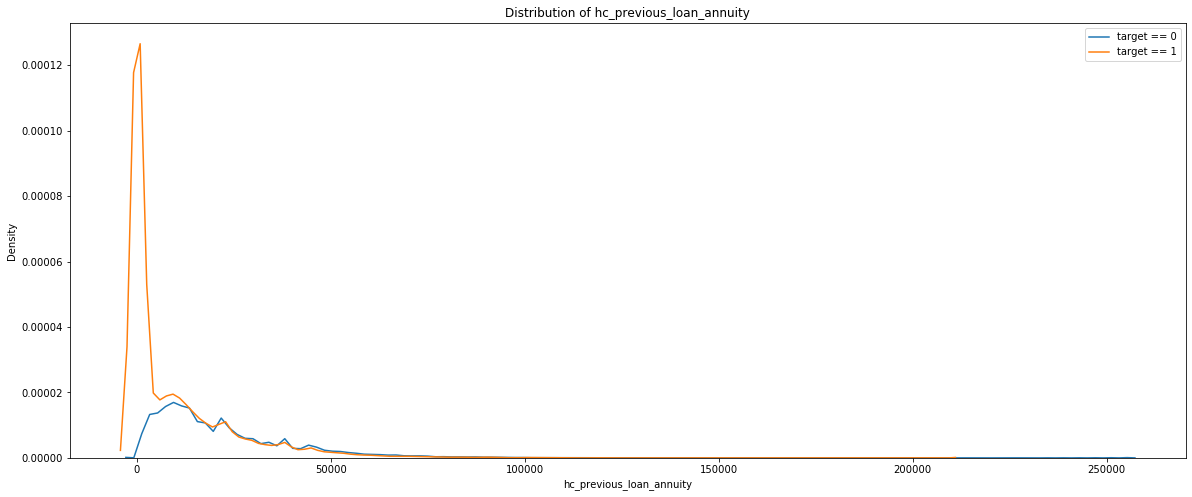

In [457]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'hc_previous_loan_annuity'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'hc_previous_loan_annuity'], label = 'target == 1')

# Labeling of plot
plt.xlabel('hc_previous_loan_annuity'); plt.ylabel('Density'); plt.title('Distribution of hc_previous_loan_annuity')

Text(0.5, 1.0, 'Distribution of hc_previous_loan_annuity_not_rl')

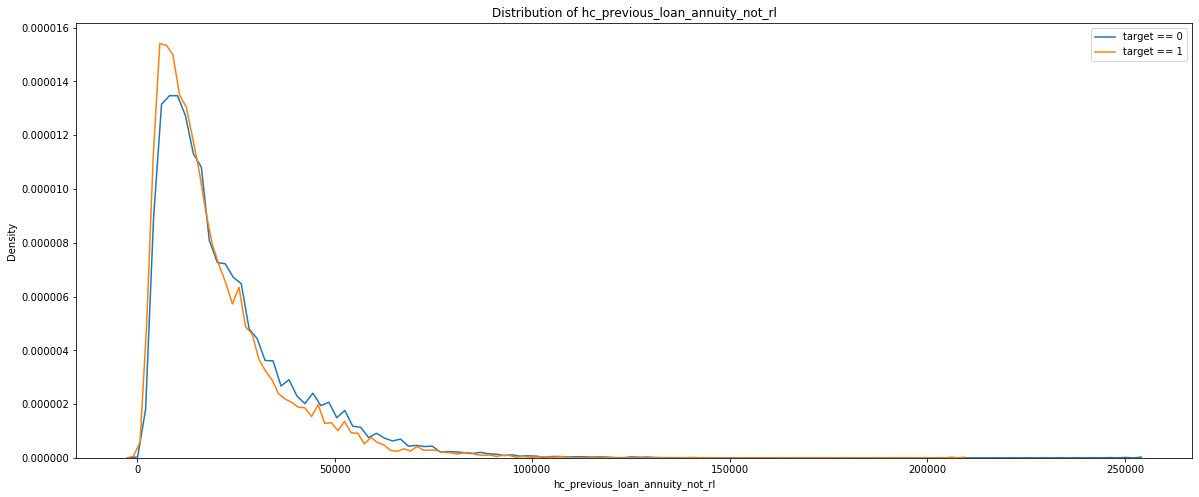

In [459]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'hc_previous_loan_annuity_not_rl'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'hc_previous_loan_annuity_not_rl'], label = 'target == 1')

# Labeling of plot
plt.xlabel('hc_previous_loan_annuity_not_rl'); plt.ylabel('Density'); plt.title('Distribution of hc_previous_loan_annuity_not_rl')

## Calcul du total des "annuity" précédentes

In [ ]:
hc_previous_loan_annuity + 

In [460]:
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100006       0         Cash loans           F            N   
3           100007       0         Cash loans           M            N   
4           100008       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
278214      456251       0         Cash loans           M            N   
278215      456252       0         Cash loans           F            N   
278216      456253       0         Cash loans           F            N   
278217      456254       1         Cash loans           F            N   
278218      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0          135000.0    312682.5   
3                    Y             0          121500.0    513000.0   
4                    Y             0           99000.0    490495.5   
...                ...           ...               ...         ...   
278214               N             0          157500.0    254700.0   
278215               Y             0           72000.0    269550.0   
278216               Y             0          153000.0    677664.0   
278217               Y             0          171000.0    370107.0   
278218               N             0          157500.0    675000.0   

        AMT_GOODS_PRICE  AMT_ANNUITY_x      NAME_INCOME_TYPE  \
0              351000.0        24700.5               Working   
1             1129500.0        35698.5         State servant   
2              297000.0        29686.5               Working   
3              513000.0        21865.5               Working   
4              454500.0        27517.5         State servant   
...                 ...            ...                   ...   
278214         225000.0        27558.0               Working   
278215         225000.0        12001.5             Pensioner   
278216         585000.0        29979.0               Working   
278217         319500.0        20205.0  Commercial associate   
278218         675000.0        49117.5  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special        Civil marriage   
3       Secondary / secondary special  Single / not married   
4       Secondary / secondary special               Married   
...                               ...                   ...   
278214  Secondary / secondary special             Separated   
278215  Secondary / secondary special                 Widow   
278216               Higher education             Separated   
278217  Secondary / secondary special               Married   
278218               Higher education               Married   

        NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  \
0       House / apartment       -9461           -637              1.0   
1       House / apartment      -16765          -1188              2.0   
2       House / apartment      -19005          -3039              2.0   
3       House / apartment      -19932          -3038              1.0   
4       House / apartment      -16941          -1588              2.0   
...                   ...         ...            ...              ...   
278214       With parents       -9327           -236              1.0   
278215  House / apartment      -20775         365243              1.0   
278216  House / apartment      -14966          -7921              1.0   
278217  House / apartm

In [467]:
del df['AMT_ANNUITY_y']

In [465]:
with open('data/df.pickle', 'wb') as output:
    pickle.dump(df, output)

In [470]:
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100006       0         Cash loans           F            N   
3           100007       0         Cash loans           M            N   
4           100008       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
278214      456251       0         Cash loans           M            N   
278215      456252       0         Cash loans           F            N   
278216      456253       0         Cash loans           F            N   
278217      456254       1         Cash loans           F            N   
278218      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0          135000.0    312682.5   
3                    Y             0          121500.0    513000.0   
4                    Y             0           99000.0    490495.5   
...                ...           ...               ...         ...   
278214               N             0          157500.0    254700.0   
278215               Y             0           72000.0    269550.0   
278216               Y             0          153000.0    677664.0   
278217               Y             0          171000.0    370107.0   
278218               N             0          157500.0    675000.0   

        AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0              351000.0               Working  Secondary / secondary special   
1             1129500.0         State servant               Higher education   
2              297000.0               Working  Secondary / secondary special   
3              513000.0               Working  Secondary / secondary special   
4              454500.0         State servant  Secondary / secondary special   
...                 ...                   ...                            ...   
278214         225000.0               Working  Secondary / secondary special   
278215         225000.0             Pensioner  Secondary / secondary special   
278216         585000.0               Working               Higher education   
278217         319500.0  Commercial associate  Secondary / secondary special   
278218         675000.0  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0       Single / not married  House / apartment       -9461           -637   
1                    Married  House / apartment      -16765          -1188   
2             Civil marriage  House / apartment      -19005          -3039   
3       Single / not married  House / apartment      -19932          -3038   
4                    Married  House / apartment      -16941          -1588   
...                      ...                ...         ...            ...   
278214             Separated       With parents       -9327           -236   
278215                 Widow  House / apartment      -20775         365243   
278216             Separated  House / apartment      -14966          -7921   
278217               Married  House / apartment      -11961          -4786   
278218               Married  House / apartment      -16856          -1262   

        CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                   1.0                     2                            2   
1                   2.0                     1                            1   
2                   2.0                     2                            2   
3                   1.0                     2                       

In [468]:
df['loan_total_annuity'] = df.previous_loan_active_annuity_sum + df.hc_previous_loan_annuity + df.AMT_ANNUITY

Text(0.5, 1.0, 'Distribution of loan_total_annuity')

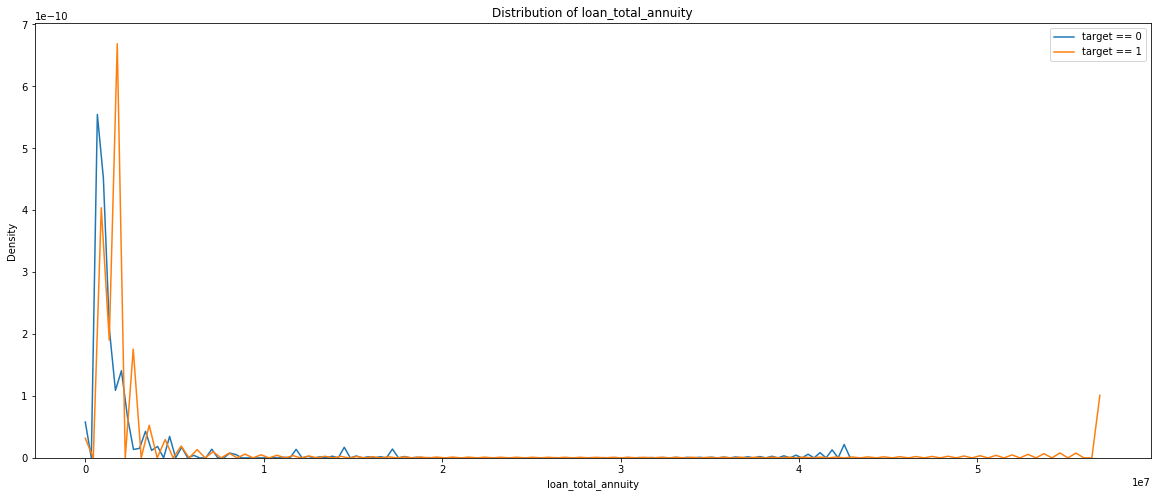

In [469]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'loan_total_annuity'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'loan_total_annuity'], label = 'target == 1')

# Labeling of plot
plt.xlabel('loan_total_annuity'); plt.ylabel('Density'); plt.title('Distribution of loan_total_annuity')

In [471]:
df['TOTAL_ANNUITY_INCOME_PERCENT'] = df['loan_total_annuity'] / df['AMT_INCOME_TOTAL']*100

Text(0.5, 1.0, 'Distribution of TOTAL_ANNUITY_INCOME_PERCENT')

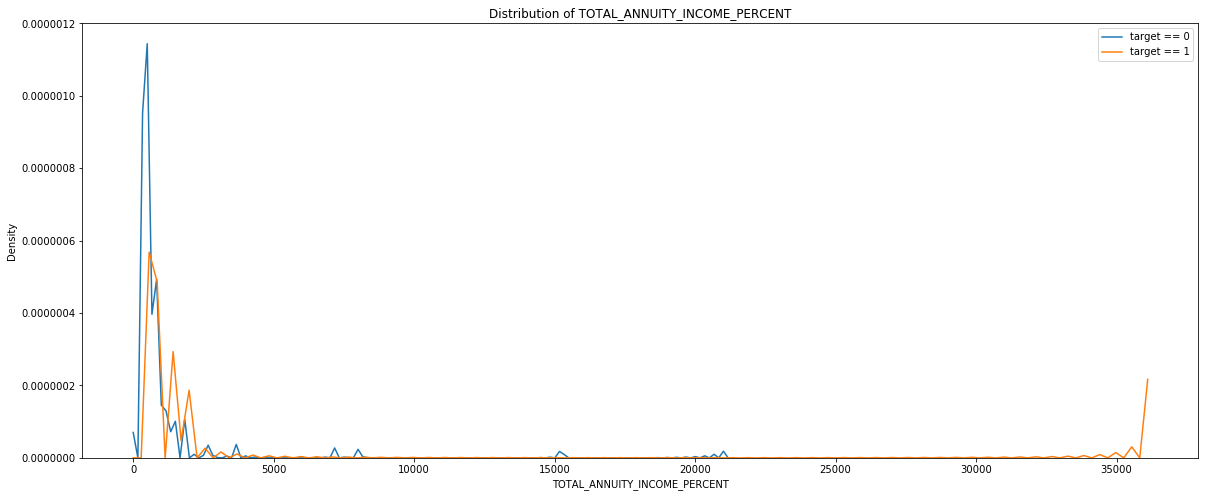

In [472]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'TOTAL_ANNUITY_INCOME_PERCENT'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'TOTAL_ANNUITY_INCOME_PERCENT'], label = 'target == 1')

# Labeling of plot
plt.xlabel('TOTAL_ANNUITY_INCOME_PERCENT'); plt.ylabel('Density'); plt.title('Distribution of TOTAL_ANNUITY_INCOME_PERCENT')

In [474]:
df[['ANNUITY_INCOME_PERCENT','TOTAL_ANNUITY_INCOME_PERCENT']]

ANNUITY_INCOME_PERCENT  TOTAL_ANNUITY_INCOME_PERCENT
0                    12.197778                     12.197778
1                    13.221667                     13.221667
2                    21.990000                     53.491867
3                    17.996296                     31.196000
4                    27.795455                     27.795455
...                        ...                           ...
278214               17.497143                     17.497143
278215               16.668750                     16.668750
278216               19.594118                     57.744118
278217               11.815789                     24.308342
278218               31.185714                     33.245714

[278219 rows x 2 columns]

In [493]:
df['RESTE_A_VIVRE_PERS'] = (df['AMT_INCOME_TOTAL'] - df['loan_total_annuity']) / df['CNT_FAM_MEMBERS']

Text(0.5, 1.0, 'Distribution of RESTE_A_VIVRE_PERS')

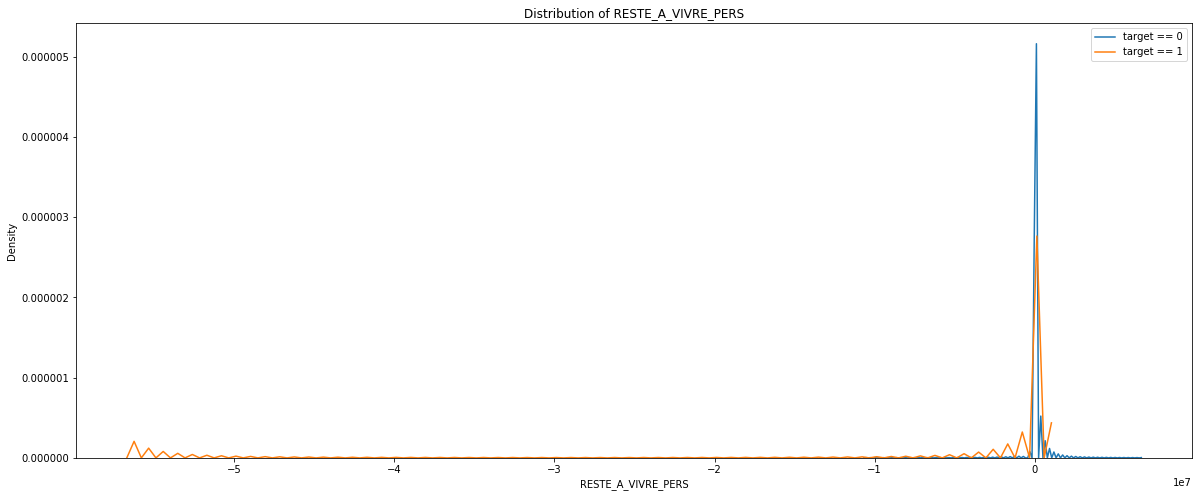

In [494]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'RESTE_A_VIVRE_PERS'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'RESTE_A_VIVRE_PERS'], label = 'target == 1')

# Labeling of plot
plt.xlabel('RESTE_A_VIVRE_PERS'); plt.ylabel('Density'); plt.title('Distribution of RESTE_A_VIVRE_PERS')

In [477]:
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100006       0         Cash loans           F            N   
3           100007       0         Cash loans           M            N   
4           100008       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
278214      456251       0         Cash loans           M            N   
278215      456252       0         Cash loans           F            N   
278216      456253       0         Cash loans           F            N   
278217      456254       1         Cash loans           F            N   
278218      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0          135000.0    312682.5   
3                    Y             0          121500.0    513000.0   
4                    Y             0           99000.0    490495.5   
...                ...           ...               ...         ...   
278214               N             0          157500.0    254700.0   
278215               Y             0           72000.0    269550.0   
278216               Y             0          153000.0    677664.0   
278217               Y             0          171000.0    370107.0   
278218               N             0          157500.0    675000.0   

        AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0              351000.0               Working  Secondary / secondary special   
1             1129500.0         State servant               Higher education   
2              297000.0               Working  Secondary / secondary special   
3              513000.0               Working  Secondary / secondary special   
4              454500.0         State servant  Secondary / secondary special   
...                 ...                   ...                            ...   
278214         225000.0               Working  Secondary / secondary special   
278215         225000.0             Pensioner  Secondary / secondary special   
278216         585000.0               Working               Higher education   
278217         319500.0  Commercial associate  Secondary / secondary special   
278218         675000.0  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0       Single / not married  House / apartment       -9461           -637   
1                    Married  House / apartment      -16765          -1188   
2             Civil marriage  House / apartment      -19005          -3039   
3       Single / not married  House / apartment      -19932          -3038   
4                    Married  House / apartment      -16941          -1588   
...                      ...                ...         ...            ...   
278214             Separated       With parents       -9327           -236   
278215                 Widow  House / apartment      -20775         365243   
278216             Separated  House / apartment      -14966          -7921   
278217               Married  House / apartment      -11961          -4786   
278218               Married  House / apartment      -16856          -1262   

        CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                   1.0                     2                            2   
1                   2.0                     1                            1   
2                   2.0                     2                            2   
3                   1.0                     2                       

In [492]:
df['RESTE_A_VIVRE'] = (df['AMT_INCOME_TOTAL'] - df['loan_total_annuity'])

Text(0.5, 1.0, 'Distribution of RESTE_A_VIVRE')

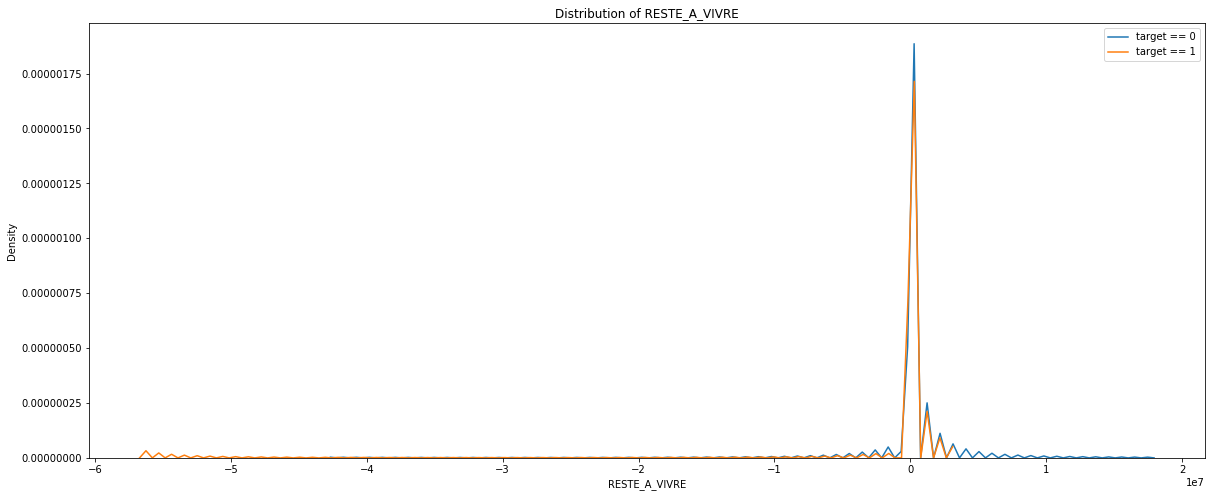

In [495]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'RESTE_A_VIVRE'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'RESTE_A_VIVRE'], label = 'target == 1')

# Labeling of plot
plt.xlabel('RESTE_A_VIVRE'); plt.ylabel('Density'); plt.title('Distribution of RESTE_A_VIVRE')

In [503]:
df['TARGET'][df['RESTE_A_VIVRE']<0].value_counts()

0    2393
1     340
Name: TARGET, dtype: int64

In [496]:

df['TARGET'][df['RESTE_A_VIVRE_PERS']<0].value_counts()

0    2393
1     340
Name: TARGET, dtype: int64

In [498]:
df[df['RESTE_A_VIVRE_PERS']<0]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
54          100076       0         Cash loans           M            Y   
130         100180       0         Cash loans           F            N   
204         100273       1         Cash loans           F            N   
237         100315       0         Cash loans           F            Y   
268         100349       0         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
277717      455639       0         Cash loans           M            Y   
277828      455777       0         Cash loans           M            Y   
277954      455933       0         Cash loans           F            N   
278083      456088       1         Cash loans           F            Y   
278188      456218       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
54                   N             0          180000.0    315000.0   
130                  Y             1          315000.0   1288350.0   
204                  Y             0          157500.0   1710000.0   
237                  Y             1          121500.0    288873.0   
268                  N             0          108000.0    364896.0   
...                ...           ...               ...         ...   
277717               Y             0           90000.0    505066.5   
277828               Y             0           90000.0    970380.0   
277954               N             1          225000.0   1078200.0   
278083               Y             0           29250.0    663093.0   
278188               Y             0          225000.0   1125000.0   

        AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
54             315000.0  Commercial associate  Secondary / secondary special   
130           1125000.0  Commercial associate               Higher education   
204           1710000.0               Working  Secondary / secondary special   
237            238500.0               Working               Higher education   
268            315000.0             Pensioner  Secondary / secondary special   
...                 ...                   ...                            ...   
277717         468000.0             Pensioner  Secondary / secondary special   
277828         810000.0               Working              Incomplete higher   
277954         900000.0               Working  Secondary / secondary special   
278083         553500.0             Pensioner  Secondary / secondary special   
278188        1125000.0  Commercial associate               Higher education   

       NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
54                Married    House / apartment      -13866          -2546   
130               Married    House / apartment      -15581          -4940   
204               Married    House / apartment      -23127          -9274   
237               Married    House / apartment      -10203            -59   
268                 Widow  Municipal apartment      -23338         365243   
...                   ...                  ...         ...            ...   
277717            Married    House / apartment      -20163         365243   
277828            Married         With parents      -12301          -2745   
277954            Married    House / apartment      -12569          -2566   
278083            Married    House / apartment      -20086         365243   
278188            Married    House / apartment      -19471          -1864   

        CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
54                  2.0                     2                            2   
130                 3.0                     3                            2   
204                 2.0                     2                            2   
237                 3.0                     3                            3   
26

# Aggregation de installments_payments.csv

In [500]:
# Training data
installments_payments = pd.read_csv('D:/openclassrooms/PROJET 7/DATA/installments_payments.csv')
print('installments_payments shape: ', installments_payments.shape)
installments_payments.head()

installments_payments shape:  (13605401, 8)


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [504]:

missing_values = missing_values_table(installments_payments)
missing_values

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


Missing Values  % of Total Values
DAYS_ENTRY_PAYMENT            2905                0.0
AMT_PAYMENT                   2905                0.0

In [505]:
installments_payments[installments_payments.SK_ID_CURR == 161674]

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
0           1054186      161674                     1.0   
44807       2452854      161674                     1.0   
47438       1054186      161674                     1.0   
66454       1682318      161674                     1.0   
87379       2452854      161674                     1.0   
138614      1054186      161674                     1.0   
216905      1054186      161674                     1.0   
247928      2452854      161674                     1.0   
284969      1644291      161674                     1.0   
425089      1054186      161674                     1.0   
438555      2524148      161674                     1.0   
489749      2841573      161674                     1.0   
577850      1054186      161674                     1.0   
581223      2841573      161674                     1.0   
585836      2524148      161674                     1.0   
588168      1682318      161674                     1.0   
614294      1065354      161674                     2.0   
667782      1588995      161674                     1.0   
669275      1644291      161674                     1.0   
708824      1588995      161674                     1.0   
728737      2452854      161674                     1.0   
742727      2452854      161674                     1.0   
778085      2452854      161674                     1.0   
785712      2452854      161674                     1.0   
819151      2841573      161674                     1.0   
831532      1294823      161674                     2.0   
874924      2452854      161674                     1.0   
898625      1644291      161674                     1.0   
912742      2524148      161674                     1.0   
951171      1588995      161674                     1.0   
1006147     2841573      161674                     1.0   
1010162     1644291      161674                     1.0   
1038640     1054186      161674                     1.0   
1064107     2452854      161674                     1.0   
1092004     2452854      161674                     1.0   
1128187     1054186      161674                     1.0   
1141035     1644291      161674                     1.0   
1168850     1588995      161674                     1.0   
1307914     1644291      161674                     1.0   
1347951     2841573      161674                     1.0   
1364128     2524148      161674                     1.0   
1402152     1054186      161674                     1.0   
1608829     1054186      161674                     1.0   
1614970     1588995      161674                     1.0   
1697401     2452854      161674                     1.0   
1745693     2841573      161674                     1.0   
1747613     1644291      161674                     1.0   
1795608     2452854      161674                     1.0   
1842575     1682318      161674                     1.0   
1844388     1682318      161674                     1.0   
1865014     1682318      161674                     1.0   
1877113     2452854      161674                     1.0   
1878142     2452854      161674                     1.0   
1878907     1054186      161674                     1.0   
1894799     2524148      161674                     1.0   
1932621     2452854      161674                     1.0   
1970883     1644291      161674                     1.0   
2053631     2452854      161674                     1.0   
2152079     1682318      161674                     2.0   
2207053     1644291      161674                     1.0   
2210527     1644291      161674                     1.0   
2315826     1294823      161674                     1.0   
2350879     2452854      161674                     1.0   
2407765     2841573      161674                     1.0   
2456163     2841573      161674                     1.0   
2479237     2452854      161674                     1.0   
2525219     2452854      161674                     1.0 

In [510]:
installments_payments[installments_payments.SK_ID_CURR == 167756]

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
4           2714724      167756                     1.0   
17936       1542252      167756                     1.0   
191218      1542252      167756                     1.0   
226902      1542252      167756                     1.0   
274754      1542252      167756                     1.0   
422906      2714724      167756                     1.0   
435152      1542252      167756                     1.0   
493387      1542251      167756                     1.0   
575826      1542251      167756                     1.0   
646233      1542251      167756                     1.0   
736036      1542252      167756                     1.0   
1432701     1542251      167756                     1.0   
1502618     1542252      167756                     1.0   
1669376     1542252      167756                     1.0   
1786772     2714724      167756                     1.0   
1963730     1542252      167756                     1.0   
1983293     1542251      167756                     1.0   
1996388     1542252      167756                     1.0   
2192088     1542251      167756                     1.0   
2201494     2714724      167756                     2.0   
2370923     1542251      167756                     2.0   
2534092     1542252      167756                     1.0   
2638013     1542252      167756                     1.0   
2785125     1542252      167756                     1.0   
2843935     2714724      167756                     1.0   
2998490     2714724      167756                     1.0   
3104836     1542252      167756                     2.0   
3391243     1542252      167756                     1.0   
3633932     1542252      167756                     1.0   
3658570     1542252      167756                     1.0   

         NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
4                            2          -1383.0             -1366.0   
17936                        9           -807.0              -805.0   
191218                       7           -867.0              -862.0   
226902                       4           -957.0              -957.0   
274754                       1          -1047.0             -1044.0   
422906                       3          -1353.0             -1366.0   
435152                      10           -777.0              -771.0   
493387                       1          -1863.0             -1868.0   
575826                       6          -1713.0             -1716.0   
646233                       3          -1803.0             -1807.0   
736036                       5           -927.0              -926.0   
1432701                      4          -1773.0             -1778.0   
1502618                      3           -987.0              -988.0   
1669376                      7           -867.0              -889.0   
1786772                      2          -1383.0             -1421.0   
1963730                      6           -897.0              -889.0   
1983293                      5          -1743.0             -1743.0   
1996388                      6           -897.0              -926.0   
2192088                      2          -1833.0             -1835.0   
2201494                      4          -1323.0             -1336.0   
2370923                      7          -1683.0             -1703.0   
2534092                      8           -837.0              -833.0   
2638013                      8           -837.0              -862.0   
2785125                      1          -1047.0             -1077.0   
2843935                      1          -1413.0             -1421.0   
2998490                      3          -1353.0             -1336.0   
3104836                     11           -747.0              -771.0   
3391243                      2          -1017.0             -1018.0   
3633932                     10           -777.0              -805.0   
3658570                      9           -807.0  

In [ ]:
DAYS_INSTALMENT
DAYS_ENTRY_PAYMENT effectivement payé


In [511]:
installments_payments['DPD'] = installments_payments.DAYS_INSTALMENT - installments_payments.DAYS_ENTRY_PAYMENT

In [518]:
installments_payments[installments_payments.SK_ID_CURR == 110052]

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
3284        1685553      110052                     0.0   
10367       1685553      110052                     0.0   
33089       1730366      110052                     1.0   
39555       1685553      110052                     0.0   
59270       1685553      110052                     0.0   
70497       2127446      110052                     1.0   
70515       2346093      110052                     2.0   
72931       1685553      110052                     0.0   
137814      1730366      110052                     1.0   
140943      1850851      110052                     1.0   
149331      1685553      110052                     0.0   
156871      1685553      110052                     0.0   
161663      1685553      110052                     0.0   
188566      2127446      110052                     1.0   
191939      1685553      110052                     0.0   
270260      1730366      110052                     1.0   
304578      1730366      110052                     3.0   
315080      1685553      110052                     0.0   
315348      2127446      110052                     1.0   
331157      1685553      110052                     0.0   
344830      1685553      110052                     0.0   
365931      1685553      110052                     0.0   
464925      2346093      110052                     1.0   
535626      2127446      110052                     1.0   
549180      2127446      110052                     1.0   
638077      1685553      110052                     0.0   
642770      1685553      110052                     0.0   
657960      1685553      110052                     0.0   
706877      1685553      110052                     0.0   
722506      1730366      110052                     1.0   
761228      1850851      110052                     1.0   
769512      1685553      110052                     0.0   
770012      1850851      110052                     1.0   
814796      1730366      110052                     1.0   
817014      1685553      110052                     0.0   
834349      1685553      110052                     0.0   
910063      1605193      110052                     1.0   
963864      1605193      110052                     1.0   
1011806     2127446      110052                     1.0   
1046043     1685553      110052                     0.0   
1048171     1685553      110052                     0.0   
1057760     1730366      110052                     1.0   
1061143     1850851      110052                     1.0   
1066760     2346093      110052                     1.0   
1113990     1730366      110052                     1.0   
1131015     1685553      110052                     0.0   
1157712     1685553      110052                     0.0   
1161474     1730366      110052                     1.0   
1182384     1685553      110052                     0.0   
1199757     1685553      110052                     0.0   
1214781     1685553      110052                     0.0   
1215508     1685553      110052                     0.0   
1229199     1685553      110052                     0.0   
1233360     1730366      110052                     1.0   
1244400     1685553      110052                     0.0   
1249834     1605193      110052                     1.0   
1255657     2127446      110052                     1.0   
1270587     1605193      110052                     1.0   
1290474     1685553      110052                     0.0   
1332071     1730366      110052                     1.0   
1341549     1685553      110052                     0.0   
1383760     1685553      110052                     0.0   
1456841     2346093      110052                     1.0   
1473901     1685553      110052                     0.0   
1531655     2346093      110052                     1.0   
1538028     1685553      110052                     0.0   
1545705     1685553      110052                     0.0 

In [513]:
installments_payments['DPD'].describe()

count    1.360250e+07
mean     8.787405e+00
std      2.553990e+01
min     -2.884000e+03
25%      0.000000e+00
50%      6.000000e+00
75%      1.400000e+01
max      3.189000e+03
Name: DPD, dtype: float64

In [515]:
installments_payments[installments_payments.DPD >=60]

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
56           1423667      195138                     1.0   
198          1686577      198644                     1.0   
206          1056824      121174                     1.0   
480          2578286      100736                     1.0   
608          2832192      181913                     1.0   
...              ...         ...                     ...   
13605110     1268641      444278                     1.0   
13605221     2740906      415737                     1.0   
13605224     2775600      417286                     1.0   
13605230     2565443      444715                     1.0   
13605303     1710384      415168                     1.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
56                           19           -255.0              -324.0   
198                          18            -87.0              -316.0   
206                           4          -2416.0             -2490.0   
480                           9          -1178.0             -1264.0   
608                           4          -1375.0             -1448.0   
...                         ...              ...                 ...   
13605110                     19          -2302.0             -2367.0   
13605221                      6          -1603.0             -1681.0   
13605224                      4            -93.0              -192.0   
13605230                      2           -688.0              -748.0   
13605303                      4           -207.0              -299.0   

          AMT_INSTALMENT  AMT_PAYMENT    DPD  
56              3494.835     3494.835   69.0  
198             4905.360     4905.360  229.0  
206            11109.870    11109.870   74.0  
480            21231.135    21231.135   86.0  
608             1445.220     1445.220   73.0  
...                  ...          ...    ...  
13605110        2406.735     2406.735   65.0  
13605221        4438.305     4438.305   78.0  
13605224        6436.530     6436.530   99.0  
13605230       11913.840    11913.840   60.0  
13605303        9167.265     9167.265   92.0  

[150127 rows x 9 columns]

In [520]:
installments_payments[installments_payments.AMT_PAYMENT<installments_payments.AMT_INSTALMENT]

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
4            2714724      167756                     1.0   
17           1410565      197687                     1.0   
30           1840786      175114                     1.0   
40           2270983      159586                     0.0   
47           1895324      131465                     1.0   
...              ...         ...                     ...   
13605277     2805513      423850                     1.0   
13605292     1575367      420879                     1.0   
13605319     2003162      450999                     1.0   
13605340     1635645      417079                     1.0   
13605345     1126000      428449                     0.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
4                             2          -1383.0             -1366.0   
17                            1          -1037.0             -1048.0   
30                           11           -476.0              -474.0   
40                           30          -2022.0             -2046.0   
47                            6          -1386.0             -1379.0   
...                         ...              ...                 ...   
13605277                      3          -1606.0             -1634.0   
13605292                     12           -341.0              -373.0   
13605319                     16          -2135.0             -2113.0   
13605340                      1          -2221.0             -2215.0   
13605345                     12           -301.0              -302.0   

          AMT_INSTALMENT  AMT_PAYMENT   DPD  
4               2165.040     2160.585 -17.0  
17             12514.050    12510.450  11.0  
30             21179.700    21161.700  -2.0  
40              9000.000     1800.000  24.0  
47              3229.065     3212.865  -7.0  
...                  ...          ...   ...  
13605277        3128.625        6.750  28.0  
13605292       59800.545      602.820  32.0  
13605319        5414.265     5384.880 -22.0  
13605340        9914.850     9010.485  -6.0  
13605345        6793.470     6750.000   1.0  

[1295493 rows x 9 columns]

In [521]:
installments_payments[installments_payments.AMT_PAYMENT<(installments_payments.AMT_INSTALMENT)/2]

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
40           2270983      159586                     0.0   
48           2411245      153352                     1.0   
50           1220449      136423                     1.0   
52           2726751      182114                     1.0   
81           1762261      151682                     0.0   
...              ...         ...                     ...   
13605200     1182721      444597                     0.0   
13605204     1751470      427793                     1.0   
13605246     1233668      415676                     1.0   
13605277     2805513      423850                     1.0   
13605292     1575367      420879                     1.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
40                           30          -2022.0             -2046.0   
48                            1          -2588.0             -2555.0   
50                           16            -61.0               -89.0   
52                           20          -1066.0             -1091.0   
81                           59            -45.0               -48.0   
...                         ...              ...                 ...   
13605200                     46          -1654.0             -1642.0   
13605204                     11          -1844.0             -1890.0   
13605246                     12          -2192.0             -2189.0   
13605277                      3          -1606.0             -1634.0   
13605292                     12           -341.0              -373.0   

          AMT_INSTALMENT  AMT_PAYMENT   DPD  
40              9000.000     1800.000  24.0  
48              3294.900      650.520 -33.0  
50             34717.500     2675.745  28.0  
52             10770.750      499.500  25.0  
81              1087.245      356.805   3.0  
...                  ...          ...   ...  
13605200        9000.000      360.000 -12.0  
13605204        9030.420       64.800  46.0  
13605246        4871.475     2167.965  -3.0  
13605277        3128.625        6.750  28.0  
13605292       59800.545      602.820  32.0  

[654072 rows x 9 columns]

## Variable hc_dpd_bad

In [522]:
installments_payments['DPD_BAD'] = 0

In [523]:
installments_payments['DPD_BAD'][installments_payments.DPD >=60] =1

In [524]:
hc_dpd_bad = installments_payments.groupby('SK_ID_CURR', as_index=False)[
    'DPD_BAD'].sum().rename(columns={'DPD_BAD': 'hc_dpd_bad'})
hc_dpd_bad.head()

SK_ID_CURR  hc_dpd_bad
0      100001           0
1      100002           0
2      100003           0
3      100004           0
4      100005           0

In [527]:
installments_payments['DPD_BAD'].value_counts()

0    13455274
1      150127
Name: DPD_BAD, dtype: int64

In [528]:
# Join to the training dataframe
df = df.merge(hc_dpd_bad, on = 'SK_ID_CURR', how = 'left')
# Fill the missing values with 0 
df['hc_dpd_bad'] = df['hc_dpd_bad'].fillna(0)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100006       0         Cash loans           F            N   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0          135000.0    312682.5   
3               Y             0          121500.0    513000.0   
4               Y             0           99000.0    490495.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         297000.0          Working  Secondary / secondary special   
3         513000.0          Working  Secondary / secondary special   
4         454500.0    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2        Civil marriage  House / apartment      -19005          -3039   
3  Single / not married  House / apartment      -19932          -3038   
4               Married  House / apartment      -16941          -1588   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              2.0                     2                            2   
3              1.0                     2                            2   
4              2.0                     2                            2   

   LENGTH_CREDIT  CREDIT_INCOME_PERCENT  ANNUITY_INCOME_PERCENT  YEARS_BIRTH  \
0      16.461104             200.788889               12.197778           25   
1      36.234085             479.075000               13.221667           45   
2      10.532818             231.616667               21.990000           52   
3      23.461618             422.222222               17.996296           54   
4      17.824857             495.450000               27.795455           46   

   YEARS_EMPLOYED  DAYS_EMPLOYED_PERCENT  INCOME_PER_PERSON  \
0        1.745205               6.732903           202500.0   
1        3.254795               7.086191           135000.0   
2        8.326027              15.990529            67500.0   
3        8.323288              15.241822           121500.0   
4        4.350685               9.373709            49500.0   

   previous_loan_counts  previous_loan_active_credit_sum  STATUS_0  STATUS_1  \
0                   8.0                       481988.565      45.0      27.0   
1                   4.0                       810000.000       0.0       0.0   
2                   0.0                            0.000       0.0       0.0   
3                   1.0                            0.000       0.0       0.0   
4                   3.0                       267606.000       0.0       0.0   

   STATUS_2  STATUS_3  STATUS_4  STATUS_5  STATUS_BAD  credit_day_overdue_sum  \
0       0.0       0.0       0.0       0.0         0.0                     0.0   
1       0.0       0.0       0.0       0.0         0.0                     0.0   
2       0.0       0.0       0.0       0.0         0.0                     0.0   
3       0.0       0.0       0.0       0.0         0.0                     0.0   
4       0.0       0.0       0.0       0.0         0.0                     0.0   

   credit_day_overdue_mean  previous_loan_active_counts  AMT_ANNUITY  

Text(0.5, 1.0, 'Distribution of hc_dpd_bad')

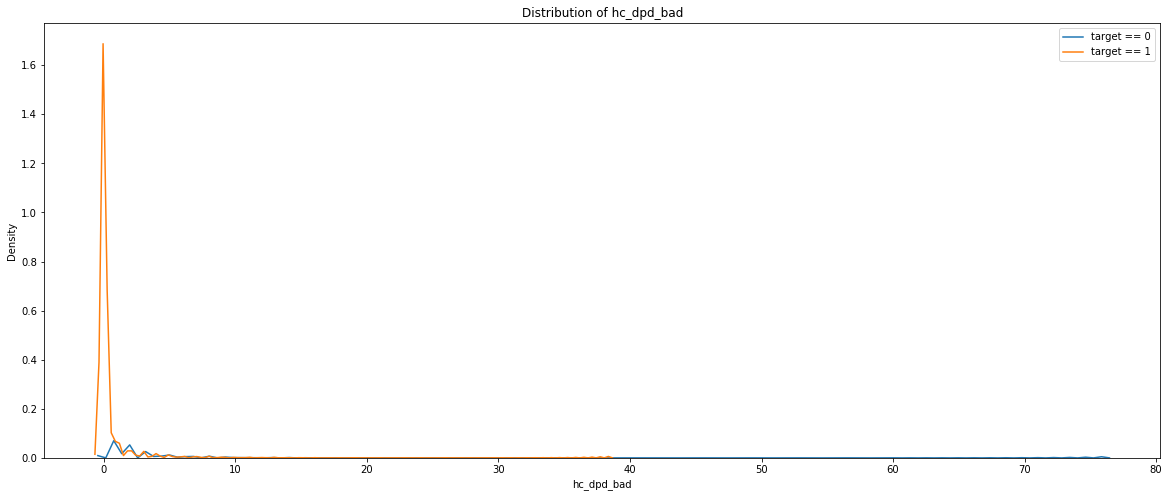

In [529]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'hc_dpd_bad'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'hc_dpd_bad'], label = 'target == 1')

# Labeling of plot
plt.xlabel('hc_dpd_bad'); plt.ylabel('Density'); plt.title('Distribution of hc_dpd_bad')

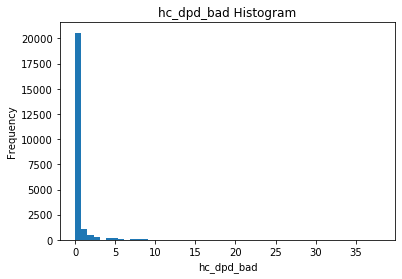

In [550]:
df['hc_dpd_bad'].loc[df['TARGET'] == 1].plot.hist(title = 'hc_dpd_bad Histogram',bins=50);
plt.xlabel('hc_dpd_bad');

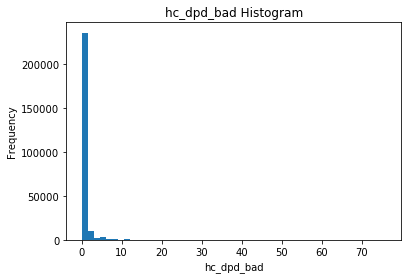

In [551]:
df['hc_dpd_bad'].loc[df['TARGET'] == 0].plot.hist(title = 'hc_dpd_bad Histogram',bins=50);
plt.xlabel('hc_dpd_bad');

## Variable hc_payment_bad

In [532]:
installments_payments['BAD_PAYMENT'] = 0

In [535]:
installments_payments['BAD_PAYMENT'][installments_payments.AMT_PAYMENT<(installments_payments.AMT_INSTALMENT)/2] = 1

In [534]:
installments_payments[installments_payments.AMT_PAYMENT<(installments_payments.AMT_INSTALMENT)/2]

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
40           2270983      159586                     0.0   
48           2411245      153352                     1.0   
50           1220449      136423                     1.0   
52           2726751      182114                     1.0   
81           1762261      151682                     0.0   
...              ...         ...                     ...   
13605200     1182721      444597                     0.0   
13605204     1751470      427793                     1.0   
13605246     1233668      415676                     1.0   
13605277     2805513      423850                     1.0   
13605292     1575367      420879                     1.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
40                           30          -2022.0             -2046.0   
48                            1          -2588.0             -2555.0   
50                           16            -61.0               -89.0   
52                           20          -1066.0             -1091.0   
81                           59            -45.0               -48.0   
...                         ...              ...                 ...   
13605200                     46          -1654.0             -1642.0   
13605204                     11          -1844.0             -1890.0   
13605246                     12          -2192.0             -2189.0   
13605277                      3          -1606.0             -1634.0   
13605292                     12           -341.0              -373.0   

          AMT_INSTALMENT  AMT_PAYMENT   DPD  DPD_BAD  BAD_PAYMENT  
40              9000.000     1800.000  24.0        0            0  
48              3294.900      650.520 -33.0        0            0  
50             34717.500     2675.745  28.0        0            0  
52             10770.750      499.500  25.0        0            0  
81              1087.245      356.805   3.0        0            0  
...                  ...          ...   ...      ...          ...  
13605200        9000.000      360.000 -12.0        0            0  
13605204        9030.420       64.800  46.0        0            0  
13605246        4871.475     2167.965  -3.0        0            0  
13605277        3128.625        6.750  28.0        0            0  
13605292       59800.545      602.820  32.0        0            0  

[654072 rows x 11 columns]

In [536]:
hc_payment_bad = installments_payments.groupby('SK_ID_CURR', as_index=False)[
    'BAD_PAYMENT'].sum().rename(columns={'BAD_PAYMENT': 'hc_payment_bad'})
hc_payment_bad.head()

SK_ID_CURR  hc_payment_bad
0      100001               0
1      100002               0
2      100003               0
3      100004               0
4      100005               0

In [537]:
# Join to the training dataframe
df = df.merge(hc_payment_bad, on = 'SK_ID_CURR', how = 'left')
# Fill the missing values with 0 
df['hc_payment_bad'] = df['hc_payment_bad'].fillna(0)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100006       0         Cash loans           F            N   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0          135000.0    312682.5   
3               Y             0          121500.0    513000.0   
4               Y             0           99000.0    490495.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         297000.0          Working  Secondary / secondary special   
3         513000.0          Working  Secondary / secondary special   
4         454500.0    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2        Civil marriage  House / apartment      -19005          -3039   
3  Single / not married  House / apartment      -19932          -3038   
4               Married  House / apartment      -16941          -1588   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              2.0                     2                            2   
3              1.0                     2                            2   
4              2.0                     2                            2   

   LENGTH_CREDIT  CREDIT_INCOME_PERCENT  ANNUITY_INCOME_PERCENT  YEARS_BIRTH  \
0      16.461104             200.788889               12.197778           25   
1      36.234085             479.075000               13.221667           45   
2      10.532818             231.616667               21.990000           52   
3      23.461618             422.222222               17.996296           54   
4      17.824857             495.450000               27.795455           46   

   YEARS_EMPLOYED  DAYS_EMPLOYED_PERCENT  INCOME_PER_PERSON  \
0        1.745205               6.732903           202500.0   
1        3.254795               7.086191           135000.0   
2        8.326027              15.990529            67500.0   
3        8.323288              15.241822           121500.0   
4        4.350685               9.373709            49500.0   

   previous_loan_counts  previous_loan_active_credit_sum  STATUS_0  STATUS_1  \
0                   8.0                       481988.565      45.0      27.0   
1                   4.0                       810000.000       0.0       0.0   
2                   0.0                            0.000       0.0       0.0   
3                   1.0                            0.000       0.0       0.0   
4                   3.0                       267606.000       0.0       0.0   

   STATUS_2  STATUS_3  STATUS_4  STATUS_5  STATUS_BAD  credit_day_overdue_sum  \
0       0.0       0.0       0.0       0.0         0.0                     0.0   
1       0.0       0.0       0.0       0.0         0.0                     0.0   
2       0.0       0.0       0.0       0.0         0.0                     0.0   
3       0.0       0.0       0.0       0.0         0.0                     0.0   
4       0.0       0.0       0.0       0.0         0.0                     0.0   

   credit_day_overdue_mean  previous_loan_active_counts  AMT_ANNUITY  

Text(0.5, 1.0, 'Distribution of hc_payment_bad')

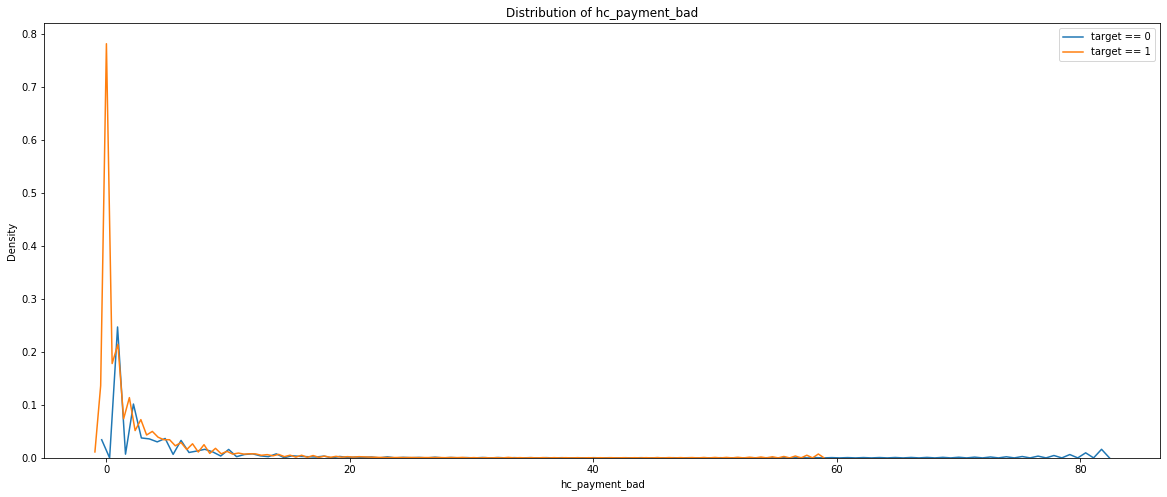

In [538]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'hc_payment_bad'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'hc_payment_bad'], label = 'target == 1')

# Labeling of plot
plt.xlabel('hc_payment_bad'); plt.ylabel('Density'); plt.title('Distribution of hc_payment_bad')

In [539]:
max(df.hc_payment_bad)

82.0

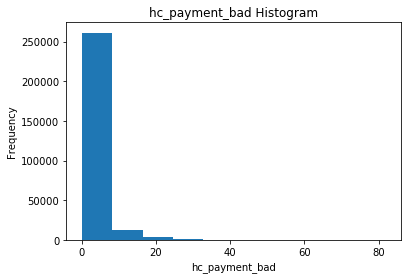

In [540]:
df['hc_payment_bad'].plot.hist(title = 'hc_payment_bad Histogram');
plt.xlabel('hc_payment_bad');

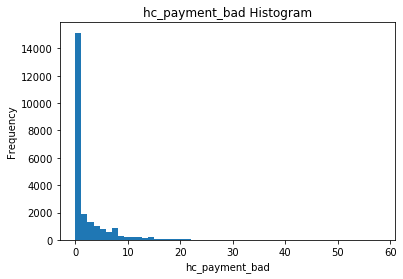

In [548]:
df['hc_payment_bad'].loc[df['TARGET'] == 1].plot.hist(title = 'hc_payment_bad Histogram',bins=50);
plt.xlabel('hc_payment_bad');

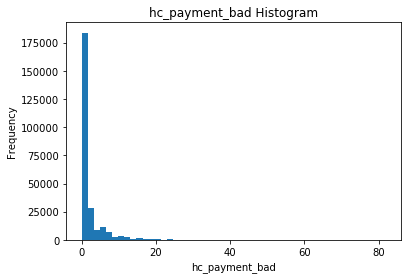

In [549]:
df['hc_payment_bad'].loc[df['TARGET'] == 0].plot.hist(title = 'hc_payment_bad Histogram',bins=50);
plt.xlabel('hc_payment_bad');

# Aggregation de POS_CASH_balance.csv

In [553]:
# Training data
POS_CASH_balance = pd.read_csv('D:/openclassrooms/PROJET 7/DATA/POS_CASH_balance.csv')
print('POS_CASH_balance shape: ', POS_CASH_balance.shape)
POS_CASH_balance.head()

POS_CASH_balance shape:  (10001358, 8)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [554]:
POS_CASH_balance.NAME_CONTRACT_STATUS.value_counts()

Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: NAME_CONTRACT_STATUS, dtype: int64

In [559]:
POS_CASH_balance[POS_CASH_balance.NAME_CONTRACT_STATUS=='Active'].SK_DPD_DEF.value_counts()

0      9040542
1        22120
2        14683
3        11648
4         9524
        ...   
592          1
593          1
599          1
601          1
440          1
Name: SK_DPD_DEF, Length: 773, dtype: int64

In [560]:
POS_CASH_balance[POS_CASH_balance.NAME_CONTRACT_STATUS=='Active'].SK_DPD_DEF.describe()

count    9.151119e+06
mean     1.423430e-01
std      6.648575e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.382000e+03
Name: SK_DPD_DEF, dtype: float64

In [566]:
POS_CASH_balance[POS_CASH_balance.NAME_CONTRACT_STATUS=='Signed'].SK_DPD_DEF.value_counts()

0     87218
1        14
2         7
4         4
19        3
3         3
13        2
5         2
23        1
21        1
18        1
16        1
10        1
7         1
6         1
Name: SK_DPD_DEF, dtype: int64

In [611]:
POS_CASH_balance.MONTHS_BALANCE.value_counts()

-10    216441
-11    216023
-9     215558
-12    214716
-8     214149
-13    210950
-7     210229
-14    208352
-6     206849
-15    204935
-5     200726
-16    200432
-17    195713
-4     193147
-18    190385
-19    184302
-3     183589
-20    179741
-21    173543
-2     169529
-22    167834
-23    162220
-24    155855
-25    148399
-26    142602
-27    136913
-28    131861
-29    127147
-30    122386
-31    117961
-32    114353
-33    110085
-34    106609
-35    103432
-36     99834
-37     96190
-1      94908
-38     93921
-39     92211
-40     90836
-41     90232
-42     89237
-43     88105
-44     87718
-45     86361
-46     85036
-47     82814
-48     81530
-49     80076
-50     78269
-51     76388
-52     75104
-53     73591
-54     71768
-55     70904
-56     69566
-57     67817
-58     66570
-74     65696
-75     65562
-73     65528
-72     65437
-76     65373
-59     65282
-77     65151
-71     64845
-78     64522
-70     64324
-60     63687
-79     63530
-69     63341
-61   

Je recupere le DDP superieur à 60j

In [567]:
POS_CASH_balance[POS_CASH_balance.SK_DPD_DEF >= 60]

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
5696        1388780      313548             -51            12.0   
17647       1566317      268078             -62             6.0   
34618       1332203      347587              -4            36.0   
41536       2683350      276351             -41             4.0   
85231       1560797      400552              -3            18.0   
...             ...         ...             ...             ...   
9997780     2491678      346408              -5             6.0   
9997784     2478336      358898              -8             6.0   
9998143     2528737      206789             -13             6.0   
9998633     2528737      206789              -2             6.0   
9998638     2478336      358898              -4             6.0   

         CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
5696                       3.0               Active      95          95  
17647                      0.0               Demand     134         134  
34618                     25.0               Active      72          72  
41536                      0.0               Demand     203         203  
85231                      0.0               Active      71          71  
...                        ...                  ...     ...         ...  
9997780                    0.0               Demand    2343        2343  
9997784                    0.0            Completed    2404        2404  
9998143                    0.0       Amortized debt    2776        2776  
9998633                    0.0       Amortized debt    3110        3110  
9998638                    0.0            Completed    2526        2526  

[4977 rows x 8 columns]

In [ ]:
POS_CASH_balance[POS_CASH_balance.SK_DPD_DEF >= 60]

In [568]:
POS_CASH_balance[POS_CASH_balance.SK_DPD >= 60]

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
2252         2562793      287880             -46             7.0   
3507         1290101      322484             -37             6.0   
3996         2002705      413918             -48             6.0   
4438         1184431      369596             -44             6.0   
5234         1526249      275666             -39            12.0   
...              ...         ...             ...             ...   
10001352     2700641      448867             -19             6.0   
10001353     2448283      226558             -20             6.0   
10001354     1717234      141565             -19            12.0   
10001355     1283126      315695             -21            10.0   
10001356     1082516      450255             -22            12.0   

          CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
2252                        0.0               Active    1105           0  
3507                        0.0               Active     329           0  
3996                        0.0               Active     146           0  
4438                        0.0               Active     173           0  
5234                        0.0               Active     798           0  
...                         ...                  ...     ...         ...  
10001352                    0.0               Active     843           0  
10001353                    0.0               Active     843           0  
10001354                    0.0               Active     602           0  
10001355                    0.0               Active     609           0  
10001356                    0.0               Active     614           0  

[124271 rows x 8 columns]

In [628]:
POS_CASH_balance[(POS_CASH_balance.MONTHS_BALANCE >= -1) & (POS_CASH_balance.CNT_INSTALMENT_FUTURE >1)]

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
701          2373788      146563              -1            12.0   
706          1328586      360581              -1            12.0   
735          1059231      187644              -1            24.0   
736          1627415      370458              -1             6.0   
737          2070143      417012              -1             6.0   
...              ...         ...             ...             ...   
9999500      1370387      175539              -1            24.0   
9999563      2088288      417444              -1            36.0   
10001004     2465369      301648              -1            36.0   
10001005     1262435      310762              -1            30.0   
10001007     1770731      418098              -1            36.0   

          CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  \
701                        12.0               Active       0           0   
706                        10.0               Active       0           0   
735                        21.0               Active       0           0   
736                         6.0               Active       0           0   
737                         5.0               Active       0           0   
...                         ...                  ...     ...         ...   
9999500                     3.0               Active       0           0   
9999563                     4.0               Active       0           0   
10001004                    6.0               Active       0           0   
10001005                    2.0               Active       0           0   
10001007                    4.0               Active       0           0   

          SK_DPD_BAD  
701                0  
706                0  
735                0  
736                0  
737                0  
...              ...  
9999500            0  
9999563            0  
10001004           0  
10001005           0  
10001007           0  

[79186 rows x 9 columns]

In [618]:
POS_CASH_balance[(POS_CASH_balance.MONTHS_BALANCE >= -1) &
                 (POS_CASH_balance.CNT_INSTALMENT_FUTURE > 0)].NAME_CONTRACT_STATUS.value_counts()

Active                   84817
Signed                     285
Demand                       6
Returned to the store        2
Name: NAME_CONTRACT_STATUS, dtype: int64

In [619]:
POS_CASH_balance.CNT_INSTALMENT_FUTURE.value_counts()

0.0     1185960
6.0      614058
4.0      613632
5.0      600295
3.0      582007
2.0      547199
1.0      512279
10.0     481390
8.0      480167
7.0      472665
9.0      467606
12.0     389585
11.0     376430
18.0     165735
17.0     159457
16.0     157022
15.0     151212
14.0     150588
13.0     143572
24.0     136742
23.0     130810
22.0     126621
21.0     122275
20.0     119339
19.0     115024
36.0      55228
30.0      53102
35.0      52659
34.0      50869
29.0      50258
33.0      48317
28.0      47590
32.0      45863
27.0      45104
31.0      43321
26.0      42555
25.0      40209
48.0      27587
47.0      26081
46.0      24933
42.0      23919
45.0      23520
41.0      22210
44.0      22049
40.0      20633
43.0      20533
39.0      19242
38.0      17937
37.0      16686
60.0      14476
59.0      13775
58.0      13389
57.0      12665
56.0      11980
54.0      11530
55.0      11154
53.0      10421
52.0       9482
51.0       8725
50.0       7951
49.0       7278
61.0         41
72.0    

In [621]:
POS_CASH_balance[(POS_CASH_balance.MONTHS_BALANCE >= -1) & (POS_CASH_balance.SK_DPD_DEF >60)].shape

(89, 9)

In [569]:
df[df['TARGET']== 1]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
21          100031       1         Cash loans           F            N   
33          100047       1         Cash loans           M            N   
35          100049       1         Cash loans           F            N   
67          100096       1         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
278160      456186       1         Cash loans           M            N   
278185      456215       1         Cash loans           F            N   
278191      456225       1         Cash loans           M            N   
278198      456233       1         Cash loans           F            N   
278217      456254       1         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
21                   Y             0          112500.0    979992.0   
33                   Y             0          202500.0   1193580.0   
35                   N             0          135000.0    288873.0   
67                   Y             0           81000.0    252000.0   
...                ...           ...               ...         ...   
278160               N             1          207000.0    450000.0   
278185               N             1          144000.0   1303200.0   
278191               Y             0          225000.0    297000.0   
278198               Y             0          225000.0    521280.0   
278217               Y             0          171000.0    370107.0   

        AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0              351000.0               Working  Secondary / secondary special   
21             702000.0               Working  Secondary / secondary special   
33             855000.0  Commercial associate  Secondary / secondary special   
35             238500.0               Working  Secondary / secondary special   
67             252000.0             Pensioner  Secondary / secondary special   
...                 ...                   ...                            ...   
278160         450000.0               Working  Secondary / secondary special   
278185        1125000.0               Working               Higher education   
278191         297000.0               Working  Secondary / secondary special   
278198         450000.0  Commercial associate  Secondary / secondary special   
278217         319500.0  Commercial associate  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0       Single / not married  House / apartment       -9461           -637   
21                     Widow  House / apartment      -18724          -2628   
33                   Married  House / apartment      -17482          -1262   
35            Civil marriage  House / apartment      -13384          -3597   
67                   Married  House / apartment      -24794         365243   
...                      ...                ...         ...            ...   
278160               Married  House / apartment       -9918          -3048   
278185        Civil marriage  House / apartment      -13416          -2405   
278191               Married  House / apartment      -20644          -3147   
278198        Civil marriage  House / apartment      -16471           -286   
278217               Married  House / apartment      -11961          -4786   

        CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                   1.0                     2                            2   
21                  1.0                     3                            2   
33                  2.0                     2                            2   
35                  2.0                     3                       

## Creation de POS_CASH_balance_DPD_BAD

Compte le nombre de retard de paiement superieurs à 60 jours

In [570]:
POS_CASH_balance['SK_DPD_BAD'] = 0

In [571]:
POS_CASH_balance['SK_DPD_BAD'][POS_CASH_balance.SK_DPD >= 60]=1

In [572]:
POS_CASH_balance_DPD_BAD = POS_CASH_balance.groupby('SK_ID_CURR', as_index=False)[
    'SK_DPD_BAD'].sum().rename(columns={'SK_DPD_BAD': 'POS_CASH_balance_DPD_BAD'})
POS_CASH_balance_DPD_BAD.head()

SK_ID_CURR  POS_CASH_balance_DPD_BAD
0      100001                         0
1      100002                         0
2      100003                         0
3      100004                         0
4      100005                         0

In [573]:
# Join to the training dataframe
df = df.merge(POS_CASH_balance_DPD_BAD, on = 'SK_ID_CURR', how = 'left')
# Fill the missing valPOS_CASH_balance_DPD_BADues with 0 
df['POS_CASH_balance_DPD_BAD'] = df['POS_CASH_balance_DPD_BAD'].fillna(0)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100006       0         Cash loans           F            N   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0          135000.0    312682.5   
3               Y             0          121500.0    513000.0   
4               Y             0           99000.0    490495.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         297000.0          Working  Secondary / secondary special   
3         513000.0          Working  Secondary / secondary special   
4         454500.0    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2        Civil marriage  House / apartment      -19005          -3039   
3  Single / not married  House / apartment      -19932          -3038   
4               Married  House / apartment      -16941          -1588   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              2.0                     2                            2   
3              1.0                     2                            2   
4              2.0                     2                            2   

   LENGTH_CREDIT  CREDIT_INCOME_PERCENT  ANNUITY_INCOME_PERCENT  YEARS_BIRTH  \
0      16.461104             200.788889               12.197778           25   
1      36.234085             479.075000               13.221667           45   
2      10.532818             231.616667               21.990000           52   
3      23.461618             422.222222               17.996296           54   
4      17.824857             495.450000               27.795455           46   

   YEARS_EMPLOYED  DAYS_EMPLOYED_PERCENT  INCOME_PER_PERSON  \
0        1.745205               6.732903           202500.0   
1        3.254795               7.086191           135000.0   
2        8.326027              15.990529            67500.0   
3        8.323288              15.241822           121500.0   
4        4.350685               9.373709            49500.0   

   previous_loan_counts  previous_loan_active_credit_sum  STATUS_0  STATUS_1  \
0                   8.0                       481988.565      45.0      27.0   
1                   4.0                       810000.000       0.0       0.0   
2                   0.0                            0.000       0.0       0.0   
3                   1.0                            0.000       0.0       0.0   
4                   3.0                       267606.000       0.0       0.0   

   STATUS_2  STATUS_3  STATUS_4  STATUS_5  STATUS_BAD  credit_day_overdue_sum  \
0       0.0       0.0       0.0       0.0         0.0                     0.0   
1       0.0       0.0       0.0       0.0         0.0                     0.0   
2       0.0       0.0       0.0       0.0         0.0                     0.0   
3       0.0       0.0       0.0       0.0         0.0                     0.0   
4       0.0       0.0       0.0       0.0         0.0                     0.0   

   credit_day_overdue_mean  previous_loan_active_counts  AMT_ANNUITY  

In [574]:
df['POS_CASH_balance_DPD_BAD'].describe()

count    278219.000000
mean          0.369101
std           4.343460
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         120.000000
Name: POS_CASH_balance_DPD_BAD, dtype: float64

Text(0.5, 1.0, 'Distribution of POS_CASH_balance_DPD_BAD')

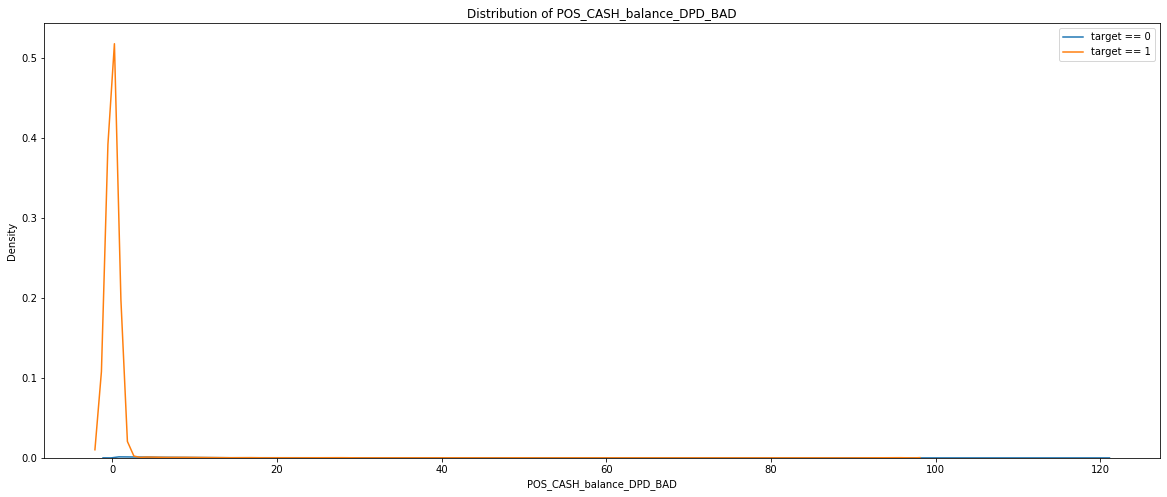

In [575]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'POS_CASH_balance_DPD_BAD'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'POS_CASH_balance_DPD_BAD'], label = 'target == 1')

# Labeling of plot
plt.xlabel('POS_CASH_balance_DPD_BAD'); plt.ylabel('Density'); plt.title('Distribution of POS_CASH_balance_DPD_BAD')

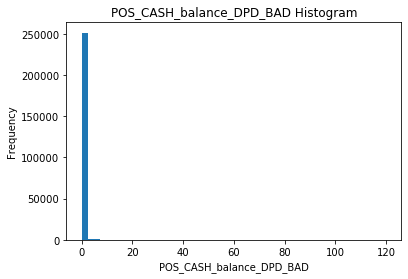

In [583]:
df['POS_CASH_balance_DPD_BAD'].loc[df['TARGET'] == 0].plot.hist(title = 'POS_CASH_balance_DPD_BAD Histogram',bins=50);
plt.xlabel('POS_CASH_balance_DPD_BAD');

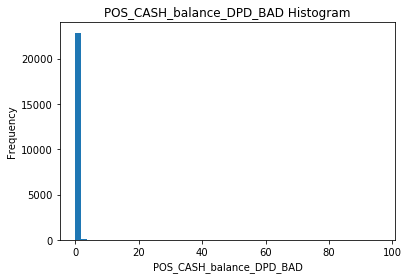

In [577]:
df['POS_CASH_balance_DPD_BAD'].loc[df['TARGET'] == 1].plot.hist(title = 'POS_CASH_balance_DPD_BAD Histogram',bins=50);
plt.xlabel('POS_CASH_balance_DPD_BAD');

## Creation POS_CASH_balance_nb_next_instalment

Compte le nombre de versements que le client devra faire le mois prochain

In [629]:
POS_CASH_balance['nb_instalment_next_month'] = 0

In [631]:
POS_CASH_balance['nb_instalment_next_month'][(
    POS_CASH_balance.MONTHS_BALANCE >= -1) & (POS_CASH_balance.CNT_INSTALMENT_FUTURE > 1)] = 1

In [633]:
POS_CASH_balance[POS_CASH_balance['nb_instalment_next_month'] == 1]

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
701          2373788      146563              -1            12.0   
706          1328586      360581              -1            12.0   
735          1059231      187644              -1            24.0   
736          1627415      370458              -1             6.0   
737          2070143      417012              -1             6.0   
...              ...         ...             ...             ...   
9999500      1370387      175539              -1            24.0   
9999563      2088288      417444              -1            36.0   
10001004     2465369      301648              -1            36.0   
10001005     1262435      310762              -1            30.0   
10001007     1770731      418098              -1            36.0   

          CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  \
701                        12.0               Active       0           0   
706                        10.0               Active       0           0   
735                        21.0               Active       0           0   
736                         6.0               Active       0           0   
737                         5.0               Active       0           0   
...                         ...                  ...     ...         ...   
9999500                     3.0               Active       0           0   
9999563                     4.0               Active       0           0   
10001004                    6.0               Active       0           0   
10001005                    2.0               Active       0           0   
10001007                    4.0               Active       0           0   

          SK_DPD_BAD  nb_instalment_next_month  
701                0                         1  
706                0                         1  
735                0                         1  
736                0                         1  
737                0                         1  
...              ...                       ...  
9999500            0                         1  
9999563            0                         1  
10001004           0                         1  
10001005           0                         1  
10001007           0                         1  

[79186 rows x 10 columns]

In [634]:
POS_CASH_balance_nb_next_instalment = POS_CASH_balance.groupby('SK_ID_CURR', as_index=False)[
    'nb_instalment_next_month'].sum().rename(columns={'nb_instalment_next_month': 'POS_CASH_balance_nb_next_instalment'})
POS_CASH_balance_nb_next_instalment.head()

SK_ID_CURR  POS_CASH_balance_nb_next_instalment
0      100001                                    0
1      100002                                    1
2      100003                                    0
3      100004                                    0
4      100005                                    0

In [635]:
# Join to the training dataframe
df = df.merge(POS_CASH_balance_nb_next_instalment, on = 'SK_ID_CURR', how = 'left')
# Fill the missing valPOS_CASH_balance_DPD_BADues with 0 
df['POS_CASH_balance_nb_next_instalment'] = df['POS_CASH_balance_nb_next_instalment'].fillna(0)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100006       0         Cash loans           F            N   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0          135000.0    312682.5   
3               Y             0          121500.0    513000.0   
4               Y             0           99000.0    490495.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         297000.0          Working  Secondary / secondary special   
3         513000.0          Working  Secondary / secondary special   
4         454500.0    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2        Civil marriage  House / apartment      -19005          -3039   
3  Single / not married  House / apartment      -19932          -3038   
4               Married  House / apartment      -16941          -1588   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              2.0                     2                            2   
3              1.0                     2                            2   
4              2.0                     2                            2   

   LENGTH_CREDIT  CREDIT_INCOME_PERCENT  ANNUITY_INCOME_PERCENT  YEARS_BIRTH  \
0      16.461104             200.788889               12.197778           25   
1      36.234085             479.075000               13.221667           45   
2      10.532818             231.616667               21.990000           52   
3      23.461618             422.222222               17.996296           54   
4      17.824857             495.450000               27.795455           46   

   YEARS_EMPLOYED  DAYS_EMPLOYED_PERCENT  INCOME_PER_PERSON  \
0        1.745205               6.732903           202500.0   
1        3.254795               7.086191           135000.0   
2        8.326027              15.990529            67500.0   
3        8.323288              15.241822           121500.0   
4        4.350685               9.373709            49500.0   

   previous_loan_counts  previous_loan_active_credit_sum  STATUS_0  STATUS_1  \
0                   8.0                       481988.565      45.0      27.0   
1                   4.0                       810000.000       0.0       0.0   
2                   0.0                            0.000       0.0       0.0   
3                   1.0                            0.000       0.0       0.0   
4                   3.0                       267606.000       0.0       0.0   

   STATUS_2  STATUS_3  STATUS_4  STATUS_5  STATUS_BAD  credit_day_overdue_sum  \
0       0.0       0.0       0.0       0.0         0.0                     0.0   
1       0.0       0.0       0.0       0.0         0.0                     0.0   
2       0.0       0.0       0.0       0.0         0.0                     0.0   
3       0.0       0.0       0.0       0.0         0.0                     0.0   
4       0.0       0.0       0.0       0.0         0.0                     0.0   

   credit_day_overdue_mean  previous_loan_active_counts  AMT_ANNUITY  

In [636]:
df['POS_CASH_balance_nb_next_instalment'].value_counts()

0.0    225163
1.0     45733
2.0      6704
3.0       584
4.0        35
Name: POS_CASH_balance_nb_next_instalment, dtype: int64

Text(0.5, 1.0, 'Distribution of POS_CASH_balance_nb_next_instalment')

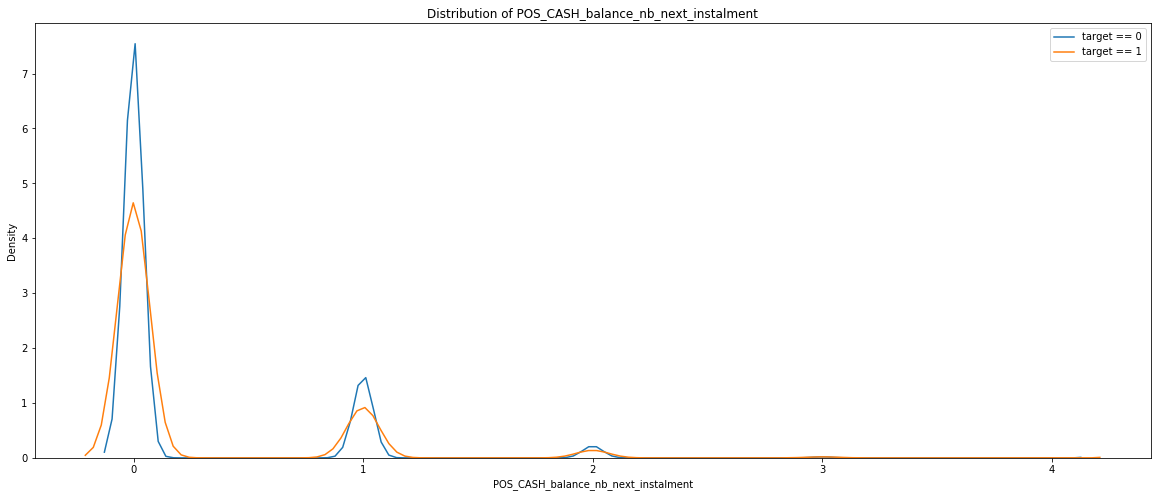

In [637]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'POS_CASH_balance_nb_next_instalment'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'POS_CASH_balance_nb_next_instalment'], label = 'target == 1')

# Labeling of plot
plt.xlabel('POS_CASH_balance_nb_next_instalment'); plt.ylabel('Density'); plt.title('Distribution of POS_CASH_balance_nb_next_instalment')

# Aggregation credit_card_balance

In [34]:
# Training data
credit_card_balance = pd.read_csv('D:/openclassrooms/PROJET 7/DATA/credit_card_balance.csv')
print('credit_card_balance shape: ', credit_card_balance.shape)
credit_card_balance.head()

credit_card_balance shape:  (3840312, 23)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [586]:
credit_card_balance.NAME_CONTRACT_STATUS.value_counts()

Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64

In [612]:
credit_card_balance[credit_card_balance.AMT_BALANCE<0].MONTHS_BALANCE.value_counts()

-44    213
-43    201
-42    201
-41    196
-46    189
-45    184
-47    175
-40    165
-39    142
-48    137
-38    114
-49    113
-50     79
-37     72
-51     71
-52     47
-53     29
-54     17
Name: MONTHS_BALANCE, dtype: int64

In [588]:
credit_card_balance.SK_DPD.value_counts()

0       3686957
1         90369
8          2772
32         2340
7          1797
         ...   
736           1
1155          1
727           1
2772          1
591           1
Name: SK_DPD, Length: 917, dtype: int64

In [589]:
credit_card_balance.SK_DPD_DEF.value_counts()

0       3750972
1         83080
8          1729
7          1176
32          492
5           406
31          291
18          253
12          125
62          114
29          101
6            83
11           82
19           58
16           42
1007         38
519          37
17           35
28           29
641          28
93           26
9            24
30           22
1217         22
60           20
63           19
123          15
154          15
366          13
38           13
397          11
548          11
1462         10
1250         10
124           9
61            9
458           9
1523          8
427           8
1097          8
185           8
215           7
213           7
69            7
1584          7
99            7
130           7
336           7
488           7
1827          7
49            7
1615          7
10            7
732           7
246           6
1431          6
428           6
92            6
1858          6
550           6
489           6
792           6
161     

In [38]:

    #****Aggregation de credit_card_balance
    # nombre de DPD > 60 des credits sur les 12 derniers mois
    # SK_DPD >=60
    credit_card_balance['DPD_60'] = (credit_card_balance['SK_DPD']>=60).astype(int)
    credit_card_balance_agg= credit_card_balance[credit_card_balance.MONTHS_BALANCE >= -12]
    credit_card_balance_agg = credit_card_balance_agg.groupby('SK_ID_CURR', as_index=False)['DPD_60'].sum().rename(columns={'DPD_60': 'CARD_CNT_DPD_60_1Y'})
    df = df.merge(credit_card_balance_agg, on = 'SK_ID_CURR', how = 'left')    
    

Text(0.5, 1.0, 'Distribution of CARD_CNT_DPD_60_1Y')

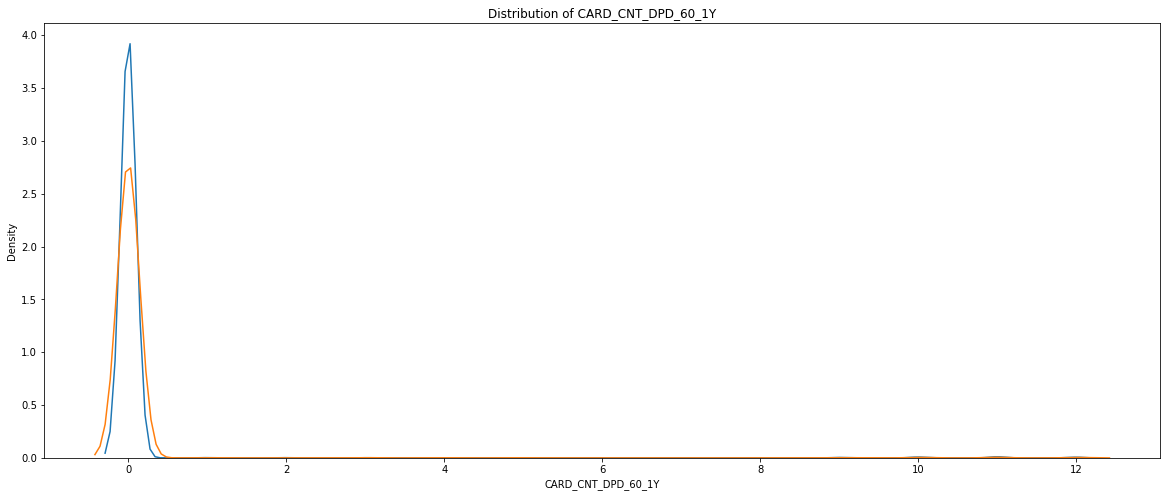

In [39]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'CARD_CNT_DPD_60_1Y'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'CARD_CNT_DPD_60_1Y'], label = 'target == 1')

# Labeling of plot
plt.xlabel('CARD_CNT_DPD_60_1Y'); plt.ylabel('Density'); plt.title('Distribution of CARD_CNT_DPD_60_1Y')

# Création de variables Globales

In [ ]:
    data['GLOBAL_CNT_DPD_60_1Y'] = data['CARD_CNT_DPD_60_1Y'] + data['POS_CNT_DPD_60_1Y'] + data['CNT_DPD_60_1Y'] + data['BUR_BAL_DPD_BAD_1Y']
    data['GLOBAL_CNT_DPD_60_3Y'] = data['CARD_CNT_DPD_60_1Y'] + data['POS_CNT_DPD_60_1Y'] + data['CNT_DPD_60_1Y'] + data['BUR_BAL_DPD_BAD_1Y']

    data['GLOBAL_SUM_ANNUITY'] = data['AMT_ANNUITY'] + data['BUR_TOT_ANNUITY_ACTIVE'] + data['TOT_ACTIVE_ANNUITY']
    data['GLOBAL_CREDIT_INCOME_RATIO'] = data['GLOBAL_SUM_ANNUITY'] / data['AMT_INCOME_TOTAL']
    data['GLOBAL_REMAIN_FOR_LIFE'] = data['AMT_INCOME_TOTAL'] - data['GLOBAL_SUM_ANNUITY']
    data['GLOBAL_REMAIN_FOR_LIFE_PER_PERSON'] = data['GLOBAL_REMAIN_FOR_LIFE'] /data['CNT_FAM_MEMBERS']
    data['GLOBAL_CNT_ACTIVE_LOAN'] = data['CNT_ACTIVE_LOAN'] + data['BUR_CNT_ACTIVE_LOAN']

In [43]:
df = pd.read_csv('D:/openclassrooms/PROJET 7/data_client_IMP_V2.csv')

Text(0.5, 1.0, 'Distribution of GLOBAL_CNT_DPD_60_1Y')

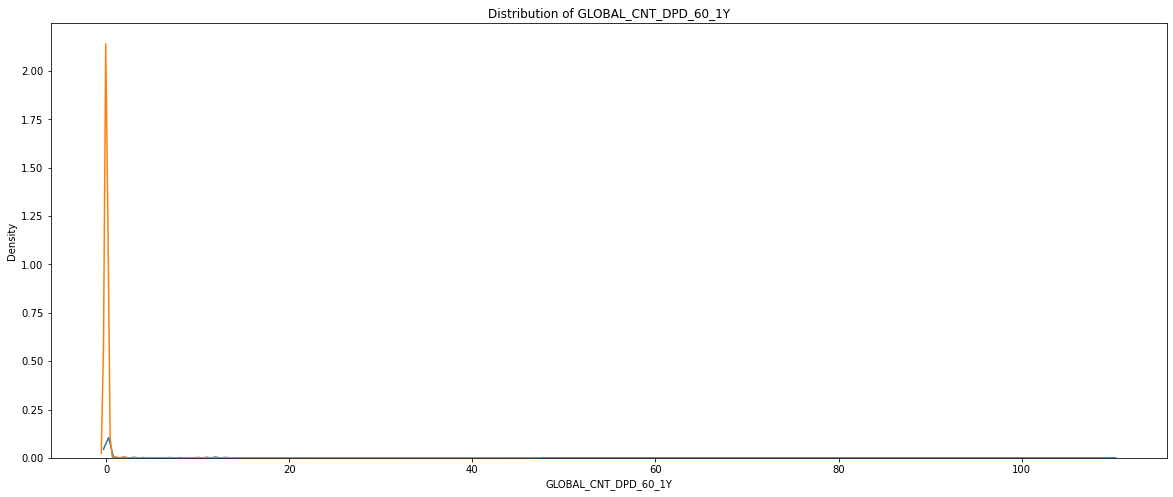

In [46]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'GLOBAL_CNT_DPD_60_1Y'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'GLOBAL_CNT_DPD_60_1Y'], label = 'target == 1')

# Labeling of plot
plt.xlabel('GLOBAL_CNT_DPD_60_1Y'); plt.ylabel('Density'); plt.title('Distribution of GLOBAL_CNT_DPD_60_1Y')

Text(0.5, 1.0, 'Distribution of GLOBAL_CNT_DPD_60_3Y')

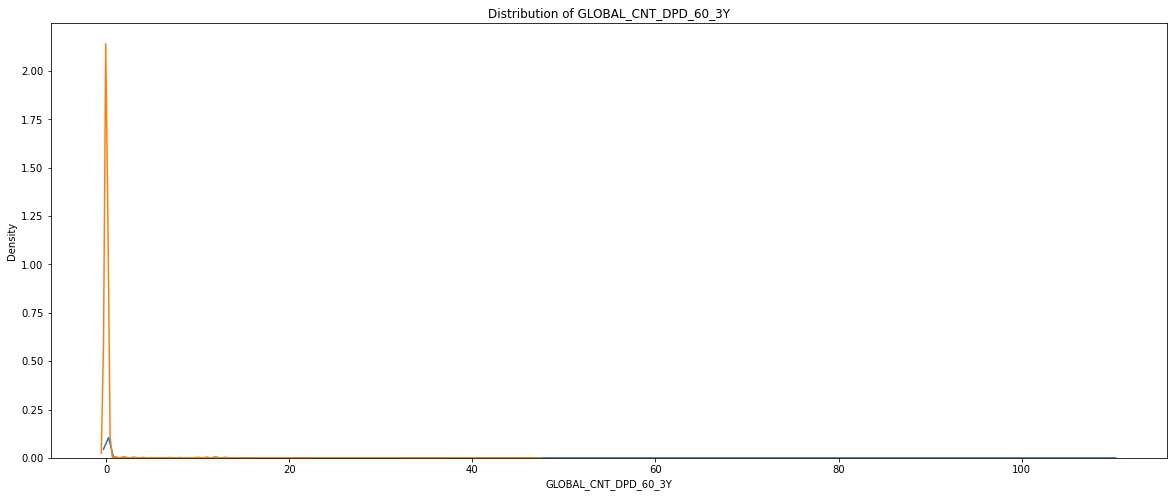

In [45]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'GLOBAL_CNT_DPD_60_3Y'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'GLOBAL_CNT_DPD_60_3Y'], label = 'target == 1')

# Labeling of plot
plt.xlabel('GLOBAL_CNT_DPD_60_3Y'); plt.ylabel('Density'); plt.title('Distribution of GLOBAL_CNT_DPD_60_3Y')

Text(0.5, 1.0, 'Distribution of GLOBAL_SUM_ANNUITY')

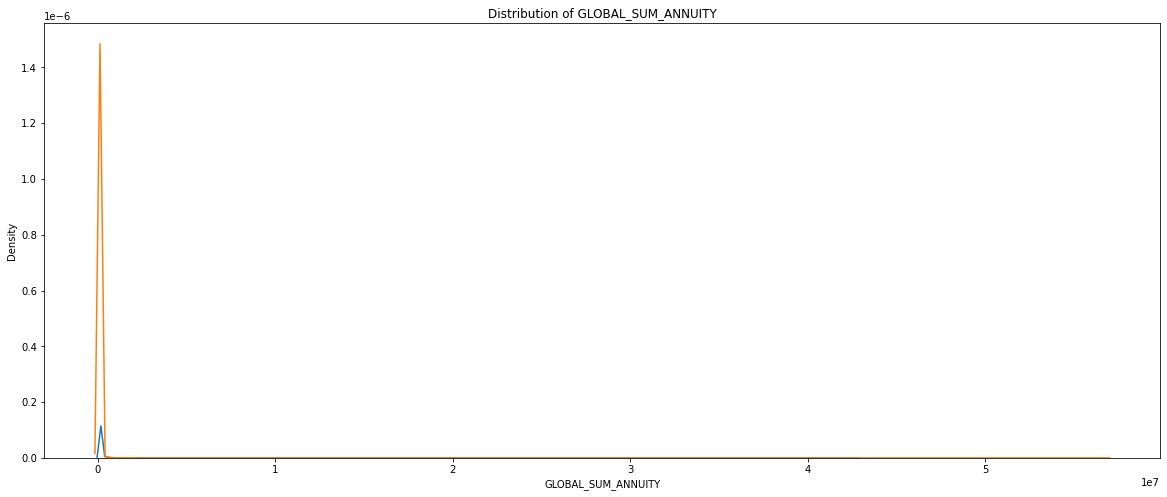

In [47]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'GLOBAL_SUM_ANNUITY'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'GLOBAL_SUM_ANNUITY'], label = 'target == 1')

# Labeling of plot
plt.xlabel('GLOBAL_SUM_ANNUITY'); plt.ylabel('Density'); plt.title('Distribution of GLOBAL_SUM_ANNUITY')

Text(0.5, 1.0, 'Distribution of GLOBAL_CREDIT_INCOME_RATIO')

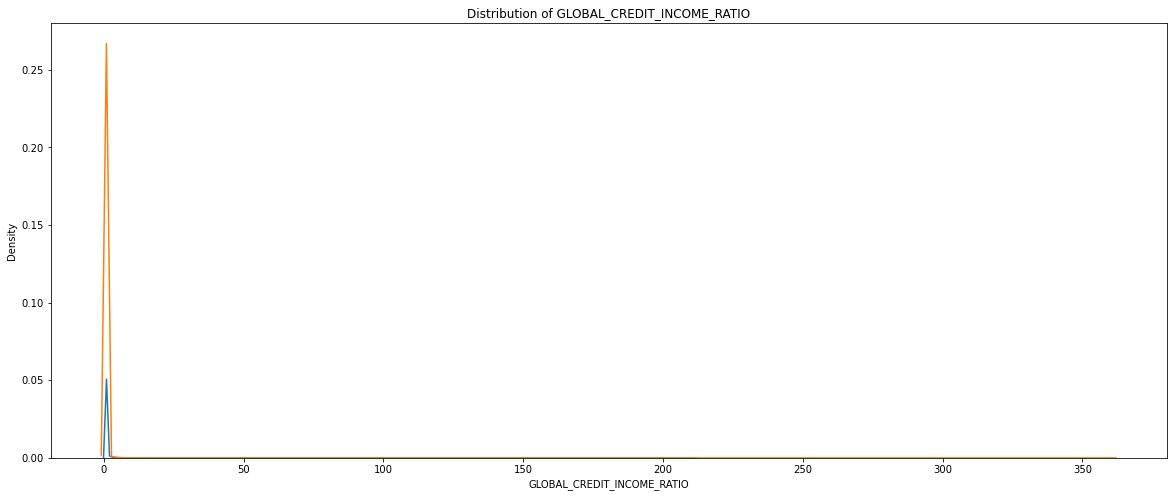

In [48]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'GLOBAL_CREDIT_INCOME_RATIO'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'GLOBAL_CREDIT_INCOME_RATIO'], label = 'target == 1')

# Labeling of plot
plt.xlabel('GLOBAL_CREDIT_INCOME_RATIO'); plt.ylabel('Density'); plt.title('Distribution of GLOBAL_CREDIT_INCOME_RATIO')

In [ ]:
    data['GLOBAL_REMAIN_FOR_LIFE'] = data['AMT_INCOME_TOTAL'] - data['GLOBAL_SUM_ANNUITY']
    data['GLOBAL_REMAIN_FOR_LIFE_PER_PERSON'] = data['GLOBAL_REMAIN_FOR_LIFE'] /data['CNT_FAM_MEMBERS']
    data['GLOBAL_CNT_ACTIVE_LOAN'] = data['CNT_ACTIVE_LOAN'] + data['BUR_CNT_ACTIVE_LOAN']

Text(0.5, 1.0, 'Distribution of GLOBAL_REMAIN_FOR_LIFE')

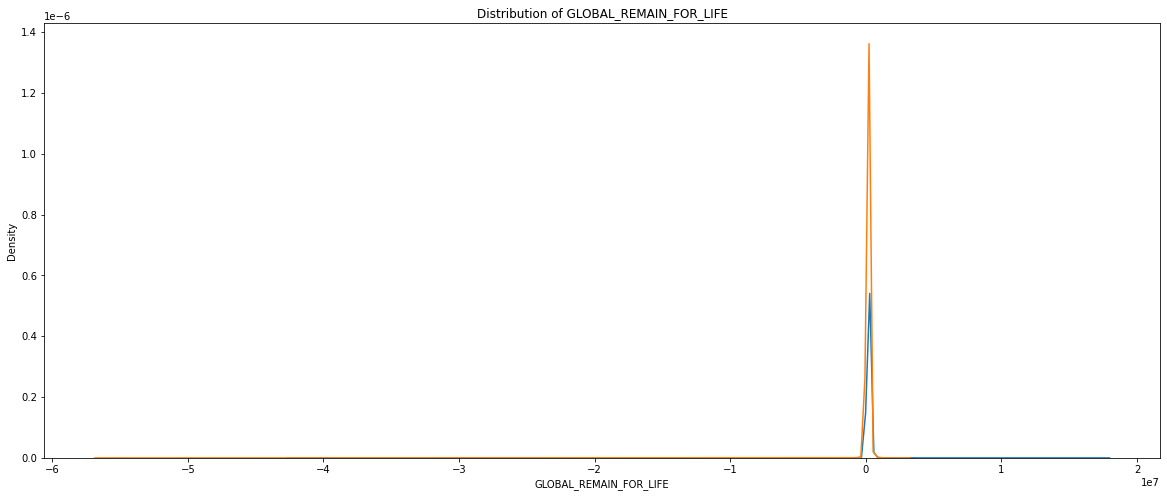

In [49]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'GLOBAL_REMAIN_FOR_LIFE'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'GLOBAL_REMAIN_FOR_LIFE'], label = 'target == 1')

# Labeling of plot
plt.xlabel('GLOBAL_REMAIN_FOR_LIFE'); plt.ylabel('Density'); plt.title('Distribution of GLOBAL_REMAIN_FOR_LIFE')

Text(0.5, 1.0, 'Distribution of GLOBAL_REMAIN_FOR_LIFE_PER_PERSON')

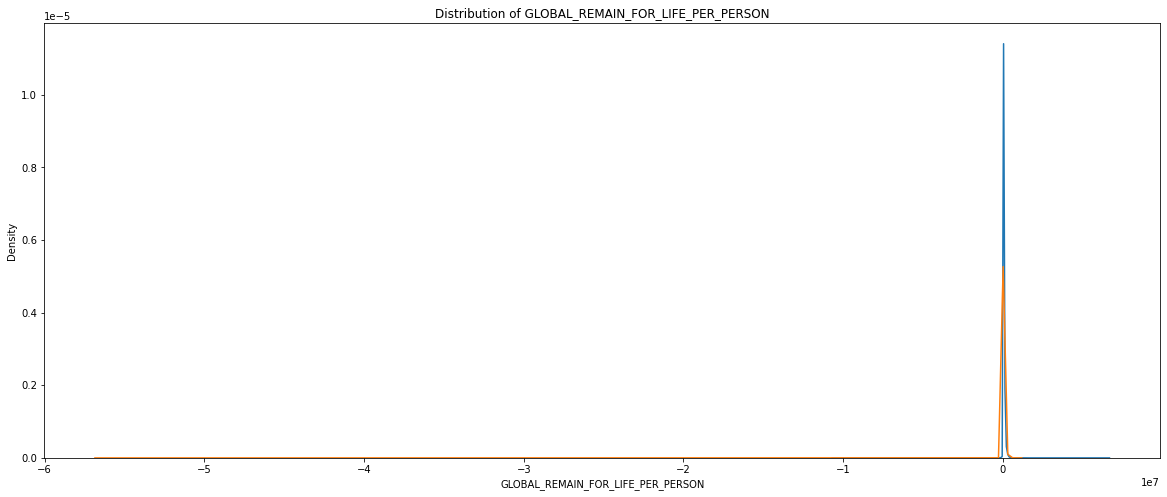

In [50]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'GLOBAL_REMAIN_FOR_LIFE_PER_PERSON'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'GLOBAL_REMAIN_FOR_LIFE_PER_PERSON'], label = 'target == 1')

# Labeling of plot
plt.xlabel('GLOBAL_REMAIN_FOR_LIFE_PER_PERSON'); plt.ylabel('Density'); plt.title('Distribution of GLOBAL_REMAIN_FOR_LIFE_PER_PERSON')

Text(0.5, 1.0, 'Distribution of GLOBAL_CNT_ACTIVE_LOAN')

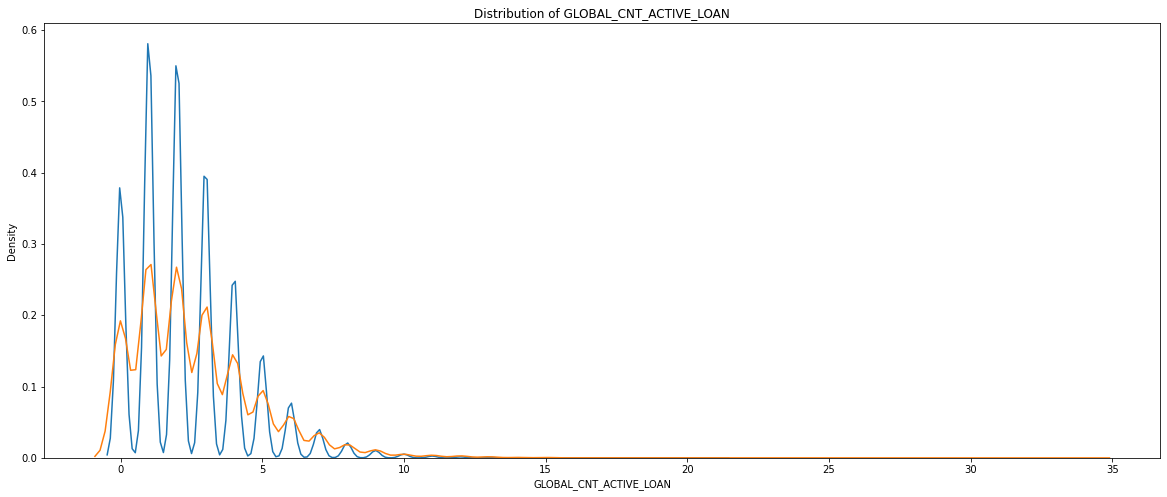

In [51]:
plt.figure(figsize = (20, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 0) , 'GLOBAL_CNT_ACTIVE_LOAN'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[(df['TARGET'] == 1), 'GLOBAL_CNT_ACTIVE_LOAN'], label = 'target == 1')

# Labeling of plot
plt.xlabel('GLOBAL_CNT_ACTIVE_LOAN'); plt.ylabel('Density'); plt.title('Distribution of GLOBAL_CNT_ACTIVE_LOAN')